<a href="https://colab.research.google.com/github/armin-lawi/ForcastingStockPrice-with-Grouped-Dataset/blob/main/LSTM/GroupPredict_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparation Data**

In [ ]:
# Install required Libraries
!pip install pandas_datareader

In [ ]:
# Install required Libraries
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 63 kB 18.9 MB/s 
     |████████████████████████████████| 6.4 MB 26.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
## Import Libraries and set information
from pandas_datareader import data as pdr
from datetime import date

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, GRU, Dropout, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import square, mean
from keras.utils.vis_utils import plot_model
import yfinance as yf

yf.pdr_override()

# Get Current Date
today = date.today()
currentDate = today.strftime("%Y-%m-%d")

# Set Info
start_date = '2010-01-01'
end_date = currentDate
stockName = ['AMZN','GOOGL','BLL','QCOM']
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
# Data AMZN
stock_amzn = pdr.get_data_yahoo(stockName[0], start_date, end_date)
stock_amzn

[*********************100%***********************]  1 of 1 completed


Open         High  ...    Adj Close    Volume
Date                                  ...                       
2010-01-04   136.250000   136.610001  ...   133.899994   7599900
2010-01-05   133.429993   135.479996  ...   134.690002   8851900
2010-01-06   134.600006   134.729996  ...   132.250000   7178800
2010-01-07   132.009995   132.320007  ...   130.000000  11030200
2010-01-08   130.559998   133.679993  ...   133.520004   9830500
...                 ...          ...  ...          ...       ...
2022-01-28  2817.209961  2879.959961  ...  2879.560059   3719600
2022-01-31  2895.000000  3007.209961  ...  2991.469971   3915400
2022-02-01  3000.000000  3034.159912  ...  3023.870117   2961000
2022-02-02  3101.010010  3101.500000  ...  3012.250000   4366500
2022-02-03  2834.750000  2884.949951  ...  2776.909912  11172200

[3044 rows x 6 columns]

In [ ]:
# Data GOOGL
stock_googl = pdr.get_data_yahoo(stockName[1], start_date, end_date)
stock_googl

[*********************100%***********************]  1 of 1 completed


Open         High  ...    Adj Close    Volume
Date                                  ...                       
2010-01-04   313.788788   315.070068  ...   313.688690   3908488
2010-01-05   313.903900   314.234222  ...   312.307312   6003391
2010-01-06   313.243256   313.243256  ...   304.434448   7949443
2010-01-07   305.005005   305.305298  ...   297.347351  12815771
2010-01-08   296.296295   301.926941  ...   301.311310   9439151
...                 ...          ...  ...          ...       ...
2022-01-28  2593.179932  2667.129883  ...  2667.020020   1718100
2022-01-31  2683.239990  2709.459961  ...  2706.070068   1999300
2022-02-01  2751.889893  2755.860107  ...  2752.879883   3432200
2022-02-02  3025.000000  3030.929932  ...  2960.000000   6160000
2022-02-03  2914.110107  2993.500000  ...  2861.800049   3567500

[3044 rows x 6 columns]

In [ ]:
# Data BLL
stock_bll = pdr.get_data_yahoo(stockName[2], start_date, end_date)
stock_bll

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2010-01-04  12.965000  13.137500  12.955000  13.122500  11.862237  2468400
2010-01-05  13.082500  13.095000  12.937500  12.975000  11.728904  3053600
2010-01-06  12.980000  13.030000  12.910000  13.000000  11.751500  1879200
2010-01-07  12.935000  12.987500  12.872500  12.970000  11.724381  2105600
2010-01-08  12.877500  13.060000  12.832500  13.017500  11.767321  1227600
...               ...        ...        ...        ...        ...      ...
2022-01-28  94.239998  95.599998  92.529999  93.500000  93.500000  3098300
2022-01-31  93.980003  97.430000  93.550003  97.099998  97.099998  2662500
2022-02-01  97.500000  97.989998  95.419998  96.570000  96.570000  2559800
2022-02-02  96.489998  96.550003  94.120003  94.459999  94.459999  1833100
2022-02-03  93.849998  94.470001  92.559998  93.120003  93.120003  1474100

[3044 rows x 6 columns]

In [ ]:
# Data QCOM
stock_qcom = pdr.get_data_yahoo(stockName[3], start_date, end_date)
stock_qcom

[*********************100%***********************]  1 of 1 completed


Open        High  ...   Adj Close    Volume
Date                                ...                      
2010-01-04   46.790001   47.310001  ...   34.300831  14570200
2010-01-05   47.520000   48.320000  ...   35.126572  24241000
2010-01-06   48.259998   48.430000  ...   34.783112  22743800
2010-01-07   47.750000   49.020000  ...   35.791542  25266300
2010-01-08   49.110001   49.799999  ...   36.149601  25938200
...                ...         ...  ...         ...       ...
2022-01-28  162.009995  166.940002  ...  166.809998  10320800
2022-01-31  167.059998  175.949997  ...  175.759995  11273500
2022-02-01  176.440002  177.429993  ...  177.130005   9724600
2022-02-02  180.940002  188.639999  ...  188.199997  25646300
2022-02-03  180.800003  192.100006  ...  179.100006  35965800

[3044 rows x 6 columns]

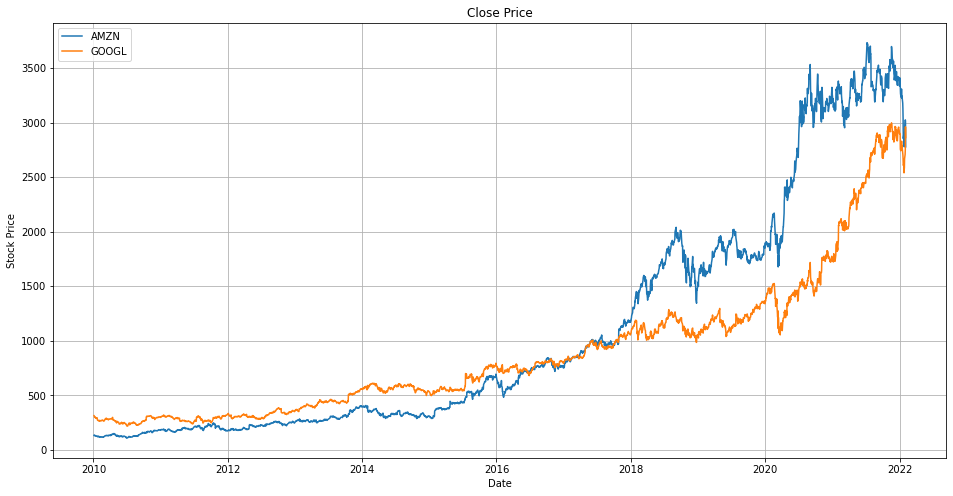

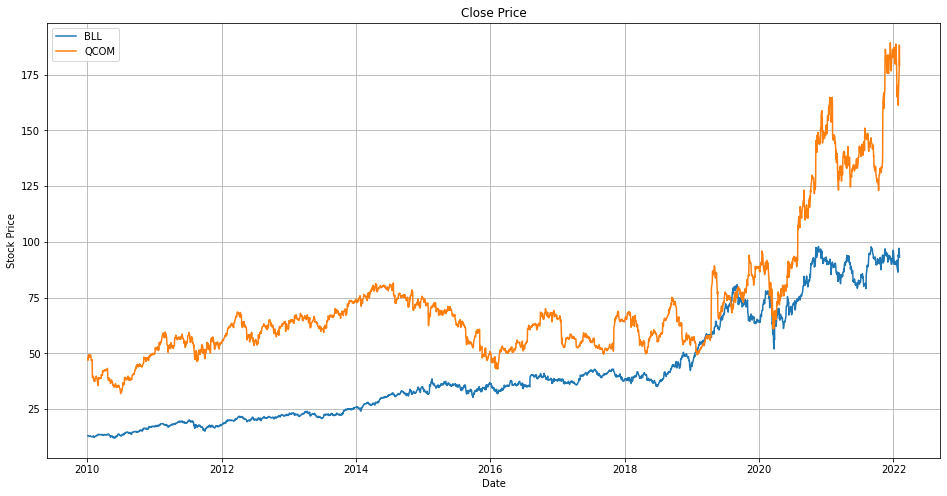

In [ ]:
# Visualization Data

#close
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(stock_amzn['Close'])
plt.plot(stock_googl['Close'])

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(['AMZN','GOOGL'])
plt.grid()

currentFig = plt.gcf()
currentFig.set_facecolor('white')
plt.show()

#close
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(stock_bll['Close'])
plt.plot(stock_qcom['Close'])

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(['BLL','QCOM'])
plt.grid()

currentFig = plt.gcf()
currentFig.set_facecolor('white')
plt.show()

In [ ]:
# Extract Clossing price
data_amzn = stock_amzn.filter(['Close'])
dataset_amzn = data_amzn.values
# Extract Clossing price
data_googl = stock_googl.filter(['Close'])
dataset_googl = data_googl.values
# Extract Clossing price
data_bll = stock_bll.filter(['Close'])
dataset_bll = data_bll.values
# Extract Clossing price
data_qcom = stock_qcom.filter(['Close'])
dataset_qcom = data_qcom.values

In [ ]:
# Rename Column
data_amzn.rename(columns={'Close': 'Close_amzn'}, inplace=True)
data_googl.rename(columns={'Close': 'Close_googl'}, inplace=True)
data_bll.rename(columns={'Close': 'Close_bll'}, inplace=True)
data_qcom.rename(columns={'Close': 'Close_qcom'}, inplace=True)

In [ ]:
# Preprocess the data AMZN
normalizer = MinMaxScaler(feature_range=(0,1)) # instantiate scaler
normalizedData_amzn = normalizer.fit_transform(dataset_amzn) # values between 0,1
print(normalizedData_amzn)

[[6.98078666e-03]
 [7.19885240e-03]
 [6.52533951e-03]
 [5.90427291e-03]
 [6.87589827e-03]
 [5.98984142e-03]
 [5.17279406e-03]
 [5.65860674e-03]
 [5.17279406e-03]
 [5.11482810e-03]
 [5.24456235e-03]
 [4.73942768e-03]
 [4.97129363e-03]
 [3.53869935e-03]
 [3.22954544e-03]
 [3.00044248e-03]
 [3.90305833e-03]
 [4.80843508e-03]
 [4.63729807e-03]
 [2.83206426e-03]
 [2.62504206e-03]
 [2.89554988e-03]
 [2.02329745e-03]
 [2.42353953e-03]
 [2.26896363e-03]
 [2.60019830e-03]
 [2.41525897e-03]
 [3.16881860e-03]
 [3.05012789e-03]
 [2.46218350e-03]
 [2.12542706e-03]
 [2.61400062e-03]
 [2.45942262e-03]
 [2.59467863e-03]
 [2.38213466e-03]
 [3.06668899e-03]
 [2.64712283e-03]
 [2.70233001e-03]
 [4.39715157e-03]
 [4.67042028e-03]
 [4.76979110e-03]
 [5.49850907e-03]
 [5.60340166e-03]
 [5.93463634e-03]
 [5.57856001e-03]
 [6.04504649e-03]
 [6.89245938e-03]
 [6.40664880e-03]
 [6.21618771e-03]
 [6.39836404e-03]
 [6.27415156e-03]
 [6.66611309e-03]
 [6.00088496e-03]
 [6.03400716e-03]
 [5.70000950e-03]
 [5.363253

In [ ]:
# Storing the number of data points in the array
num_data_amzn = len(normalizedData_amzn)
num_days_used = 40
data_used_amzn = np.array([normalizedData_amzn[i : i + num_days_used].copy() for i in range(num_data_amzn - num_days_used)])

data_to_predict_amzn = np.array(normalizedData_amzn[(num_days_used):, :1])

# Creating a dates array for the dates that were used by data_used
dates_used_amzn = stock_amzn.index[num_days_used:num_data_amzn]

# Storing the scaler object for prediction later
y_normaliser_amzn = MinMaxScaler()
y_normaliser_amzn.fit(data_amzn[['Close_amzn']].to_numpy()[num_days_used:])

display(normalizedData_amzn.shape, data_used_amzn.shape,data_to_predict_amzn.shape, dates_used_amzn.shape)

(3044, 1)

(3004, 40, 1)

(3004, 1)

(3004,)

In [ ]:
train_split = 0.8
data_size = data_used_amzn.shape[0]
num_features_amzn = data_used_amzn.shape[2]
train_size_amzn = int(data_size * train_split)
test_size_amzn = data_size - train_size_amzn

# Splitting the dataset up into train and test sets
X_train_amzn = data_used_amzn[0:train_size_amzn, :, :]
y_train_amzn = data_to_predict_amzn[0:train_size_amzn, :]
dates_train_amzn = dates_used_amzn[0:train_size_amzn]
X_test_amzn = data_used_amzn[train_size_amzn:, :, :]
y_test_amzn = data_to_predict_amzn[train_size_amzn:, :]
dates_test_amzn = dates_used_amzn[train_size_amzn:]

unscaled_y_train_amzn = data_amzn['Close_amzn'].to_numpy()[(num_days_used):][0:train_size_amzn]
unscaled_y_test_amzn = data_amzn['Close_amzn'].to_numpy()[(num_days_used):][train_size_amzn:]

display("X_train shape:", X_train_amzn.shape, "X_test shape:", X_test_amzn.shape, "y_train shape:", y_train_amzn.shape, "y_test shape:", y_test_amzn.shape)

'X_train shape:'

(2403, 40, 1)

'X_test shape:'

(601, 40, 1)

'y_train shape:'

(2403, 1)

'y_test shape:'

(601, 1)

In [ ]:
# Preprocess the data GOOGL
normalizer = MinMaxScaler(feature_range=(0,1)) # instantiate scaler
normalizedData_googl = normalizer.fit_transform(dataset_googl) # values between 0,1
print(normalizedData_googl)

[[3.43476207e-02]
 [3.38504568e-02]
 [3.10169797e-02]
 [2.84663033e-02]
 [2.98929489e-02]
 [2.97290325e-02]
 [2.78142184e-02]
 [2.72035740e-02]
 [2.77007379e-02]
 [2.59264345e-02]
 [2.72990418e-02]
 [2.60002869e-02]
 [2.64632265e-02]
 [2.05242682e-02]
 [1.87211444e-02]
 [1.91570648e-02]
 [1.90994239e-02]
 [1.76925923e-02]
 [1.69090142e-02]
 [1.74638189e-02]
 [1.71215760e-02]
 [1.88688602e-02]
 [1.63397991e-02]
 [1.71521977e-02]
 [1.75448875e-02]
 [1.80798782e-02]
 [1.77214128e-02]
 [1.80726731e-02]
 [1.74818317e-02]
 [1.89553216e-02]
 [1.83987045e-02]
 [1.93011780e-02]
 [1.88580525e-02]
 [1.92255134e-02]
 [1.78330920e-02]
 [1.71846208e-02]
 [1.62767544e-02]
 [1.63434017e-02]
 [1.74043768e-02]
 [1.89120909e-02]
 [1.96794465e-02]
 [2.13492757e-02]
 [2.30821497e-02]
 [2.27705175e-02]
 [2.23580137e-02]
 [2.52869696e-02]
 [2.61317913e-02]
 [2.58435757e-02]
 [2.28966180e-02]
 [2.32604763e-02]
 [2.33253223e-02]
 [2.34766407e-02]
 [2.23237894e-02]
 [2.18734588e-02]
 [2.03423390e-02]
 [2.184283

In [ ]:
# Storing the number of data points in the array
num_data_googl = len(normalizedData_googl)
num_days_used = 40
data_used_googl = np.array([normalizedData_googl[i : i + num_days_used].copy() for i in range(num_data_googl - num_days_used)])

data_to_predict_googl = np.array(normalizedData_googl[(num_days_used):, :1])

# Creating a dates array for the dates that were used by data_used
dates_used_googl = stock_googl.index[num_days_used:num_data_googl]

# Storing the scaler object for prediction later
y_normaliser_googl = MinMaxScaler()
y_normaliser_googl.fit(data_googl[['Close_googl']].to_numpy()[num_days_used:])
num_features_googl = data_used_googl.shape[2]

display(normalizedData_googl.shape, data_used_googl.shape,data_to_predict_googl.shape, dates_used_googl.shape)

(3044, 1)

(3004, 40, 1)

(3004, 1)

(3004,)

In [ ]:
train_split = 0.8
data_size = data_used_googl.shape[0]
num_features_googl = data_used_googl.shape[2]
train_size_googl = int(data_size * train_split)
test_size_googl = data_size - train_size_googl

# Splitting the dataset up into train and test sets
X_train_googl = data_used_googl[0:train_size_googl, :, :]
y_train_googl = data_to_predict_googl[0:train_size_amzn, :]
dates_train_googl = dates_used_googl[0:train_size_googl]
X_test_googl = data_used_googl[train_size_googl:, :, :]
y_test_googl = data_to_predict_googl[train_size_googl:, :]
dates_test_googl = dates_used_googl[train_size_googl:]

unscaled_y_train_googl = data_googl['Close_googl'].to_numpy()[(num_days_used):][0:train_size_googl]
unscaled_y_test_googl = data_googl['Close_googl'].to_numpy()[(num_days_used):][train_size_googl:]

display("X_train shape:", X_train_googl.shape, "X_test shape:", X_test_googl.shape, "y_train shape:", y_train_googl.shape, "y_test shape:", y_test_googl.shape)

'X_train shape:'

(2403, 40, 1)

'X_test shape:'

(601, 40, 1)

'y_train shape:'

(2403, 1)

'y_test shape:'

(601, 1)

In [ ]:
# Preprocess the data BLL
normalizer = MinMaxScaler(feature_range=(0,1)) # instantiate scaler
normalizedData_bll = normalizer.fit_transform(dataset_bll) # values between 0,1
print(normalizedData_bll)

[[1.23474810e-02]
 [1.06293176e-02]
 [1.09205272e-02]
 [1.05710735e-02]
 [1.11243762e-02]
 [1.03380969e-02]
 [1.01051314e-02]
 [1.07166783e-02]
 [1.00177596e-02]
 [9.20236382e-03]
 [1.07749224e-02]
 [9.26060797e-03]
 [8.41608453e-03]
 [7.57156109e-03]
 [7.60068872e-03]
 [6.72704876e-03]
 [6.40671152e-03]
 [6.66880462e-03]
 [7.39683977e-03]
 [7.74629353e-03]
 [1.15320741e-02]
 [9.58094521e-03]
 [5.06712952e-03]
 [6.69792114e-03]
 [5.82428118e-03]
 [6.75616528e-03]
 [5.35833913e-03]
 [8.15399143e-03]
 [9.14411968e-03]
 [1.10370155e-02]
 [1.13573527e-02]
 [1.35123306e-02]
 [1.27551789e-02]
 [1.29007837e-02]
 [1.18232948e-02]
 [1.38909119e-02]
 [1.42112492e-02]
 [1.68612967e-02]
 [1.84920883e-02]
 [1.72981111e-02]
 [1.84629718e-02]
 [1.80552739e-02]
 [1.93657394e-02]
 [1.79387856e-02]
 [1.68612967e-02]
 [1.71233898e-02]
 [1.81135180e-02]
 [1.80552739e-02]
 [1.74728435e-02]
 [1.81426345e-02]
 [1.91036463e-02]
 [1.76475760e-02]
 [1.73272387e-02]
 [1.71816339e-02]
 [1.82591228e-02]
 [1.674480

In [ ]:
# Storing the number of data points in the array
num_data_bll = len(normalizedData_bll)
num_days_used = 40
data_used_bll = np.array([normalizedData_bll[i : i + num_days_used].copy() for i in range(num_data_bll - num_days_used)])

data_to_predict_bll = np.array(normalizedData_bll[(num_days_used):, :1])

# Creating a dates array for the dates that were used by data_used
dates_used_bll = stock_bll.index[num_days_used:num_data_bll]

# Storing the scaler object for prediction later
y_normaliser_bll = MinMaxScaler()
y_normaliser_bll.fit(data_bll[['Close_bll']].to_numpy()[num_days_used:])
num_features_bll = data_used_bll.shape[2]

display(normalizedData_bll.shape, data_used_bll.shape,data_to_predict_bll.shape, dates_used_bll.shape)

(3044, 1)

(3004, 40, 1)

(3004, 1)

(3004,)

In [ ]:
train_split = 0.8
data_size = data_used_bll.shape[0]
num_features_bll = data_used_bll.shape[2]
train_size_bll = int(data_size * train_split)
test_size_bll = data_size - train_size_bll

# Splitting the dataset up into train and test sets
X_train_bll = data_used_bll[0:train_size_bll, :, :]
y_train_bll = data_to_predict_bll[0:train_size_bll, :]
dates_train_bll = dates_used_bll[0:train_size_bll]
X_test_bll = data_used_bll[train_size_bll:, :, :]
y_test_bll = data_to_predict_bll[train_size_bll:, :]
dates_test_bll = dates_used_bll[train_size_bll:]

unscaled_y_train_bll = data_bll['Close_bll'].to_numpy()[(num_days_used):][0:train_size_bll]
unscaled_y_test_bll = data_bll['Close_bll'].to_numpy()[(num_days_used):][train_size_bll:]

display("X_train shape:", X_train_bll.shape, "X_test shape:", X_test_bll.shape, "y_train shape:", y_train_bll.shape, "y_test shape:", y_test_bll.shape)

'X_train shape:'

(2403, 40, 1)

'X_test shape:'

(601, 40, 1)

'y_train shape:'

(2403, 1)

'y_test shape:'

(601, 1)

In [ ]:
# Preprocess the data QCOM
normalizer = MinMaxScaler(feature_range=(0,1)) # instantiate scaler
normalizedData_qcom = normalizer.fit_transform(dataset_qcom) # values between 0,1
print(normalizedData_qcom)

[[0.09521993]
 [0.10240275]
 [0.0994152 ]
 [0.10818714]
 [0.11130182]
 [0.11015765]
 [0.10507248]
 [0.10640733]
 [0.10430969]
 [0.10532672]
 [0.11034834]
 [0.10418255]
 [0.10252988]
 [0.0942029 ]
 [0.09502924]
 [0.09490211]
 [0.09687263]
 [0.05415713]
 [0.04595728]
 [0.04964405]
 [0.04640223]
 [0.04875414]
 [0.03947368]
 [0.03864735]
 [0.03527841]
 [0.03782101]
 [0.0347699 ]
 [0.03845664]
 [0.04373253]
 [0.04487669]
 [0.04748285]
 [0.04989831]
 [0.04849988]
 [0.04481311]
 [0.04182559]
 [0.03756674]
 [0.03318079]
 [0.03000255]
 [0.02288331]
 [0.03794814]
 [0.04277905]
 [0.04633868]
 [0.043224  ]
 [0.04341471]
 [0.04271549]
 [0.04398679]
 [0.0453852 ]
 [0.04443174]
 [0.04392321]
 [0.04481311]
 [0.04411392]
 [0.05383932]
 [0.05142385]
 [0.05288584]
 [0.0544114 ]
 [0.05231375]
 [0.06502669]
 [0.06273839]
 [0.06229341]
 [0.06464532]
 [0.06356471]
 [0.06553522]
 [0.0671879 ]
 [0.06655226]
 [0.06871346]
 [0.06636157]
 [0.06489956]
 [0.06528096]
 [0.06572591]
 [0.06763285]
 [0.06826851]
 [0.06

In [ ]:
# Storing the number of data points in the array
num_data_qcom = len(normalizedData_qcom)
num_days_used = 40
data_used_qcom = np.array([normalizedData_qcom[i : i + num_days_used].copy() for i in range(num_data_qcom - num_days_used)])

data_to_predict_qcom = np.array(normalizedData_qcom[(num_days_used):, :1])

# Creating a dates array for the dates that were used by data_used
dates_used_qcom = stock_qcom.index[num_days_used:num_data_qcom]

# Storing the scaler object for prediction later
y_normaliser_qcom = MinMaxScaler()
y_normaliser_qcom.fit(data_qcom[['Close_qcom']].to_numpy()[num_days_used:])
num_features_qcom = data_used_qcom.shape[2]

display(normalizedData_qcom.shape, data_used_qcom.shape,data_to_predict_qcom.shape, dates_used_qcom.shape)

(3044, 1)

(3004, 40, 1)

(3004, 1)

(3004,)

In [ ]:
train_split = 0.8
data_size = data_used_qcom.shape[0]
num_features_qcom = data_used_qcom.shape[2]
train_size_qcom = int(data_size * train_split)
test_size_qcom = data_size - train_size_qcom

# Splitting the dataset up into train and test sets
X_train_qcom = data_used_qcom[0:train_size_qcom, :, :]
y_train_qcom = data_to_predict_qcom[0:train_size_qcom, :]
dates_train_qcom = dates_used_qcom[0:train_size_qcom]
X_test_qcom = data_used_qcom[train_size_qcom:, :, :]
y_test_qcom = data_to_predict_qcom[train_size_qcom:, :]
dates_test_qcom = dates_used_qcom[train_size_qcom:]

unscaled_y_train_qcom = data_qcom['Close_qcom'].to_numpy()[(num_days_used):][0:train_size_qcom]
unscaled_y_test_qcom = data_qcom['Close_qcom'].to_numpy()[(num_days_used):][train_size_qcom:]

display("X_train shape:", X_train_qcom.shape, "X_test shape:", X_test_qcom.shape, "y_train shape:", y_train_qcom.shape, "y_test shape:", y_test_qcom.shape)

'X_train shape:'

(2403, 40, 1)

'X_test shape:'

(601, 40, 1)

'y_train shape:'

(2403, 1)

'y_test shape:'

(601, 1)

In [ ]:
# Concat the 4 stocks data
stock_df = pd.DataFrame()
stock_df = pd.concat([stock_df, data_amzn, data_googl, data_bll, data_qcom], axis=1)

In [ ]:
stock_df

Close_amzn  Close_googl  Close_bll  Close_qcom
Date                                                       
2010-01-04   133.899994   313.688690  13.122500   46.939999
2010-01-05   134.690002   312.307312  12.975000   48.070000
2010-01-06   132.250000   304.434448  13.000000   47.599998
2010-01-07   130.000000   297.347351  12.970000   48.980000
2010-01-08   133.520004   301.311310  13.017500   49.470001
...                 ...          ...        ...         ...
2022-01-28  2879.560059  2667.020020  93.500000  166.809998
2022-01-31  2991.469971  2706.070068  97.099998  175.759995
2022-02-01  3023.870117  2752.879883  96.570000  177.130005
2022-02-02  3012.250000  2960.000000  94.459999  188.199997
2022-02-03  2776.909912  2861.800049  93.120003  179.100006

[3044 rows x 4 columns]

In [ ]:
# Extract Clossing price
data = stock_df.filter(['Close_amzn','Close_googl','Close_bll','Close_qcom'])
dataset = data.values

In [ ]:
dataset

array([[ 133.8999939 ,  313.68869019,   13.12250042,   46.93999863],
       [ 134.69000244,  312.30731201,   12.97500038,   48.06999969],
       [ 132.25      ,  304.43444824,   13.        ,   47.59999847],
       [ 130.        ,  297.34735107,   12.97000027,   48.97999954],
       [ 133.52000427,  301.31130981,   13.01749992,   49.47000122],
       [ 130.30999756,  300.85586548,   12.94999981,   49.29000092],
       [ 127.34999847,  295.53552246,   12.93000031,   48.49000168],
       [ 129.11000061,  293.83883667,   12.98250008,   48.70000076],
       [ 127.34999847,  295.22021484,   12.92249966,   48.36999893],
       [ 127.13999939,  290.2902832 ,   12.85249996,   48.52999878],
       [ 127.61000061,  294.10409546,   12.98750019,   49.31999969],
       [ 125.77999878,  290.4954834 ,   12.85750008,   48.34999847],
       [ 126.62000275,  291.7817688 ,   12.78499985,   48.09000015],
       [ 121.43000031,  275.28027344,   12.71249962,   46.77999878],
       [ 120.30999756,  270.270263

In [ ]:
# Preprocess the data
normalizer = MinMaxScaler(feature_range=(0,1)) # instantiate scaler
normalizedData = normalizer.fit_transform(dataset) # values between 0,1
print(normalizedData)

[[6.98078666e-03 3.43476207e-02 1.23474810e-02 9.52199312e-02]
 [7.19885240e-03 3.38504568e-02 1.06293176e-02 1.02402750e-01]
 [6.52533951e-03 3.10169797e-02 1.09205272e-02 9.94152010e-02]
 [5.90427291e-03 2.84663033e-02 1.05710735e-02 1.08187138e-01]
 [6.87589827e-03 2.98929489e-02 1.11243762e-02 1.11301819e-01]
 [5.98984142e-03 2.97290325e-02 1.03380969e-02 1.10157652e-01]
 [5.17279406e-03 2.78142184e-02 1.01051314e-02 1.05072480e-01]
 [5.65860674e-03 2.72035740e-02 1.07166783e-02 1.06407334e-01]
 [5.17279406e-03 2.77007379e-02 1.00177596e-02 1.04309686e-01]
 [5.11482810e-03 2.59264345e-02 9.20236382e-03 1.05326721e-01]
 [5.24456235e-03 2.72990418e-02 1.07749224e-02 1.10348339e-01]
 [4.73942768e-03 2.60002869e-02 9.26060797e-03 1.04182554e-01]
 [4.97129363e-03 2.64632265e-02 8.41608453e-03 1.02529882e-01]
 [3.53869935e-03 2.05242682e-02 7.57156109e-03 9.42028968e-02]
 [3.22954544e-03 1.87211444e-02 7.60068872e-03 9.50292448e-02]
 [3.00044248e-03 1.91570648e-02 6.72704876e-03 9.490211

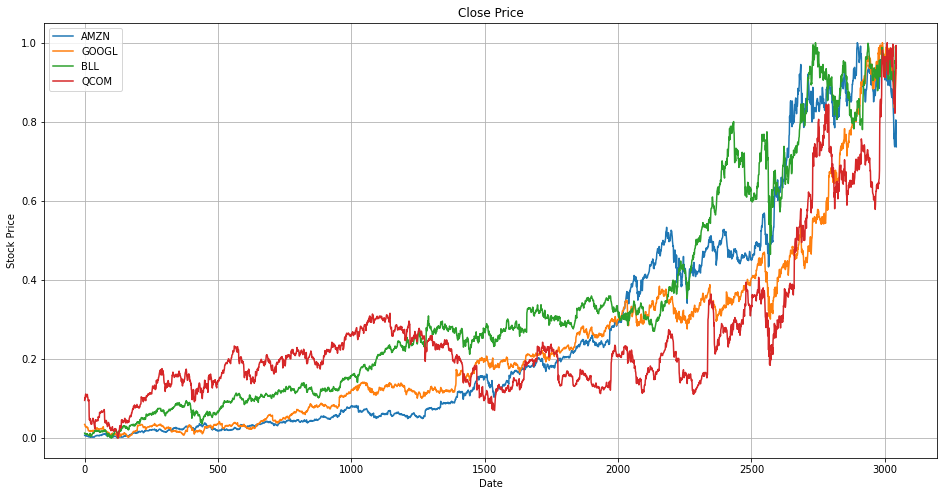

In [ ]:
# Visualization data close
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(normalizedData[:,:4])

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(['AMZN','GOOGL','BLL','QCOM'])
plt.grid()

currentFig = plt.gcf()
currentFig.set_facecolor('white')
plt.show()

In [ ]:
# Storing the number of data points in the array
num_data = len(normalizedData)
num_days_used = 40
data_used = np.array([normalizedData[i : i + num_days_used].copy() for i in range(num_data - num_days_used)])

data_to_predict = np.array(normalizedData[(num_days_used):, :6])

# Creating a dates array for the dates that were used by data_used
dates_used = stock_df.index[num_days_used:num_data]

# Storing the scaler object for prediction later
y_normaliser = MinMaxScaler()
y_normaliser.fit(stock_df[['Close_amzn','Close_googl','Close_bll','Close_qcom']].to_numpy()[num_days_used:])

display(normalizedData.shape, data_used.shape,data_to_predict.shape, dates_used.shape)

(3044, 4)

(3004, 40, 4)

(3004, 4)

(3004,)

In [ ]:
train_split = 0.8
data_size = data_used.shape[0]
num_features = data_used.shape[2]
train_size = int(data_size * train_split)
test_size = data_size - train_size

# Splitting the dataset up into train and test sets
X_train = data_used[0:train_size, :, :]
y_train = data_to_predict[0:train_size, :]
dates_train = dates_used[0:train_size]
X_test = data_used[train_size:, :, :]
y_test = data_to_predict[train_size:, :]
dates_test = dates_used[train_size:]

unscaled_y_train = stock_df[['Close_amzn','Close_googl','Close_bll','Close_qcom']].to_numpy()[(num_days_used):][0:train_size, :]
unscaled_y_test = stock_df[['Close_amzn','Close_googl','Close_bll','Close_qcom']].to_numpy()[(num_days_used):][train_size:, :]

display("X_train shape:", X_train.shape, "y_train shape:", y_train.shape, 
        "X_test shape:", X_test.shape, "y_test shape:", y_test.shape,
        "unscaled_y_train shape:", unscaled_y_train.shape, "unscaled_y_test shape:", unscaled_y_test.shape)

'X_train shape:'

(2403, 40, 4)

'y_train shape:'

(2403, 4)

'X_test shape:'

(601, 40, 4)

'y_test shape:'

(601, 4)

'unscaled_y_train shape:'

(2403, 4)

'unscaled_y_test shape:'

(601, 4)

In [ ]:
# Save data to Excel
data_ = pd.DataFrame(data=data)
normalizedData_ = pd.DataFrame(data=normalizedData)

file_name1 = 'RealData.xlsx'
file_name2 = 'RealNormData.xlsx'

data_.to_excel(file_name1)
normalizedData_.to_excel(file_name2)

# **Model1**

In [ ]:
# Creating Model 1
input_amzn = Input(shape=(num_days_used, num_features_amzn), name = 'input_amzn')
input_googl = Input(shape=(num_days_used, num_features_googl), name = 'input_googl')
input_bll = Input(shape=(num_days_used, num_features_bll), name = 'input_bll')
input_qcom = Input(shape=(num_days_used, num_features_qcom), name = 'input_qcom')

x1 = LSTM(160, return_sequences=True, name='LSTM1_amzn')(input_amzn)
x1 = Dropout(0.5)(x1)
x1 = LSTM(160, return_sequences=True, name='LSTM2_amzn')(x1)
x1 = Dropout(0.5)(x1)

x2 = LSTM(160, return_sequences=True, name='LSTM1_googl')(input_googl)
x2 = Dropout(0.5)(x2)
x2 = LSTM(160, return_sequences=True, name='LSTM2_googl')(x2)
x2 = Dropout(0.5)(x2)

x3 = LSTM(160, return_sequences=True, name='LSTM1_bll')(input_bll)
x3 = Dropout(0.5)(x3)
x3 = LSTM(160, return_sequences=True, name='LSTM2_bll')(x3)
x3 = Dropout(0.5)(x3)

x4 = LSTM(160, return_sequences=True, name='LSTM1_qcom')(input_qcom)
x4 = Dropout(0.5)(x4)
x4 = LSTM(160, return_sequences=True, name='LSTM2_qcom')(x4)
x4 = Dropout(0.5)(x4)

conc = concatenate([x1,x2,x3,x4])

output1 = LSTM(160, name='amzn_0')(conc)
output1 = Dense(1, name='amzn_final')(output1)

output2 = LSTM(160, name='googl_0')(conc)
output2 = Dense(1, name='googl_final')(output2)

output3 = LSTM(160, name='bll_0')(conc)
output3 = Dense(1, name='bll_final')(output3)

output4 = LSTM(160, name='qcom_0')(conc)
output4 = Dense(1, name='qcom_final')(output4)

model3 = Model(inputs = [input_amzn, input_googl, input_bll, input_qcom], outputs = [output1, output2, output3, output4])

adam = Adam(learning_rate=0.001)

model3.compile(optimizer=adam, loss='mse')
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_amzn (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                                  
 input_googl (InputLayer)       [(None, 40, 1)]      0           []                               
                                                                                                  
 input_bll (InputLayer)         [(None, 40, 1)]      0           []                               
                                                                                                  
 input_qcom (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                            

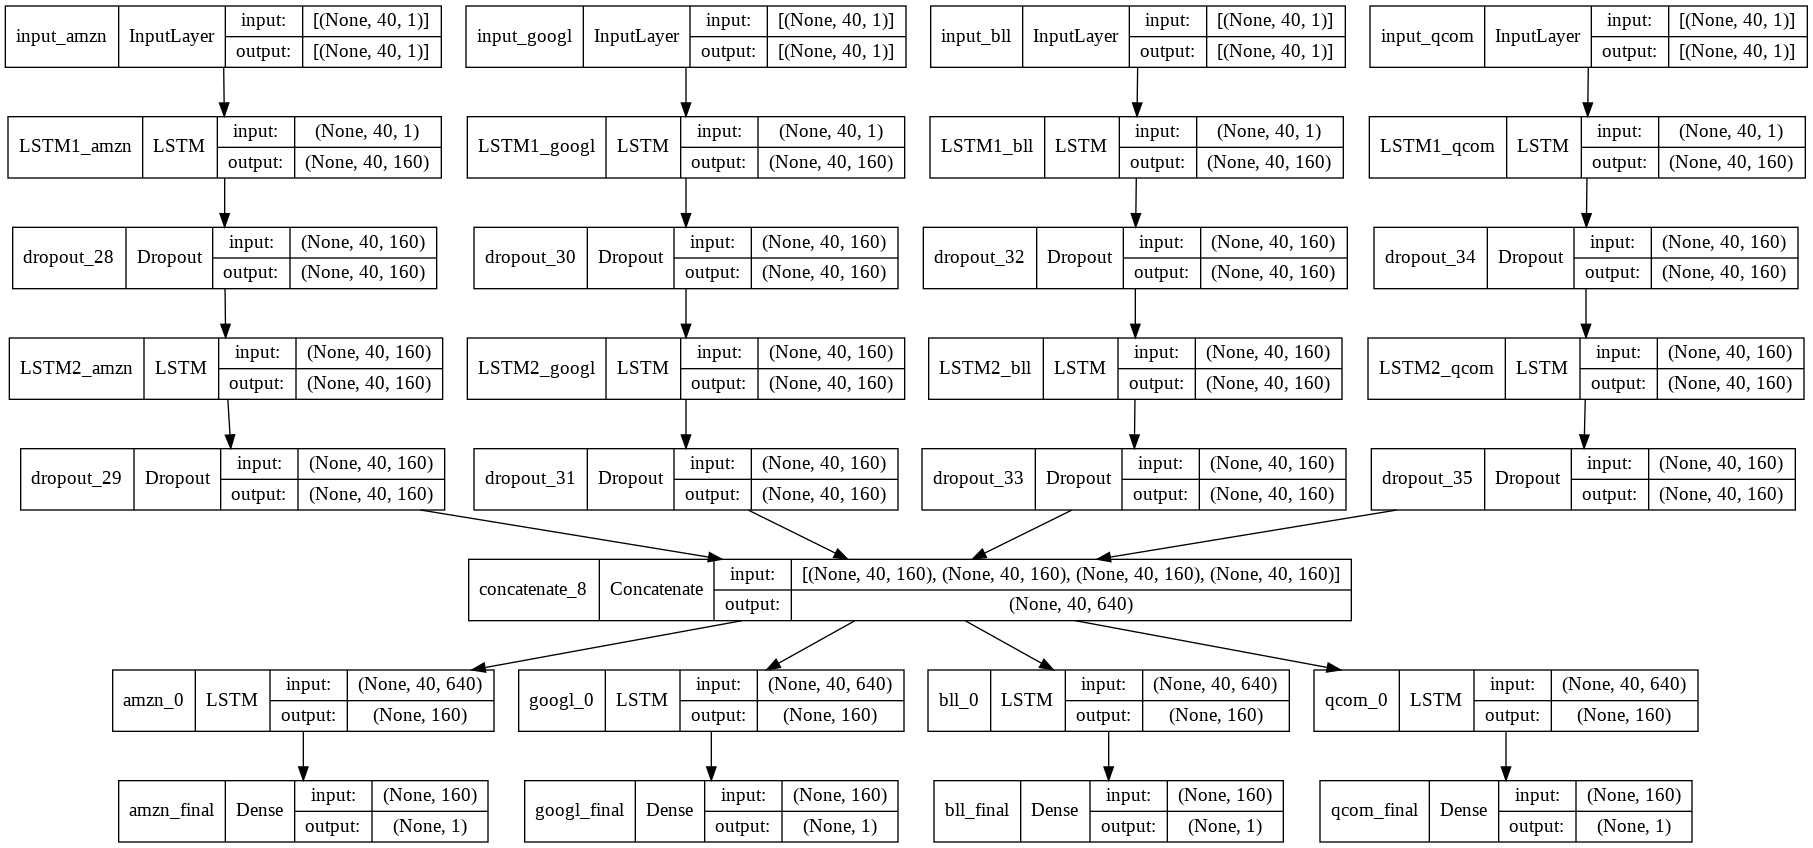

In [ ]:
# Displaying the structure of the final model
plot_model(model3, show_shapes=True)

In [ ]:
# Fitting Model1
history = model3.fit(x=[X_train_amzn,X_train_googl,X_train_bll,X_train_qcom], y=[y_train_amzn,y_train_googl,y_train_bll,y_train_qcom], batch_size=32, epochs=30, validation_split=0.2)
evaluation = model3.evaluate([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom], [y_test_amzn,y_test_googl,y_test_bll,y_test_qcom])
print(evaluation)

Epoch 1/30
61/61 [==============================] - 101s 1s/step - loss: 0.0072 - amzn_final_loss: 9.8182e-04 - googl_final_loss: 0.0012 - bll_final_loss: 0.0026 - qcom_final_loss: 0.0024 - val_loss: 0.0173 - val_amzn_final_loss: 0.0068 - val_googl_final_loss: 0.0028 - val_bll_final_loss: 0.0066 - val_qcom_final_loss: 0.0010
Epoch 2/30
61/61 [==============================] - 75s 1s/step - loss: 7.6466e-04 - amzn_final_loss: 9.1780e-05 - googl_final_loss: 1.3414e-04 - bll_final_loss: 2.4141e-04 - qcom_final_loss: 2.9734e-04 - val_loss: 0.0078 - val_amzn_final_loss: 4.2809e-04 - val_googl_final_loss: 0.0027 - val_bll_final_loss: 0.0036 - val_qcom_final_loss: 0.0010
Epoch 3/30
61/61 [==============================] - 75s 1s/step - loss: 6.8600e-04 - amzn_final_loss: 9.7798e-05 - googl_final_loss: 1.1019e-04 - bll_final_loss: 1.6375e-04 - qcom_final_loss: 3.1426e-04 - val_loss: 0.0050 - val_amzn_final_loss: 9.3440e-04 - val_googl_final_loss: 0.0011 - val_bll_final_loss: 0.0021 - val_qcom_

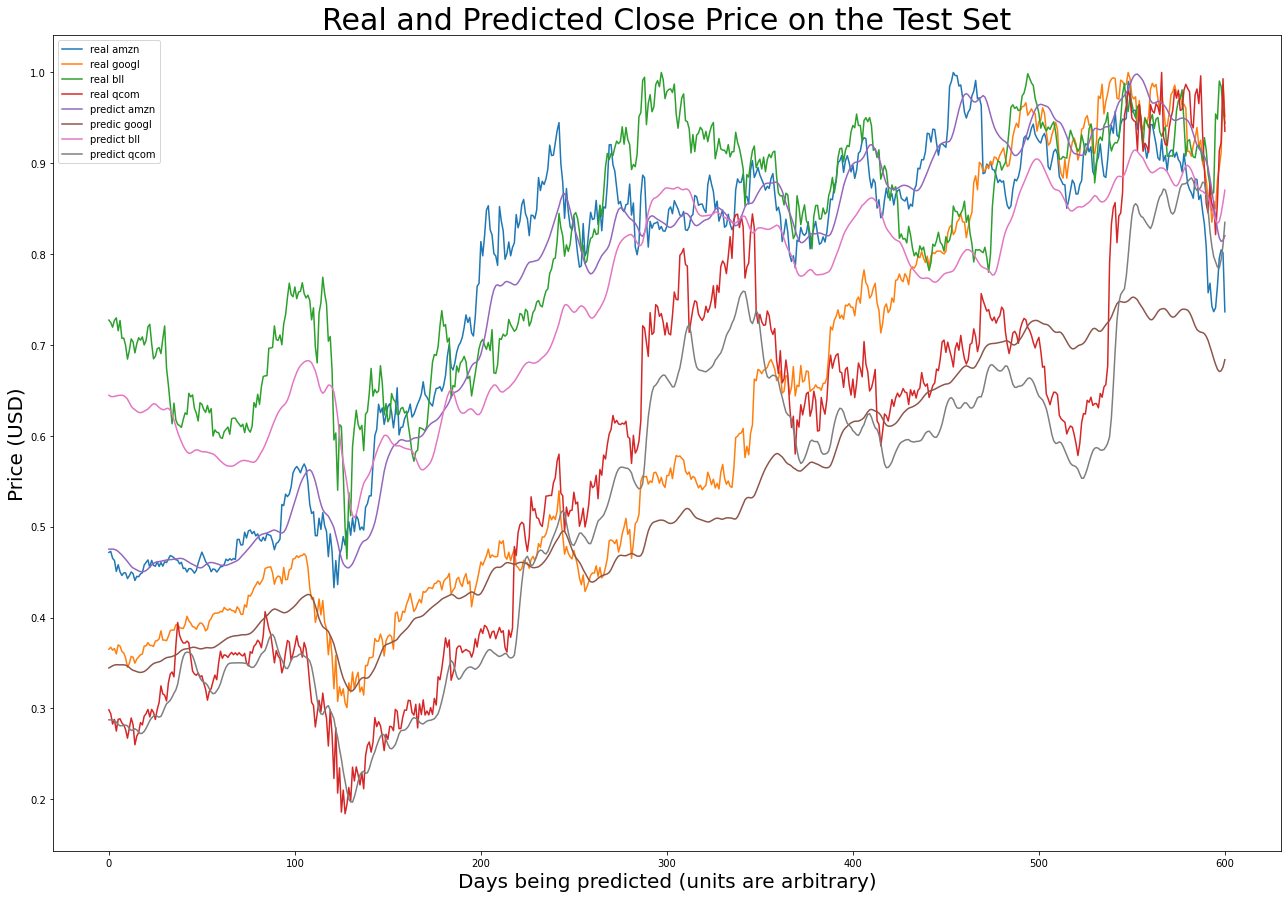

In [ ]:
# Predict Model data Test
y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred= model3.predict([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom])
preds_arr = np.hstack((y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred))
y_test_pred = preds_arr

amzn=0
googl=1
bll=2
qcom=3

plt.gcf().set_size_inches(22, 15, forward=True)
currentFig.set_facecolor('white')

real = plt.plot(y_test[:,:], label='real')
pred = plt.plot(y_test_pred[:,:], label='predicted')

plt.legend(['real amzn','real googl','real bll','real qcom','predict amzn','predic googl','predict bll','predict qcom'])
plt.xlabel('Days being predicted (units are arbitrary)', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close Price on the Test Set', fontsize=30)

plt.show()

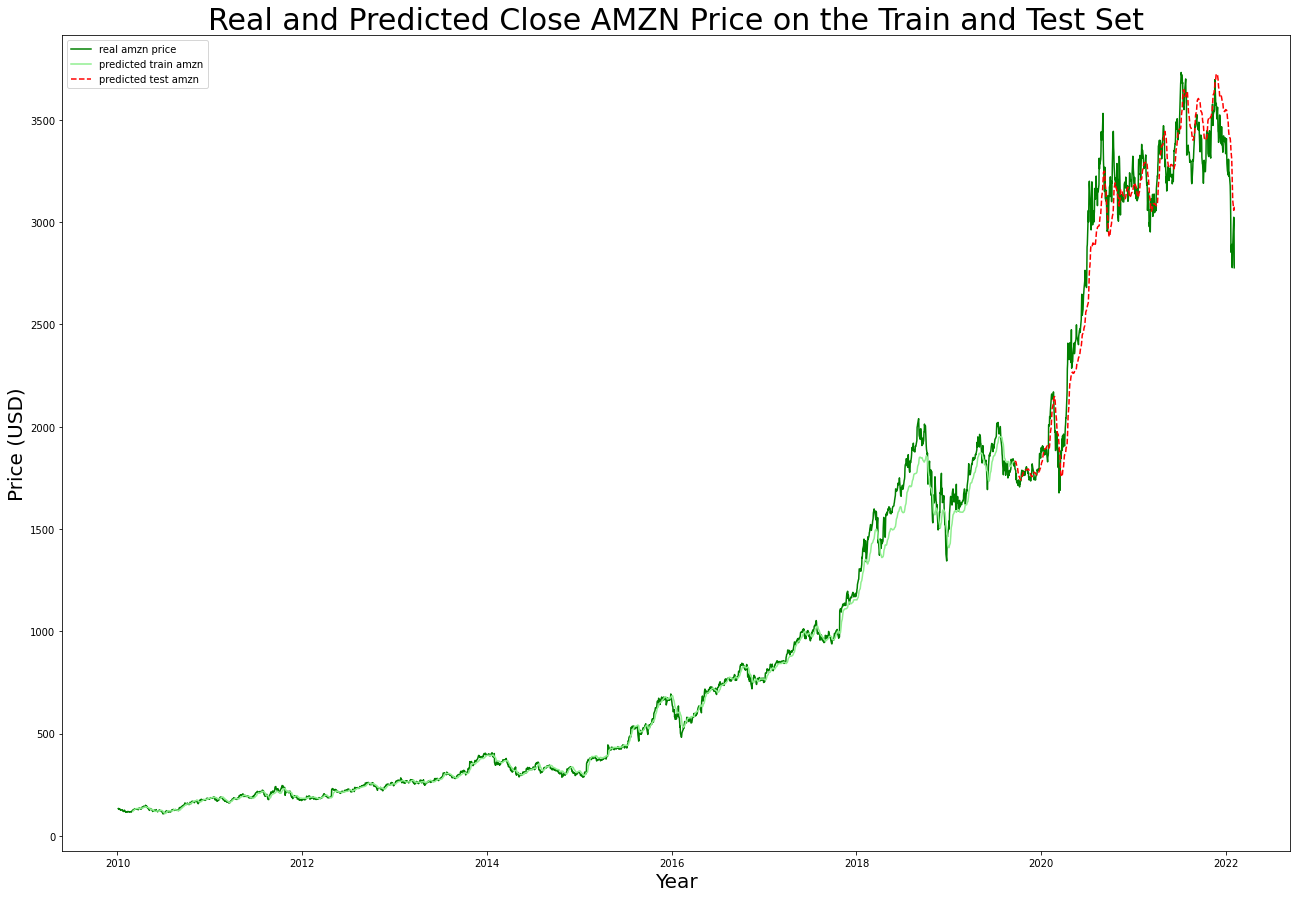

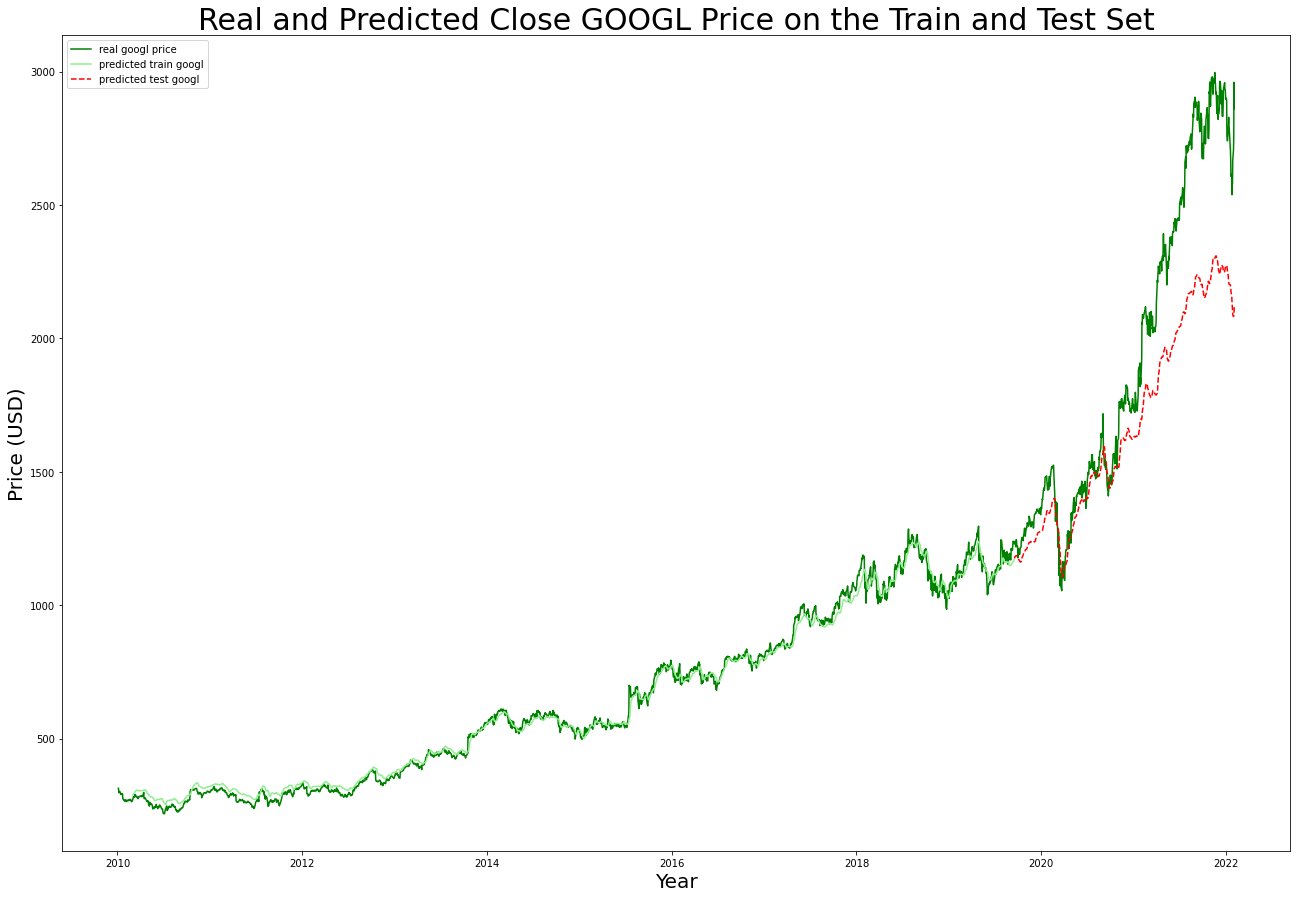

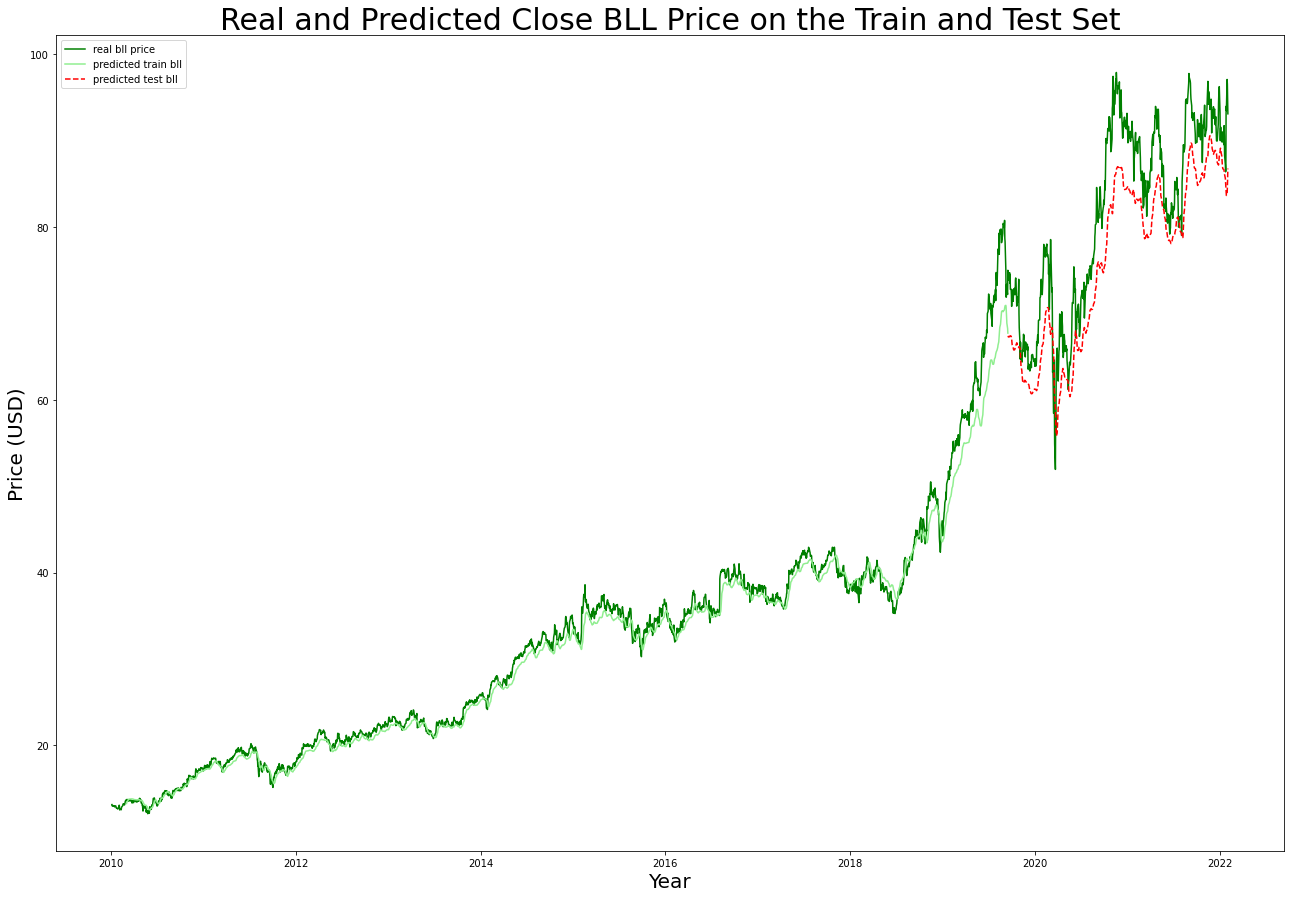

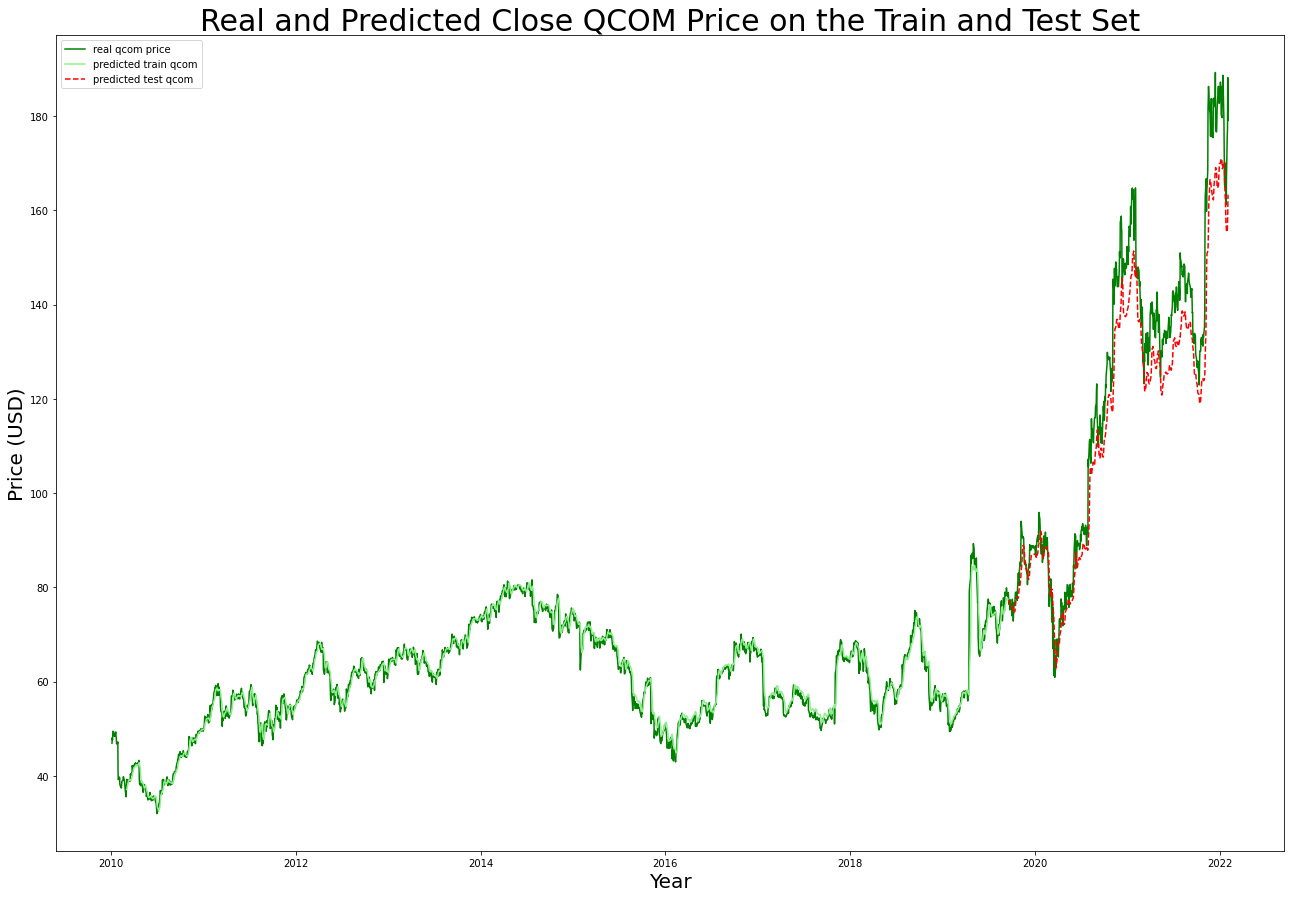

In [ ]:
# Prediction data of each company
y_train_amzn_pred, y_train_googl_pred, y_train_bll_pred, y_train_qcom_pred= model3.predict([X_train_amzn,X_train_googl,X_train_bll,X_train_qcom])
y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred= model3.predict([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom])
trainpreds_arr = np.hstack((y_train_amzn_pred, y_train_googl_pred, y_train_bll_pred, y_train_qcom_pred))
testpreds_arr = np.hstack((y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred))
y_train_pred = y_normaliser.inverse_transform(trainpreds_arr)
y_test_pred = y_normaliser.inverse_transform(testpreds_arr)

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_amzn'], label='real amzn price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,amzn], label='predicted train amzn', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,amzn], label='predicted test amzn', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close AMZN Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_googl'], label='real googl price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,googl], label='predicted train googl', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,googl], label='predicted test googl', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close GOOGL Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_bll'], label='real bll price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,bll], label='predicted train bll', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,bll], label='predicted test bll', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close BLL Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_qcom'], label='real qcom price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,qcom], label='predicted train qcom', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,qcom], label='predicted test qcom', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close QCOM Price on the Train and Test Set', fontsize=30)
plt.show()

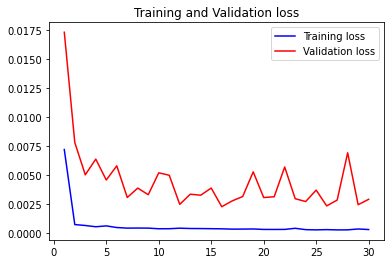

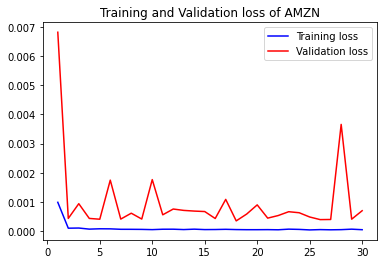

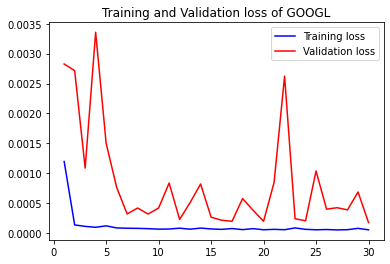

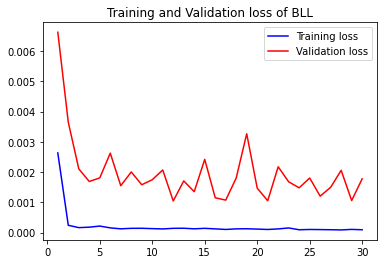

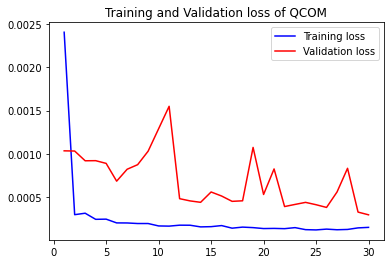

In [ ]:
# Visualization Loss for each company
loss = history.history['loss']
val_loss = history.history['val_loss']
amzn_loss = history.history['amzn_final_loss']
val_amzn_loss = history.history['val_amzn_final_loss']
googl_loss = history.history['googl_final_loss']
val_googl_loss = history.history['val_googl_final_loss']
bll_loss = history.history['bll_final_loss']
val_bll_loss = history.history['val_bll_final_loss']
qcom_loss = history.history['qcom_final_loss']
val_qcom_loss = history.history['val_qcom_final_loss']
epochs = range(1, len(loss) + 1)
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

plt.plot(epochs, amzn_loss, 'b', label='Training loss')
plt.plot(epochs, val_amzn_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of AMZN')
plt.legend()
plt.show()

plt.plot(epochs, googl_loss, 'b', label='Training loss')
plt.plot(epochs, val_googl_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of GOOGL')
plt.legend()
plt.show()

plt.plot(epochs, bll_loss, 'b', label='Training loss')
plt.plot(epochs, val_bll_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of BLL')
plt.legend()
plt.show()

plt.plot(epochs, qcom_loss, 'b', label='Training loss')
plt.plot(epochs, val_qcom_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of QCOM')
plt.legend()
plt.show()

In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of AMZN Price 

# Calculating MAE performance metrics
mae_amzn_train = mean_absolute_error(unscaled_y_train_amzn, y_train_pred[:,amzn])

# Calculating Test Data MAE
mae_amzn_test = mean_absolute_error(unscaled_y_test_amzn, y_test_pred[:,amzn])

# Calculating MSE performance metrics
mse_amzn_train = mean_squared_error(unscaled_y_train_amzn, y_train_pred[:,amzn])

# Calculating Test Data MSE
mse_amzn_test = mean_squared_error(unscaled_y_test_amzn, y_test_pred[:,amzn])

# Calculating RMSE performance metrics
rmse_amzn_train = math.sqrt(mean_squared_error(unscaled_y_train_amzn, y_train_pred[:,amzn]))

# Calculating Test Data RMSE
rmse_amzn_test = math.sqrt(mean_squared_error(unscaled_y_test_amzn, y_test_pred[:,amzn]))

# Calculating MAPE performance metrics
mape_amzn_train = np.mean(np.abs((unscaled_y_train_amzn - y_train_pred[:,amzn])/unscaled_y_train_amzn))*100

# Calculating Test Data MAPE
mape_amzn_test = np.mean(np.abs((unscaled_y_test_amzn - y_test_pred[:,amzn])/unscaled_y_test_amzn))*100

print('Evaluation of AMZN price','\nMAE Train:', mae_amzn_train, '\nMAE Test:', mae_amzn_test,
      '\nMSE Train:', mse_amzn_train, '\nMSE Test:', mse_amzn_test,
      '\nRMSE Train1:', rmse_amzn_train, '\nRMSE Test1:', rmse_amzn_test,
      '\nMAPE Train:', mape_amzn_train, '\nMAPE Test:', mape_amzn_test)

Evaluation of AMZN price 
MAE Train: 24.51776879953931 
MAE Test: 113.67726092092606 
MSE Train: 1999.6826384632639 
MSE Test: 21932.855150500694 
RMSE Train1: 44.71781119937853 
RMSE Test1: 148.09745153276842 
MAPE Train: 3.224396928679433 
MAPE Test: 3.942333721323514


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of GOOGL Price 

# Calculating MAE performance metrics
mae_googl_train = mean_absolute_error(unscaled_y_train_googl, y_train_pred[:,googl])

# Calculating Test Data MAE
mae_googl_test = mean_absolute_error(unscaled_y_test_googl, y_test_pred[:,googl])

# Calculating MSE performance metrics
mse_googl_train = mean_squared_error(unscaled_y_train_googl, y_train_pred[:,googl])

# Calculating Test Data MSE
mse_googl_test = mean_squared_error(unscaled_y_test_googl, y_test_pred[:,googl])

# Calculating RMSE performance metrics
rmse_googl_train = math.sqrt(mean_squared_error(unscaled_y_train_googl, y_train_pred[:,googl]))

# Calculating Test Data RMSE
rmse_googl_test = math.sqrt(mean_squared_error(unscaled_y_test_googl, y_test_pred[:,googl]))

# Calculating MAPE performance metrics
mape_googl_train = np.mean(np.abs((unscaled_y_train_googl - y_train_pred[:,googl])/unscaled_y_train_googl))*100

# Calculating Test Data MAPE
mape_googl_test = np.mean(np.abs((unscaled_y_test_googl - y_test_pred[:,googl])/unscaled_y_test_googl))*100

print('Evaluation of GOOGL price','\nMAE Train:', mae_googl_train, '\nMAE Test:', mae_googl_test,
      '\nMSE Train:', mse_googl_train, '\nMSE Test:', mse_googl_test,
      '\nRMSE Train1:', rmse_googl_train, '\nRMSE Test1:', rmse_googl_test,
      '\nMAPE Train:', mape_googl_train, '\nMAPE Test:', mape_googl_test)

Evaluation of GOOGL price 
MAE Train: 19.29316287253035 
MAE Test: 252.22791705393354 
MSE Train: 602.7214101691833 
MSE Test: 116321.51694538532 
RMSE Train1: 24.55038513280766 
RMSE Test1: 341.0594038366122 
MAPE Train: 3.8571010732962563 
MAPE Test: 10.88176984318939


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of BLL Price 

# Calculating MAE performance metrics
mae_bll_train = mean_absolute_error(unscaled_y_train_bll, y_train_pred[:,bll])

# Calculating Test Data MAE
mae_bll_test = mean_absolute_error(unscaled_y_test_bll, y_test_pred[:,bll])

# Calculating MSE performance metrics
mse_bll_train = mean_squared_error(unscaled_y_train_bll, y_train_pred[:,bll])

# Calculating Test Data MSE
mse_bll_test = mean_squared_error(unscaled_y_test_bll, y_test_pred[:,bll])

# Calculating RMSE performance metrics
rmse_bll_train = math.sqrt(mean_squared_error(unscaled_y_train_bll, y_train_pred[:,bll]))

# Calculating Test Data RMSE
rmse_bll_test = math.sqrt(mean_squared_error(unscaled_y_test_bll, y_test_pred[:,bll]))

# Calculating MAPE performance metrics
mape_bll_train = np.mean(np.abs((unscaled_y_train_bll - y_train_pred[:,bll])/unscaled_y_train_bll))*100

# Calculating Test Data MAPE
mape_bll_test = np.mean(np.abs((unscaled_y_test_bll - y_test_pred[:,bll])/unscaled_y_test_bll))*100

print('Evaluation of BLL price','\nMAE Train:', mae_bll_train, '\nMAE Test:', mae_bll_test,
      '\nMSE Train:', mse_bll_train, '\nMSE Test:', mse_bll_test,
      '\nRMSE Train1:', rmse_bll_train, '\nRMSE Test1:', rmse_bll_test,
      '\nMAPE Train:', mape_bll_train, '\nMAPE Test:', mape_bll_test)

Evaluation of BLL price 
MAE Train: 1.0899963279689198 
MAE Test: 5.537058660472292 
MSE Train: 3.3040792763104028 
MSE Test: 37.667342890073115 
RMSE Train1: 1.8177126495434868 
RMSE Test1: 6.1373726373810085 
MAPE Train: 3.00434956871507 
MAPE Test: 6.744879743043292


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of QCOM Price 

# Calculating MAE performance metrics
mae_qcom_train = mean_absolute_error(unscaled_y_train_qcom, y_train_pred[:,qcom])

# Calculating Test Data MAE
mae_qcom_test = mean_absolute_error(unscaled_y_test_qcom, y_test_pred[:,qcom])

# Calculating MSE performance metrics
mse_qcom_train = mean_squared_error(unscaled_y_train_qcom, y_train_pred[:,qcom])

# Calculating Test Data MSE
mse_qcom_test = mean_squared_error(unscaled_y_test_qcom, y_test_pred[:,qcom])

# Calculating RMSE performance metrics
rmse_qcom_train = math.sqrt(mean_squared_error(unscaled_y_train_qcom, y_train_pred[:,qcom]))

# Calculating Test Data RMSE
rmse_qcom_test = math.sqrt(mean_squared_error(unscaled_y_test_qcom, y_test_pred[:,qcom]))

# Calculating MAPE performance metrics
mape_qcom_train = np.mean(np.abs((unscaled_y_train_qcom - y_train_pred[:,qcom])/unscaled_y_train_qcom))*100

# Calculating Test Data MAPE
mape_qcom_test = np.mean(np.abs((unscaled_y_test_qcom - y_test_pred[:,qcom])/unscaled_y_test_qcom))*100

print('Evaluation of QCOM price','\nMAE Train:', mae_qcom_train, '\nMAE Test:', mae_qcom_test,
      '\nMSE Train:', mse_qcom_train, '\nMSE Test:', mse_qcom_test,
      '\nRMSE Train1:', rmse_qcom_train, '\nRMSE Test1:', rmse_qcom_test,
      '\nMAPE Train:', mape_qcom_train, '\nMAPE Test:', mape_qcom_test)

Evaluation of QCOM price 
MAE Train: 1.1849346279949136 
MAE Test: 7.316790385571573 
MSE Train: 3.2130854345619233 
MSE Test: 85.07813432174227 
RMSE Train1: 1.7925081407240313 
RMSE Test1: 9.223780912496906 
MAPE Train: 2.004587560159772 
MAPE Test: 5.543568482969011


In [ ]:
#model3
df_pred_test_norm = pd.DataFrame(data=testpreds_arr)
df_pred_train_norm = pd.DataFrame(data=trainpreds_arr)
df_pred_test = pd.DataFrame(data=y_test_pred)
df_pred_train = pd.DataFrame(data=y_train_pred)

file_name35 = 'TestPredNormDataLstm3.xlsx'
file_name36 = 'TrainPredNormDataLstm3.xlsx'
file_name37 = 'TestPredDataLstm3.xlsx'
file_name38 = 'TrainPredDataLstm3.xlsx'

df_pred_test_norm.to_excel(file_name35)
df_pred_train_norm.to_excel(file_name36)
df_pred_test.to_excel(file_name37)
df_pred_train.to_excel(file_name38)

# **Model2**

In [ ]:
input_amzn = Input(shape=(num_days_used, num_features_amzn), name = 'input_amzn')
input_googl = Input(shape=(num_days_used, num_features_googl), name = 'input_googl')
input_bll = Input(shape=(num_days_used, num_features_bll), name = 'input_bll')
input_qcom = Input(shape=(num_days_used, num_features_qcom), name = 'input_qcom')


x1 = LSTM(160, return_sequences=True, name='LSTM1_amzn')(input_amzn)
x1 = Dropout(0.5)(x1)
x1 = LSTM(160, return_sequences=True, name='LSTM2_amzn')(x1)
x1 = Dropout(0.5)(x1)

x2 = LSTM(160, return_sequences=True, name='LSTM1_googl')(input_googl)
x2 = Dropout(0.5)(x2)
x2 = LSTM(160, return_sequences=True, name='LSTM2_googl')(x2)
x2 = Dropout(0.5)(x2)

x3 = LSTM(160, return_sequences=True, name='LSTM1_bll')(input_bll)
x3 = Dropout(0.5)(x3)
x3 = LSTM(160, return_sequences=True, name='LSTM2_bll')(x3)
x3 = Dropout(0.5)(x3)

x4 = LSTM(160, return_sequences=True, name='LSTM1_qcom')(input_qcom)
x4 = Dropout(0.5)(x4)
x4 = LSTM(160, return_sequences=True, name='LSTM2_qcom')(x4)
x4 = Dropout(0.5)(x4)

conc = concatenate([x1,x2,x3,x4])
conc = LSTM(160, return_sequences=True, name='LSTM_conc')(conc)

output1 = LSTM(160, name='amzn_0')(conc)
output1 = Dense(1, name='amzn_final')(output1)

output2 = LSTM(160, name='googl_0')(conc)
output2 = Dense(1, name='googl_final')(output2)

output3 = LSTM(160, name='bll_0')(conc)
output3 = Dense(1, name='bll_final')(output3)

output4 = LSTM(160, name='qcom_0')(conc)
output4 = Dense(1, name='qcom_final')(output4)

model4 = Model(inputs = [input_amzn, input_googl, input_bll, input_qcom], outputs = [output1, output2, output3, output4])

adam = Adam(learning_rate=0.001)

model4.compile(optimizer=adam, loss='mse')
model4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_amzn (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                                  
 input_googl (InputLayer)       [(None, 40, 1)]      0           []                               
                                                                                                  
 input_bll (InputLayer)         [(None, 40, 1)]      0           []                               
                                                                                                  
 input_qcom (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                            

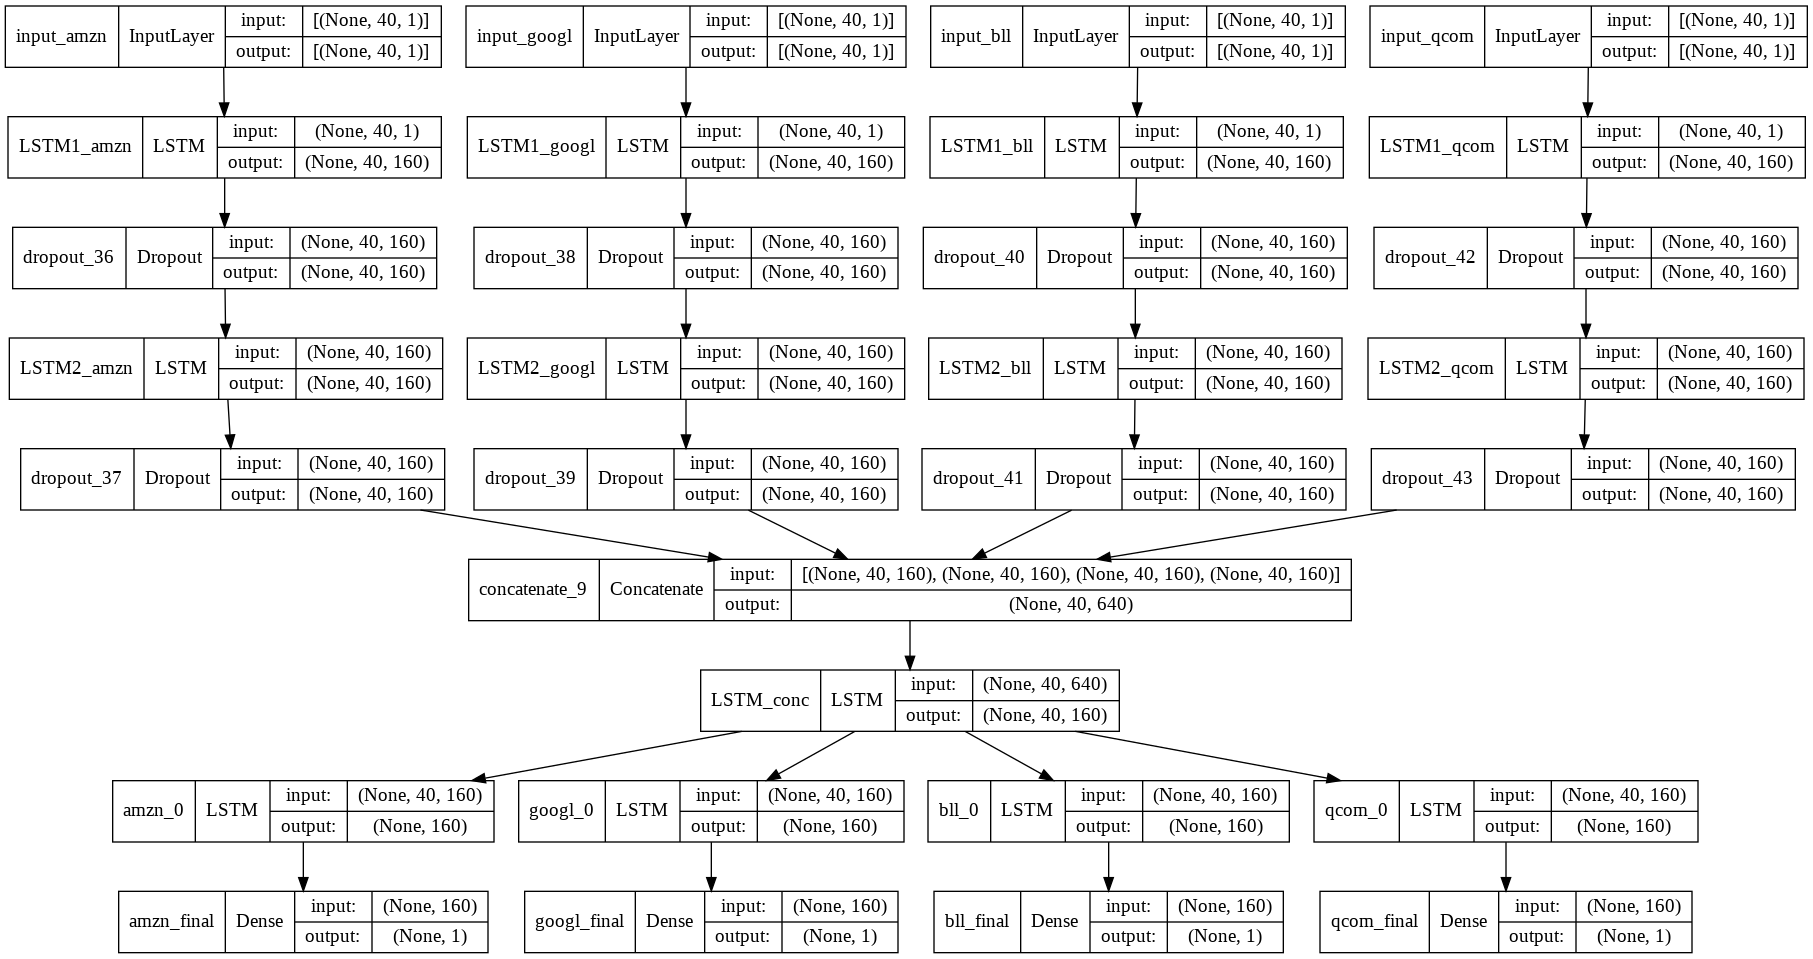

In [ ]:
# Displaying the structure of the final model
plot_model(model4, show_shapes=True)

In [ ]:
# Fitting Model
history = model4.fit(x=[X_train_amzn,X_train_googl,X_train_bll,X_train_qcom], y=[y_train_amzn,y_train_googl,y_train_bll,y_train_qcom], batch_size=32, epochs=30, validation_split=0.2)
evaluation = model4.evaluate([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom], [y_test_amzn,y_test_googl,y_test_bll,y_test_qcom])
print(evaluation)

Epoch 1/30
61/61 [==============================] - 99s 1s/step - loss: 0.0111 - amzn_final_loss: 0.0015 - googl_final_loss: 0.0019 - bll_final_loss: 0.0033 - qcom_final_loss: 0.0044 - val_loss: 0.0266 - val_amzn_final_loss: 0.0132 - val_googl_final_loss: 0.0028 - val_bll_final_loss: 0.0064 - val_qcom_final_loss: 0.0042
Epoch 2/30
61/61 [==============================] - 67s 1s/step - loss: 8.9453e-04 - amzn_final_loss: 1.3780e-04 - googl_final_loss: 1.6368e-04 - bll_final_loss: 2.3400e-04 - qcom_final_loss: 3.5904e-04 - val_loss: 0.0151 - val_amzn_final_loss: 0.0055 - val_googl_final_loss: 0.0030 - val_bll_final_loss: 0.0048 - val_qcom_final_loss: 0.0018
Epoch 3/30
61/61 [==============================] - 67s 1s/step - loss: 7.3778e-04 - amzn_final_loss: 1.0072e-04 - googl_final_loss: 1.2454e-04 - bll_final_loss: 1.8614e-04 - qcom_final_loss: 3.2637e-04 - val_loss: 0.0154 - val_amzn_final_loss: 7.5278e-04 - val_googl_final_loss: 0.0032 - val_bll_final_loss: 0.0087 - val_qcom_final_los

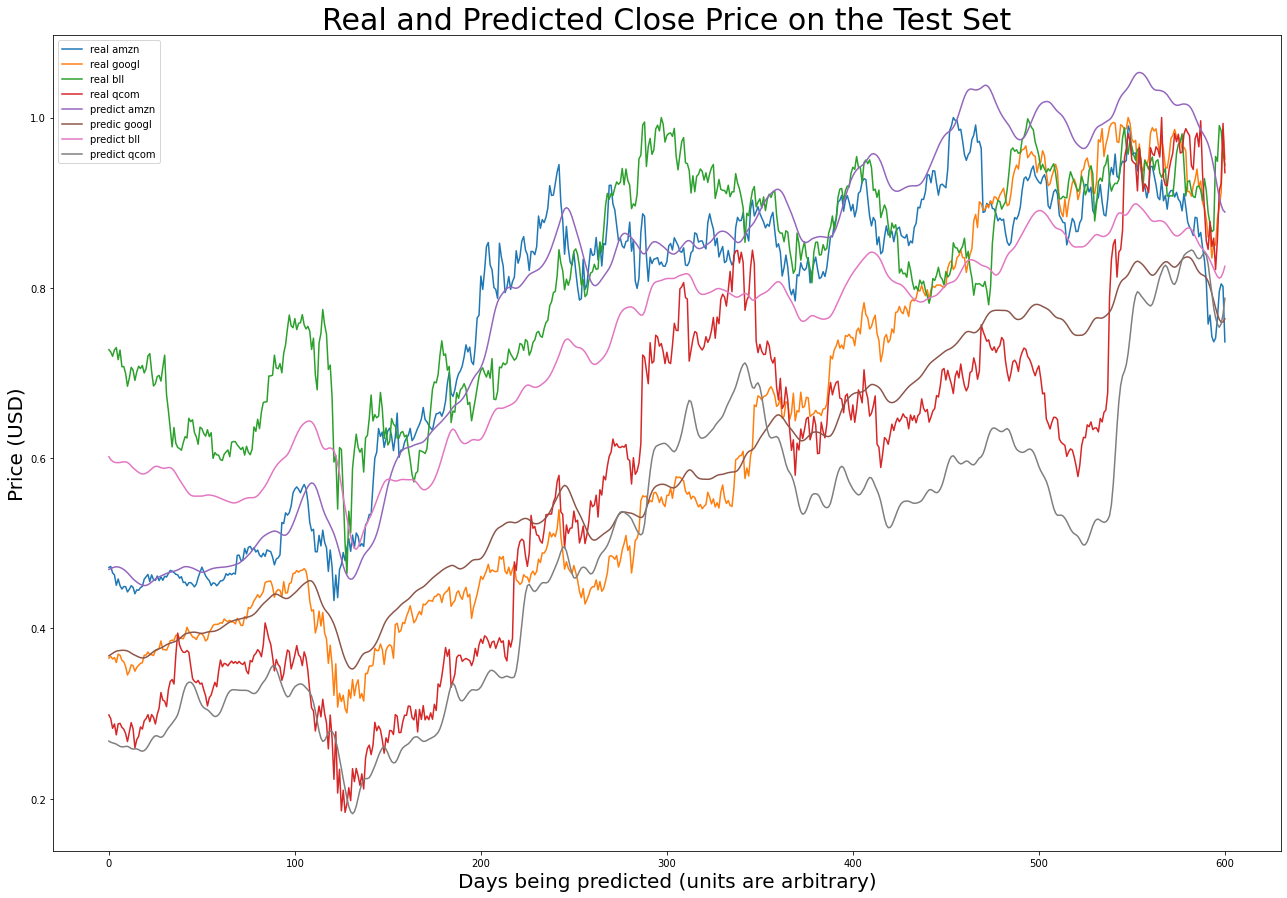

In [ ]:
# Prediction data test
y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred= model4.predict([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom])
preds_arr = np.hstack((y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred))
y_test_pred = preds_arr

amzn=0
googl=1
bll=2
qcom=3

plt.gcf().set_size_inches(22, 15, forward=True)
currentFig.set_facecolor('white')

real = plt.plot(y_test[:,:], label='real')
pred = plt.plot(y_test_pred[:,:], label='predicted')

plt.legend(['real amzn','real googl','real bll','real qcom','predict amzn','predic googl','predict bll','predict qcom'])
plt.xlabel('Days being predicted (units are arbitrary)', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close Price on the Test Set', fontsize=30)

plt.show()

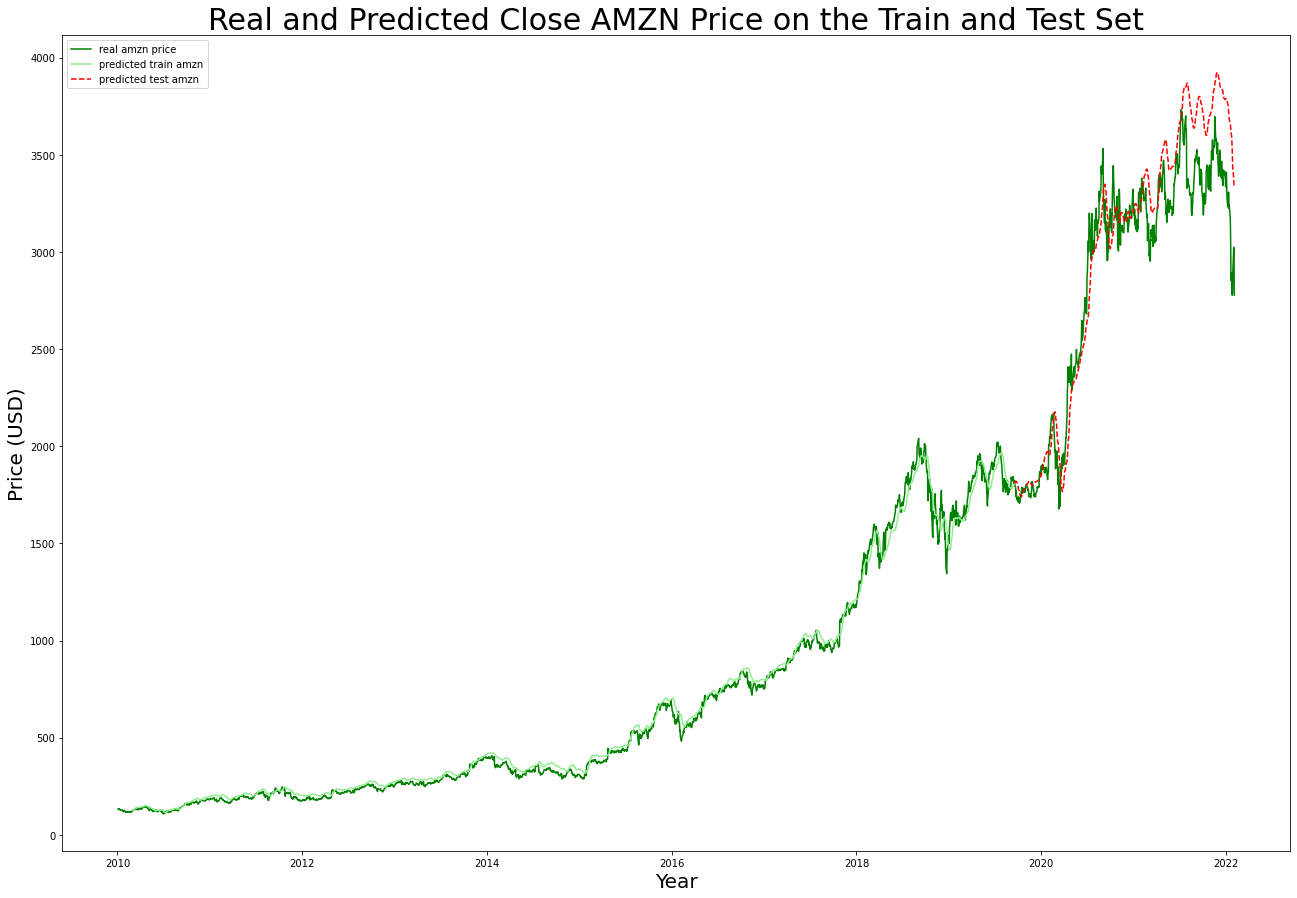

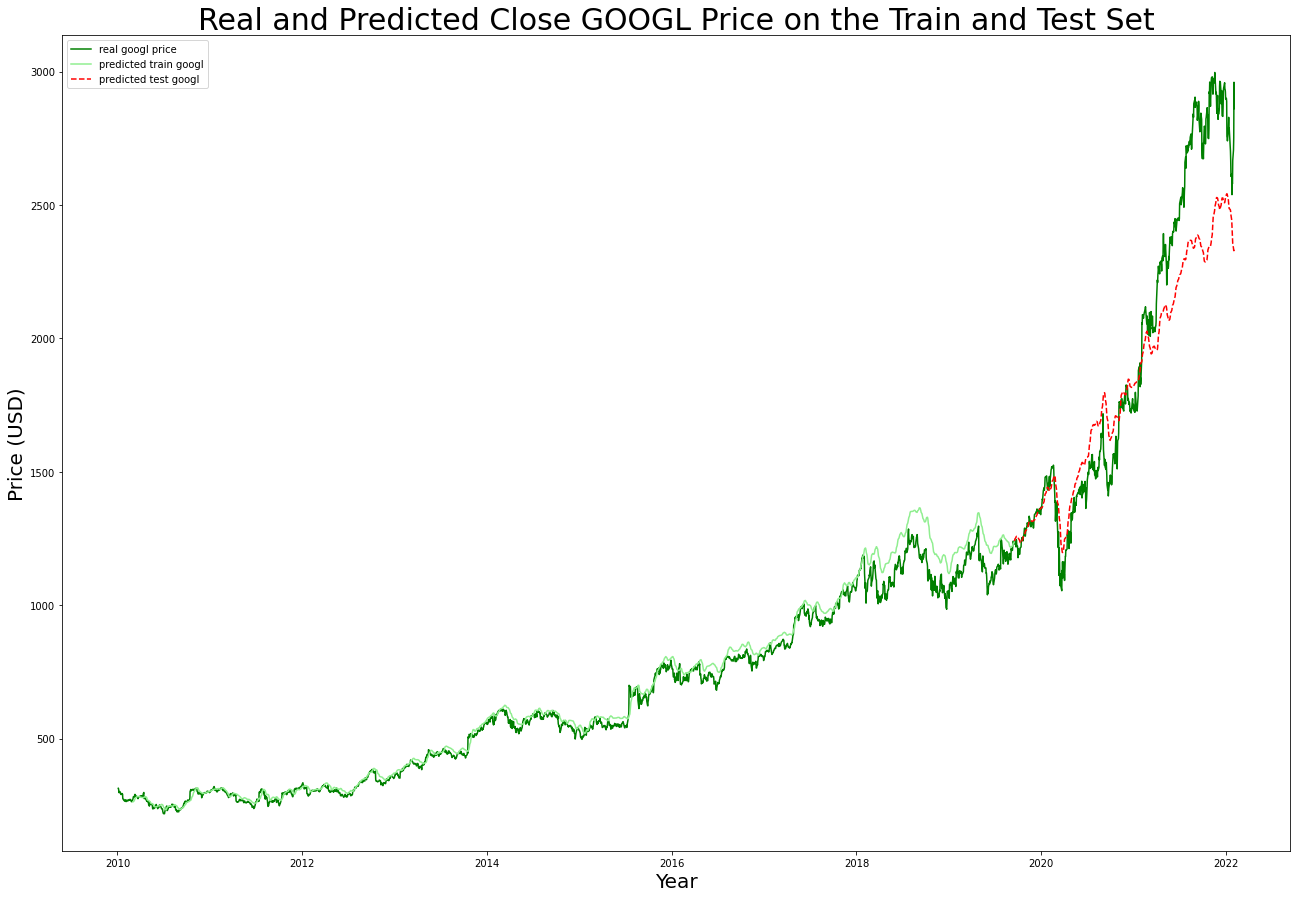

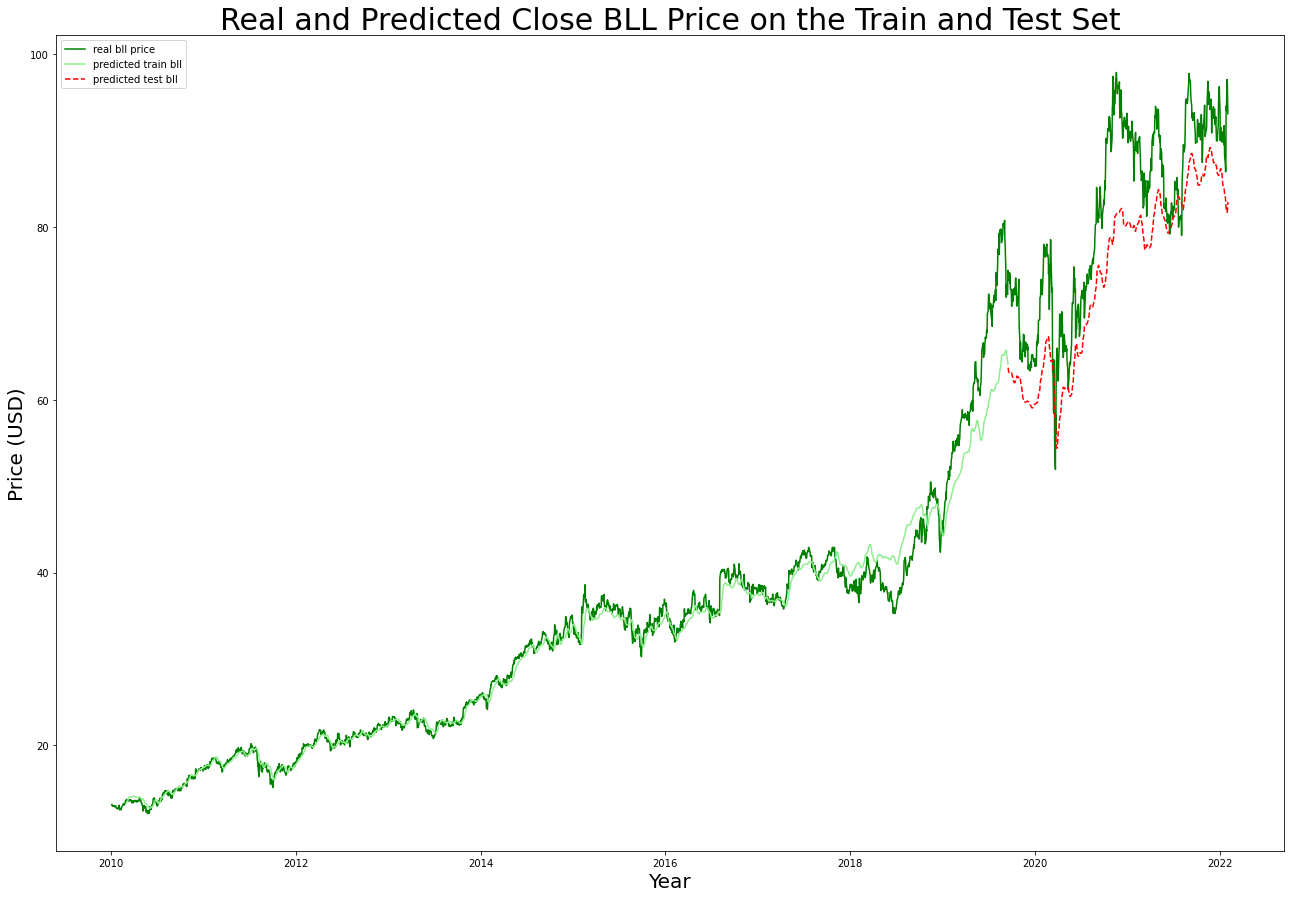

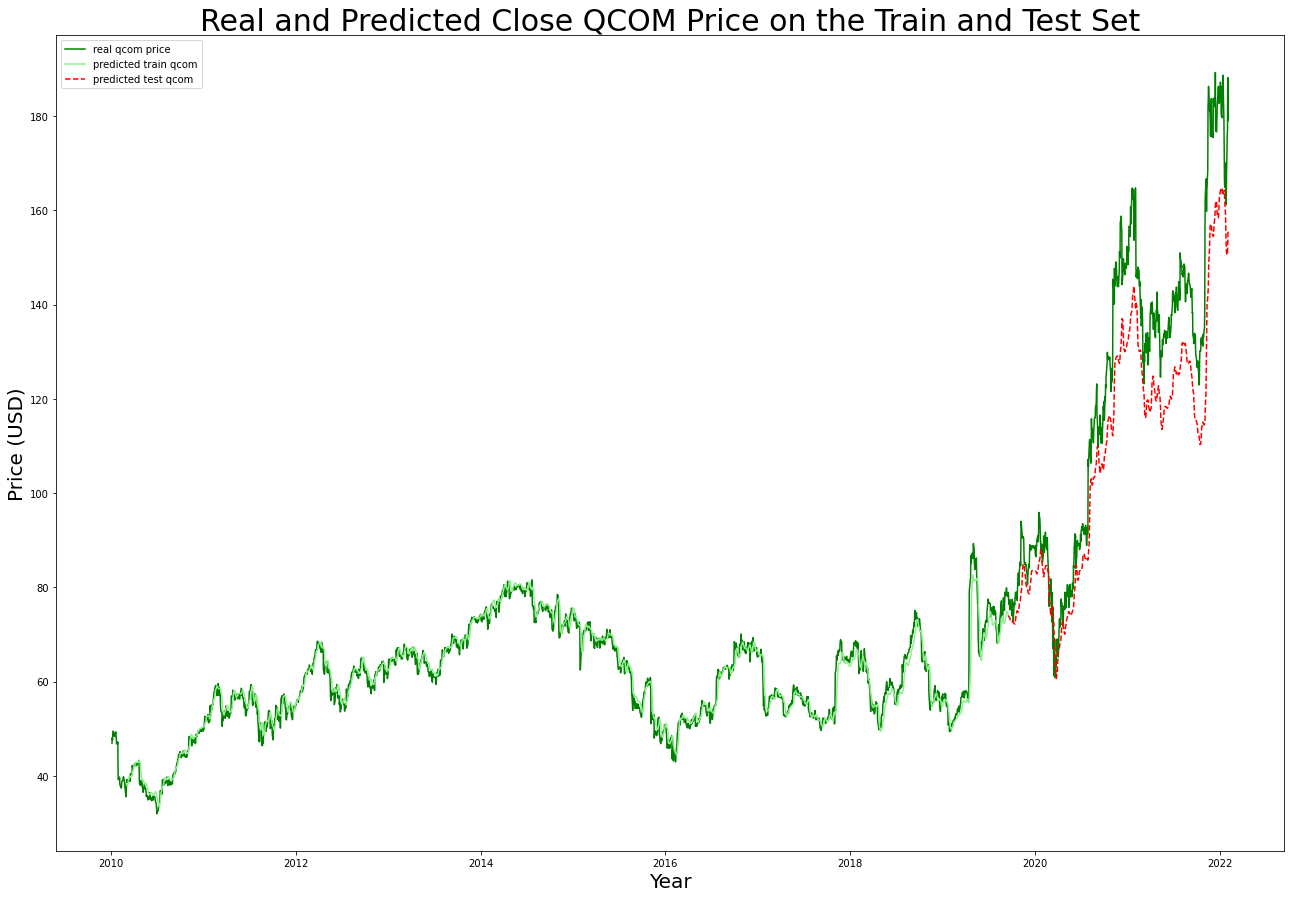

In [ ]:
# Prediction data of each company
y_train_amzn_pred, y_train_googl_pred, y_train_bll_pred, y_train_qcom_pred= model4.predict([X_train_amzn,X_train_googl,X_train_bll,X_train_qcom])
y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred= model4.predict([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom])
trainpreds_arr = np.hstack((y_train_amzn_pred, y_train_googl_pred, y_train_bll_pred, y_train_qcom_pred))
testpreds_arr = np.hstack((y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred))
y_train_pred = y_normaliser.inverse_transform(trainpreds_arr)
y_test_pred = y_normaliser.inverse_transform(testpreds_arr)

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_amzn'], label='real amzn price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,amzn], label='predicted train amzn', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,amzn], label='predicted test amzn', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close AMZN Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_googl'], label='real googl price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,googl], label='predicted train googl', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,googl], label='predicted test googl', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close GOOGL Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_bll'], label='real bll price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,bll], label='predicted train bll', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,bll], label='predicted test bll', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close BLL Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_qcom'], label='real qcom price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,qcom], label='predicted train qcom', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,qcom], label='predicted test qcom', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close QCOM Price on the Train and Test Set', fontsize=30)
plt.show()

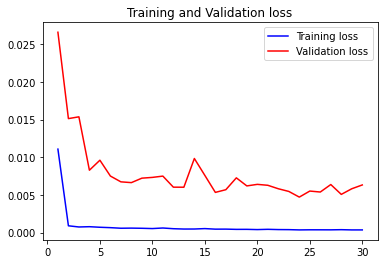

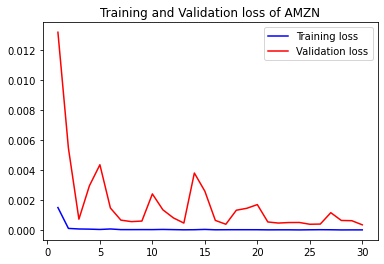

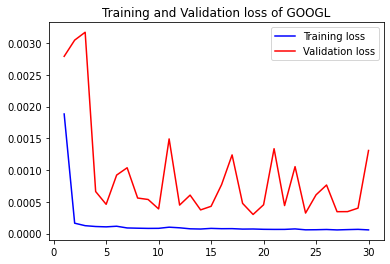

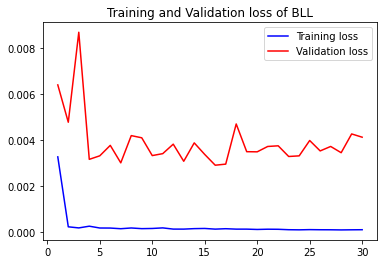

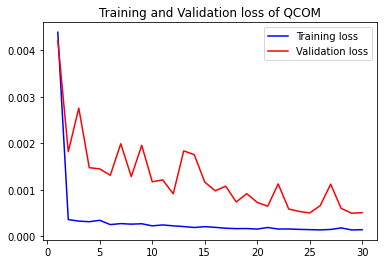

In [ ]:
# Visualization Loss
loss = history.history['loss']
val_loss = history.history['val_loss']
amzn_loss = history.history['amzn_final_loss']
val_amzn_loss = history.history['val_amzn_final_loss']
googl_loss = history.history['googl_final_loss']
val_googl_loss = history.history['val_googl_final_loss']
bll_loss = history.history['bll_final_loss']
val_bll_loss = history.history['val_bll_final_loss']
qcom_loss = history.history['qcom_final_loss']
val_qcom_loss = history.history['val_qcom_final_loss']
epochs = range(1, len(loss) + 1)
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

plt.plot(epochs, amzn_loss, 'b', label='Training loss')
plt.plot(epochs, val_amzn_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of AMZN')
plt.legend()
plt.show()

plt.plot(epochs, googl_loss, 'b', label='Training loss')
plt.plot(epochs, val_googl_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of GOOGL')
plt.legend()
plt.show()

plt.plot(epochs, bll_loss, 'b', label='Training loss')
plt.plot(epochs, val_bll_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of BLL')
plt.legend()
plt.show()

plt.plot(epochs, qcom_loss, 'b', label='Training loss')
plt.plot(epochs, val_qcom_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of QCOM')
plt.legend()
plt.show()

In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of AMZN Price 

# Calculating MAE performance metrics
mae_amzn_train = mean_absolute_error(unscaled_y_train_amzn, y_train_pred[:,amzn])

# Calculating Test Data MAE
mae_amzn_test = mean_absolute_error(unscaled_y_test_amzn, y_test_pred[:,amzn])

# Calculating MSE performance metrics
mse_amzn_train = mean_squared_error(unscaled_y_train_amzn, y_train_pred[:,amzn])

# Calculating Test Data MSE
mse_amzn_test = mean_squared_error(unscaled_y_test_amzn, y_test_pred[:,amzn])

# Calculating RMSE performance metrics
rmse_amzn_train = math.sqrt(mean_squared_error(unscaled_y_train_amzn, y_train_pred[:,amzn]))

# Calculating Test Data RMSE
rmse_amzn_test = math.sqrt(mean_squared_error(unscaled_y_test_amzn, y_test_pred[:,amzn]))

# Calculating MAPE performance metrics
mape_amzn_train = np.mean(np.abs((unscaled_y_train_amzn - y_train_pred[:,amzn])/unscaled_y_train_amzn))*100

# Calculating Test Data MAPE
mape_amzn_test = np.mean(np.abs((unscaled_y_test_amzn - y_test_pred[:,amzn])/unscaled_y_test_amzn))*100

print('Evaluation of AMZN price','\nMAE Train:', mae_amzn_train, '\nMAE Test:', mae_amzn_test,
      '\nMSE Train:', mse_amzn_train, '\nMSE Test:', mse_amzn_test,
      '\nRMSE Train1:', rmse_amzn_train, '\nRMSE Test1:', rmse_amzn_test,
      '\nMAPE Train:', mape_amzn_train, '\nMAPE Test:', mape_amzn_test)

Evaluation of AMZN price 
MAE Train: 27.833623904364337 
MAE Test: 173.62283137316712 
MSE Train: 1529.7494494258265 
MSE Test: 52976.96067703596 
RMSE Train1: 39.1120115747813 
RMSE Test1: 230.16724501335102 
MAPE Train: 5.717614501753192 
MAPE Test: 5.808484654737789


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of GOOGL Price 

# Calculating MAE performance metrics
mae_googl_train = mean_absolute_error(unscaled_y_train_googl, y_train_pred[:,googl])

# Calculating Test Data MAE
mae_googl_test = mean_absolute_error(unscaled_y_test_googl, y_test_pred[:,googl])

# Calculating MSE performance metrics
mse_googl_train = mean_squared_error(unscaled_y_train_googl, y_train_pred[:,googl])

# Calculating Test Data MSE
mse_googl_test = mean_squared_error(unscaled_y_test_googl, y_test_pred[:,googl])

# Calculating RMSE performance metrics
rmse_googl_train = math.sqrt(mean_squared_error(unscaled_y_train_googl, y_train_pred[:,googl]))

# Calculating Test Data RMSE
rmse_googl_test = math.sqrt(mean_squared_error(unscaled_y_test_googl, y_test_pred[:,googl]))

# Calculating MAPE performance metrics
mape_googl_train = np.mean(np.abs((unscaled_y_train_googl - y_train_pred[:,googl])/unscaled_y_train_googl))*100

# Calculating Test Data MAPE
mape_googl_test = np.mean(np.abs((unscaled_y_test_googl - y_test_pred[:,googl])/unscaled_y_test_googl))*100

print('Evaluation of GOOGL price','\nMAE Train:', mae_googl_train, '\nMAE Test:', mae_googl_test,
      '\nMSE Train:', mse_googl_train, '\nMSE Test:', mse_googl_test,
      '\nRMSE Train1:', rmse_googl_train, '\nRMSE Test1:', rmse_googl_test,
      '\nMAPE Train:', mape_googl_train, '\nMAPE Test:', mape_googl_test)

Evaluation of GOOGL price 
MAE Train: 32.200139998595915 
MAE Test: 175.2308568970336 
MSE Train: 2495.6852869754653 
MSE Test: 55334.547965938036 
RMSE Train1: 49.95683423692363 
RMSE Test1: 235.2329653044786 
MAPE Train: 4.3850564222872705 
MAPE Test: 7.993644038353286


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of BLL Price 

# Calculating MAE performance metrics
mae_bll_train = mean_absolute_error(unscaled_y_train_bll, y_train_pred[:,bll])

# Calculating Test Data MAE
mae_bll_test = mean_absolute_error(unscaled_y_test_bll, y_test_pred[:,bll])

# Calculating MSE performance metrics
mse_bll_train = mean_squared_error(unscaled_y_train_bll, y_train_pred[:,bll])

# Calculating Test Data MSE
mse_bll_test = mean_squared_error(unscaled_y_test_bll, y_test_pred[:,bll])

# Calculating RMSE performance metrics
rmse_bll_train = math.sqrt(mean_squared_error(unscaled_y_train_bll, y_train_pred[:,bll]))

# Calculating Test Data RMSE
rmse_bll_test = math.sqrt(mean_squared_error(unscaled_y_test_bll, y_test_pred[:,bll]))

# Calculating MAPE performance metrics
mape_bll_train = np.mean(np.abs((unscaled_y_train_bll - y_train_pred[:,bll])/unscaled_y_train_bll))*100

# Calculating Test Data MAPE
mape_bll_test = np.mean(np.abs((unscaled_y_test_bll - y_test_pred[:,bll])/unscaled_y_test_bll))*100

print('Evaluation of BLL price','\nMAE Train:', mae_bll_train, '\nMAE Test:', mae_bll_test,
      '\nMSE Train:', mse_bll_train, '\nMSE Test:', mse_bll_test,
      '\nRMSE Train1:', rmse_bll_train, '\nRMSE Test1:', rmse_bll_test,
      '\nMAPE Train:', mape_bll_train, '\nMAPE Test:', mape_bll_test)

Evaluation of BLL price 
MAE Train: 1.3471893047820118 
MAE Test: 7.1221527505833375 
MSE Train: 6.631824507326161 
MSE Test: 63.90880952024653 
RMSE Train1: 2.57523290351109 
RMSE Test1: 7.994298563366677 
MAPE Train: 3.384875120189564 
MAPE Test: 8.694972250027341


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of QCOM Price 

# Calculating MAE performance metrics
mae_qcom_train = mean_absolute_error(unscaled_y_train_qcom, y_train_pred[:,qcom])

# Calculating Test Data MAE
mae_qcom_test = mean_absolute_error(unscaled_y_test_qcom, y_test_pred[:,qcom])

# Calculating MSE performance metrics
mse_qcom_train = mean_squared_error(unscaled_y_train_qcom, y_train_pred[:,qcom])

# Calculating Test Data MSE
mse_qcom_test = mean_squared_error(unscaled_y_test_qcom, y_test_pred[:,qcom])

# Calculating RMSE performance metrics
rmse_qcom_train = math.sqrt(mean_squared_error(unscaled_y_train_qcom, y_train_pred[:,qcom]))

# Calculating Test Data RMSE
rmse_qcom_test = math.sqrt(mean_squared_error(unscaled_y_test_qcom, y_test_pred[:,qcom]))

# Calculating MAPE performance metrics
mape_qcom_train = np.mean(np.abs((unscaled_y_train_qcom - y_train_pred[:,qcom])/unscaled_y_train_qcom))*100

# Calculating Test Data MAPE
mape_qcom_test = np.mean(np.abs((unscaled_y_test_qcom - y_test_pred[:,qcom])/unscaled_y_test_qcom))*100

print('Evaluation of QCOM price','\nMAE Train:', mae_qcom_train, '\nMAE Test:', mae_qcom_test,
      '\nMSE Train:', mse_qcom_train, '\nMSE Test:', mse_qcom_test,
      '\nRMSE Train1:', rmse_qcom_train, '\nRMSE Test1:', rmse_qcom_test,
      '\nMAPE Train:', mape_qcom_train, '\nMAPE Test:', mape_qcom_test)

Evaluation of QCOM price 
MAE Train: 1.3981057705603388 
MAE Test: 12.31111326550882 
MSE Train: 4.604609059720239 
MSE Test: 211.3961380942483 
RMSE Train1: 2.1458352825229245 
RMSE Test1: 14.539468287879316 
MAPE Train: 2.336908048454517 
MAPE Test: 9.418495295311185


In [ ]:
# Save data to excel
df_pred_test_norm = pd.DataFrame(data=testpreds_arr)
df_pred_train_norm = pd.DataFrame(data=trainpreds_arr)
df_pred_test = pd.DataFrame(data=y_test_pred)
df_pred_train = pd.DataFrame(data=y_train_pred)

file_name39 = 'TestPredNormDataLstm4.xlsx'
file_name40 = 'TrainPredNormDataLstm4.xlsx'
file_name41 = 'TestPredDataLstm4.xlsx'
file_name42 = 'TrainPredDataLstm4.xlsx'

df_pred_test_norm.to_excel(file_name39)
df_pred_train_norm.to_excel(file_name40)
df_pred_test.to_excel(file_name41)
df_pred_train.to_excel(file_name42)

# **Model3**

In [ ]:
input_amzn = Input(shape=(num_days_used, num_features_amzn), name = 'input_amzn')
input_googl = Input(shape=(num_days_used, num_features_googl), name = 'input_googl')
input_bll = Input(shape=(num_days_used, num_features_bll), name = 'input_bll')
input_qcom = Input(shape=(num_days_used, num_features_qcom), name = 'input_qcom')

x1 = LSTM(160, return_sequences=True, name='LSTM1_amzn')(input_amzn)
x1 = Dropout(0.5)(x1)
x1 = LSTM(160, return_sequences=True, name='LSTM2_amzn')(x1)
x1 = Dropout(0.5)(x1)

x2 = LSTM(160, return_sequences=True, name='LSTM1_googl')(input_googl)
x2 = Dropout(0.5)(x2)
x2 = LSTM(160, return_sequences=True, name='LSTM2_googl')(x2)
x2 = Dropout(0.5)(x2)

x3 = LSTM(160, return_sequences=True, name='LSTM1_bll')(input_bll)
x3 = Dropout(0.5)(x3)
x3 = LSTM(160, return_sequences=True, name='LSTM2_bll')(x3)
x3 = Dropout(0.5)(x3)

x4 = LSTM(160, return_sequences=True, name='LSTM1_qcom')(input_qcom)
x4 = Dropout(0.5)(x4)
x4 = LSTM(160, return_sequences=True, name='LSTM2_qcom')(x4)
x4 = Dropout(0.5)(x4)

conc = concatenate([x1,x2,x3,x4])
conc = LSTM(160, return_sequences=True, name='LSTM_conc')(conc)
conc = Dropout(0.5)(conc)

output1 = LSTM(160, name='amzn_0')(conc)
output1 = Dense(1, name='amzn_final')(output1)

output2 = LSTM(160, name='googl_0')(conc)
output2 = Dense(1, name='googl_final')(output2)

output3 = LSTM(160, name='bll_0')(conc)
output3 = Dense(1, name='bll_final')(output3)

output4 = LSTM(160, name='qcom_0')(conc)
output4 = Dense(1, name='qcom_final')(output4)

model5 = Model(inputs = [input_amzn, input_googl, input_bll, input_qcom], outputs = [output1, output2, output3, output4])

adam = Adam(learning_rate=0.001)

model5.compile(optimizer=adam, loss='mse')
model5.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_amzn (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                                  
 input_googl (InputLayer)       [(None, 40, 1)]      0           []                               
                                                                                                  
 input_bll (InputLayer)         [(None, 40, 1)]      0           []                               
                                                                                                  
 input_qcom (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                            

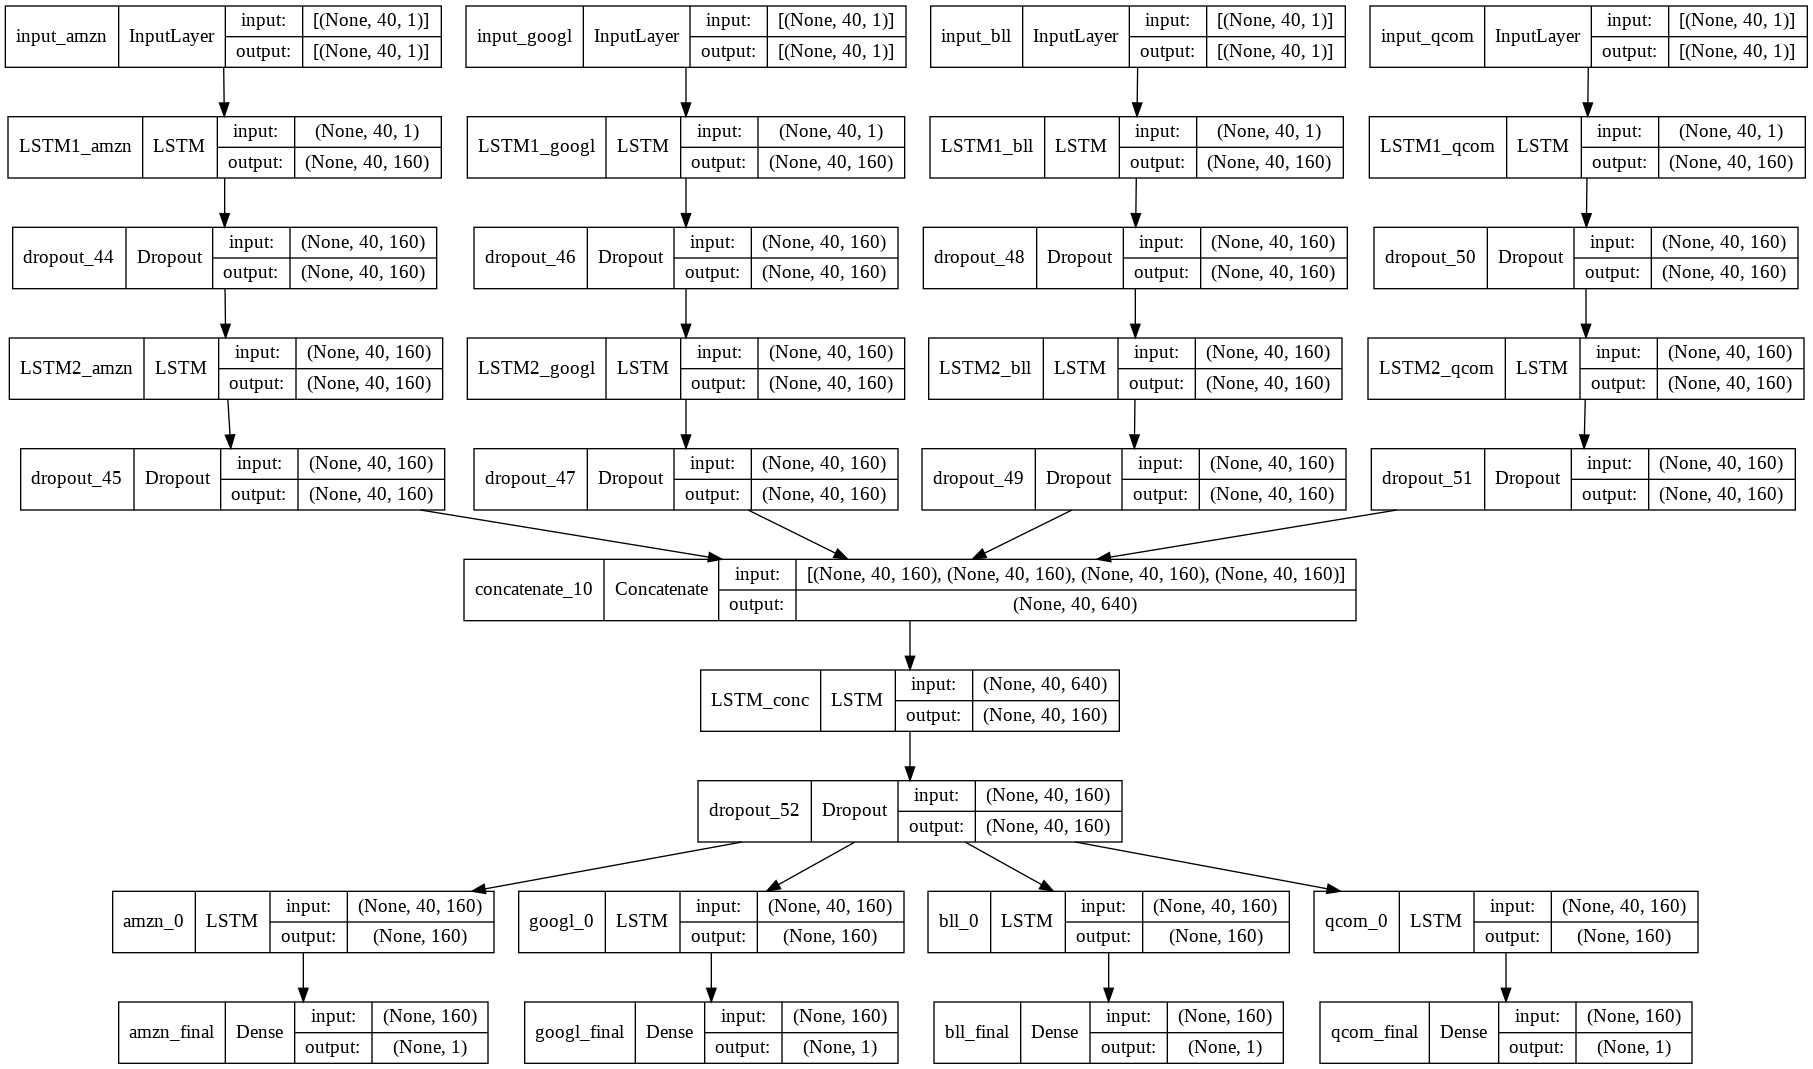

In [ ]:
# Displaying the structure of the final model
plot_model(model5, show_shapes=True)

In [ ]:
# Fitting Model
history = model5.fit(x=[X_train_amzn,X_train_googl,X_train_bll,X_train_qcom], y=[y_train_amzn,y_train_googl,y_train_bll,y_train_qcom], batch_size=32, epochs=30, validation_split=0.2)
evaluation = model5.evaluate([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom], [y_test_amzn,y_test_googl,y_test_bll,y_test_qcom])
print(evaluation)

Epoch 1/30
61/61 [==============================] - 122s 1s/step - loss: 0.0100 - amzn_final_loss: 0.0016 - googl_final_loss: 0.0021 - bll_final_loss: 0.0030 - qcom_final_loss: 0.0033 - val_loss: 0.0238 - val_amzn_final_loss: 0.0132 - val_googl_final_loss: 0.0016 - val_bll_final_loss: 0.0058 - val_qcom_final_loss: 0.0032
Epoch 2/30
61/61 [==============================] - 67s 1s/step - loss: 0.0011 - amzn_final_loss: 1.3891e-04 - googl_final_loss: 1.7908e-04 - bll_final_loss: 3.0985e-04 - qcom_final_loss: 4.3065e-04 - val_loss: 0.0117 - val_amzn_final_loss: 0.0025 - val_googl_final_loss: 0.0031 - val_bll_final_loss: 0.0047 - val_qcom_final_loss: 0.0014
Epoch 3/30
61/61 [==============================] - 68s 1s/step - loss: 8.4552e-04 - amzn_final_loss: 1.0035e-04 - googl_final_loss: 1.5132e-04 - bll_final_loss: 2.2071e-04 - qcom_final_loss: 3.7314e-04 - val_loss: 0.0117 - val_amzn_final_loss: 0.0029 - val_googl_final_loss: 0.0012 - val_bll_final_loss: 0.0053 - val_qcom_final_loss: 0.00

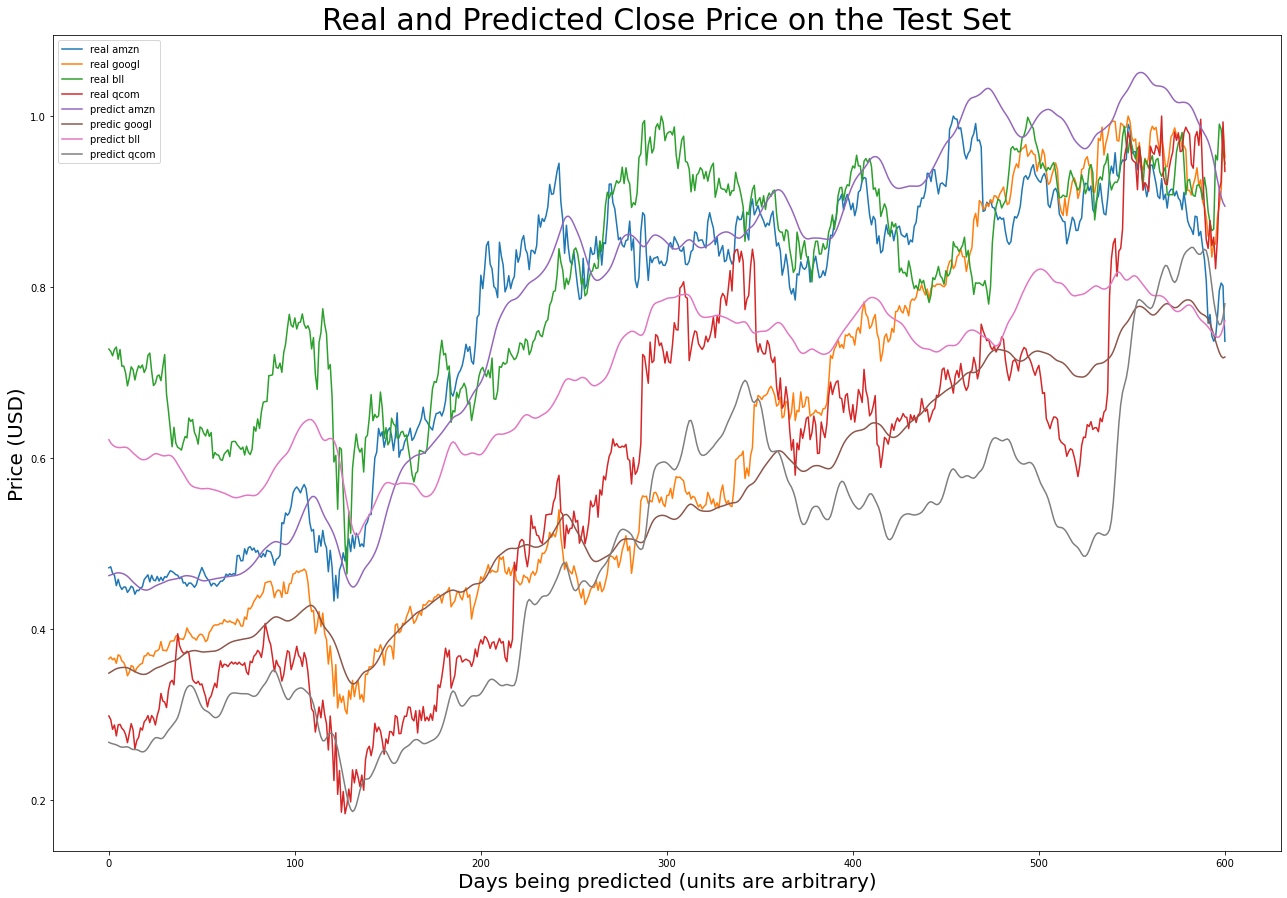

In [ ]:
# Prediction data test
y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred= model5.predict([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom])
preds_arr = np.hstack((y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred))
y_test_pred = preds_arr

amzn=0
googl=1
bll=2
qcom=3

plt.gcf().set_size_inches(22, 15, forward=True)
currentFig.set_facecolor('white')

real = plt.plot(y_test[:,:], label='real')
pred = plt.plot(y_test_pred[:,:], label='predicted')

plt.legend(['real amzn','real googl','real bll','real qcom','predict amzn','predic googl','predict bll','predict qcom'])
plt.xlabel('Days being predicted (units are arbitrary)', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close Price on the Test Set', fontsize=30)

plt.show()

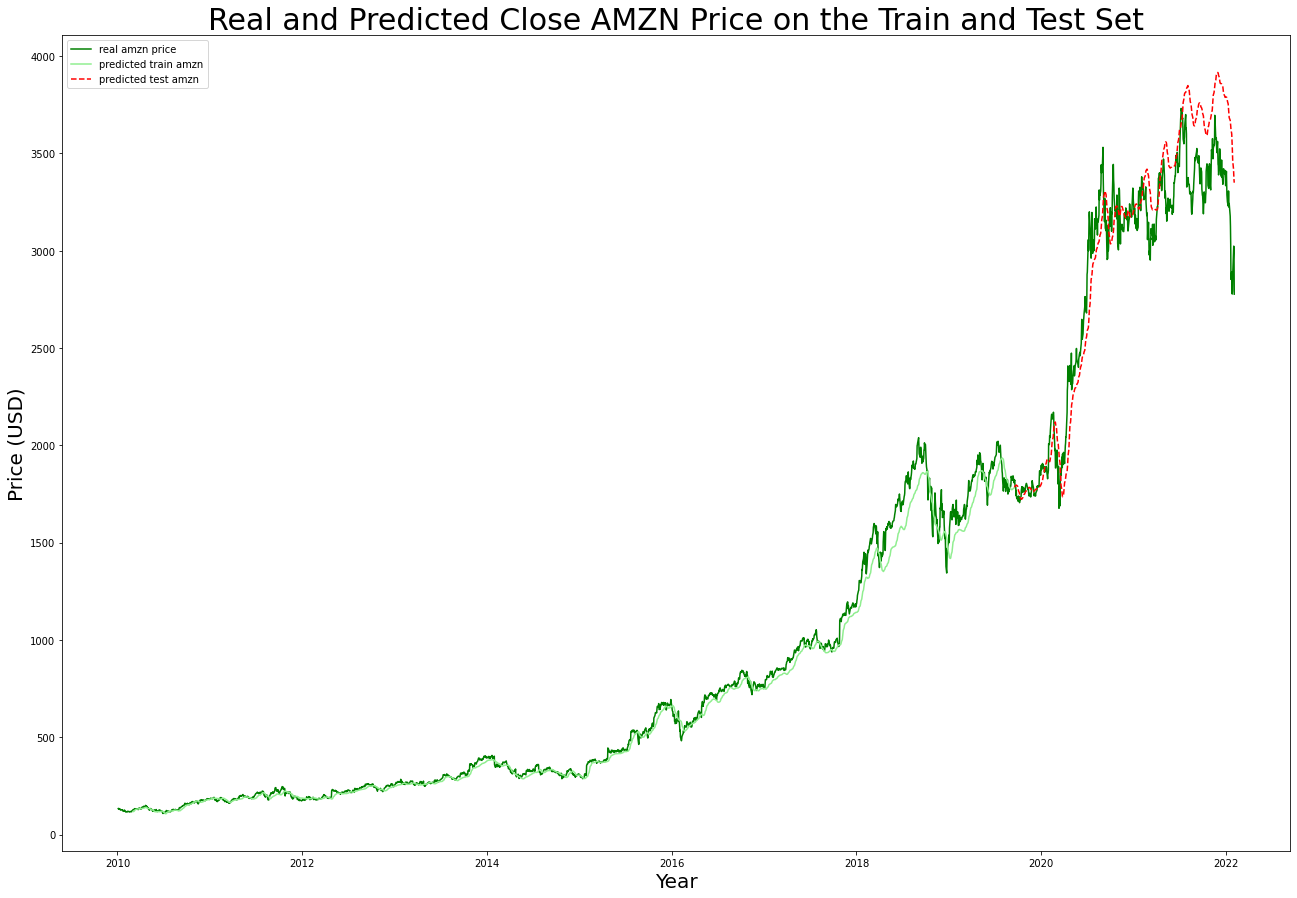

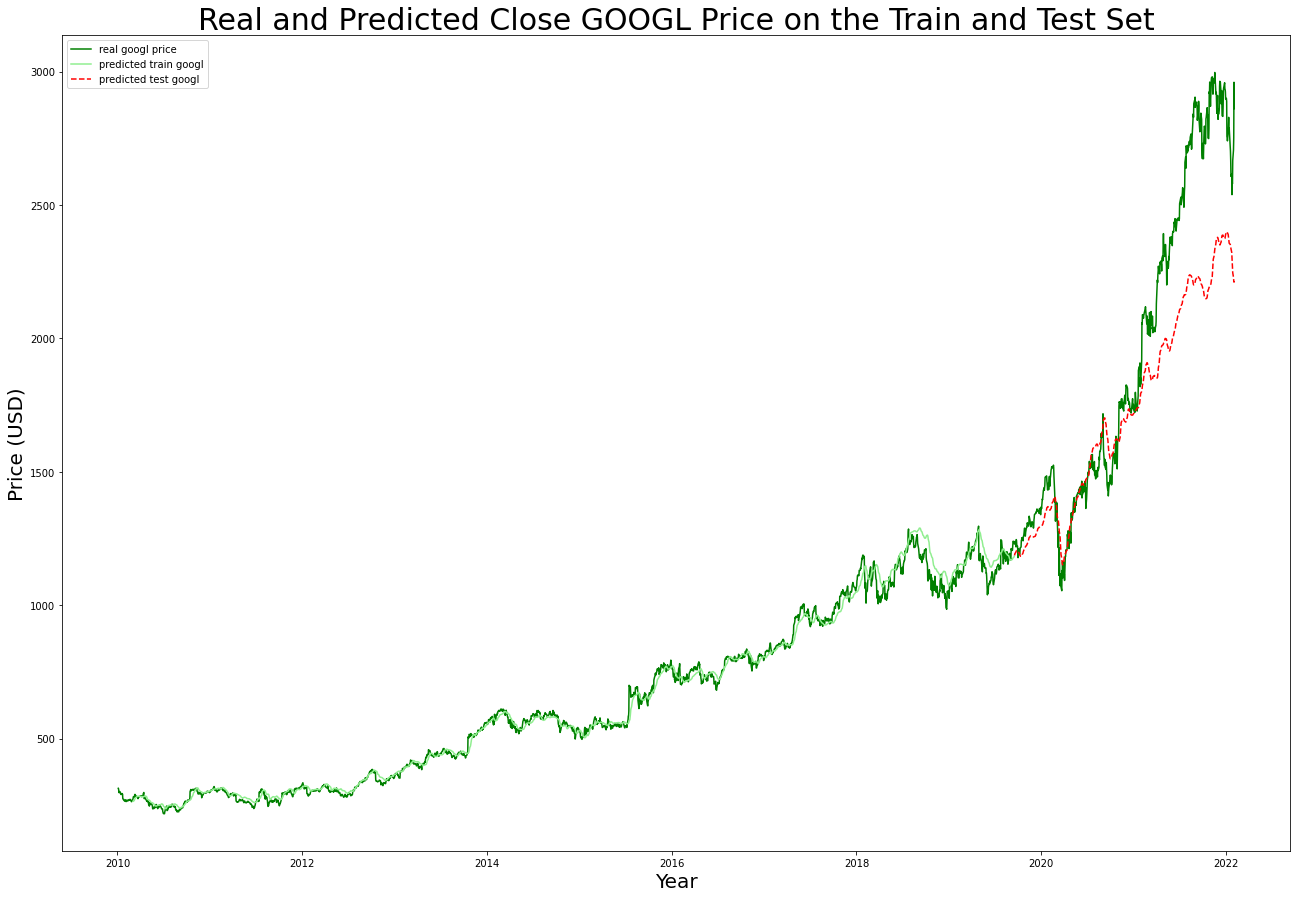

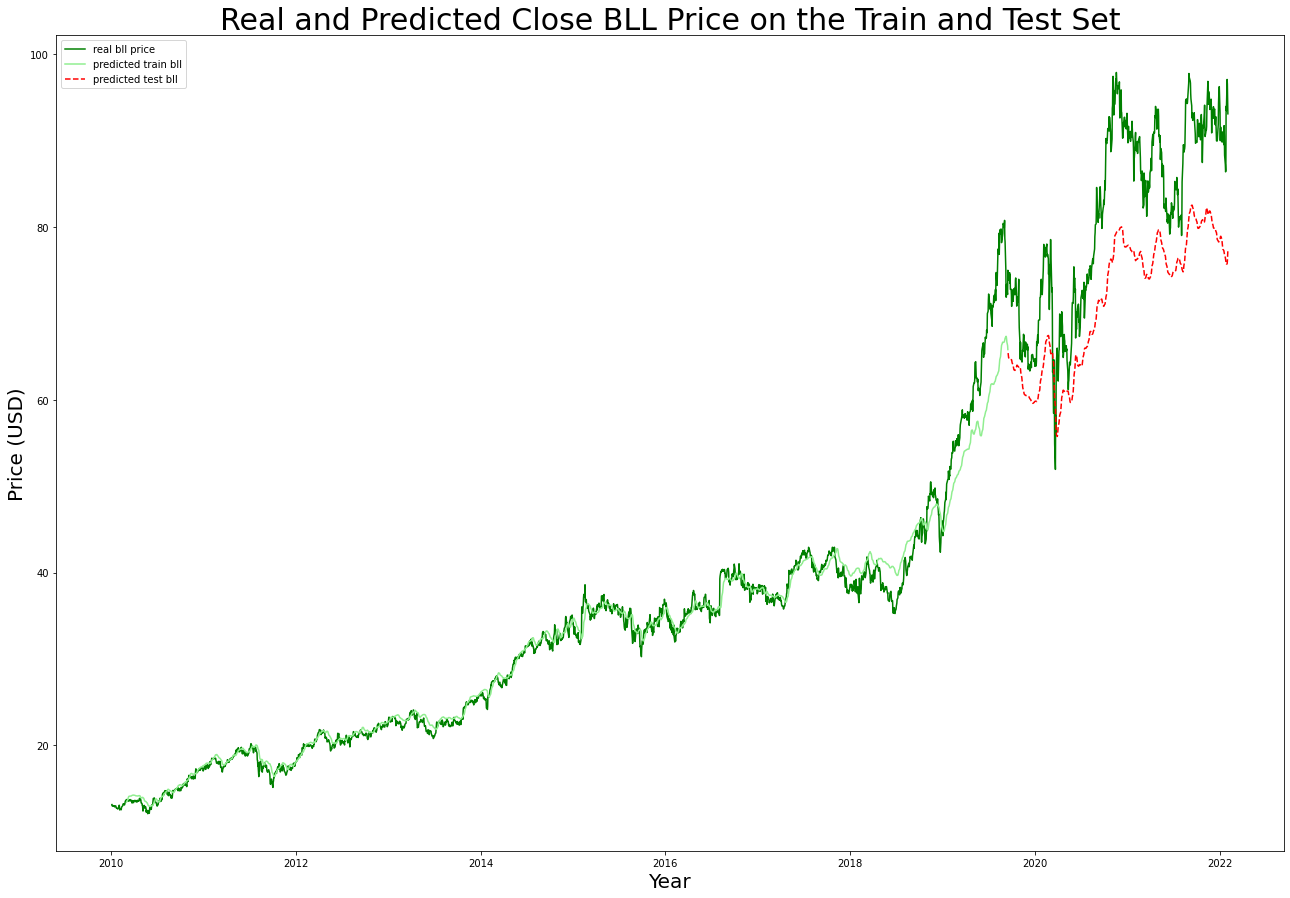

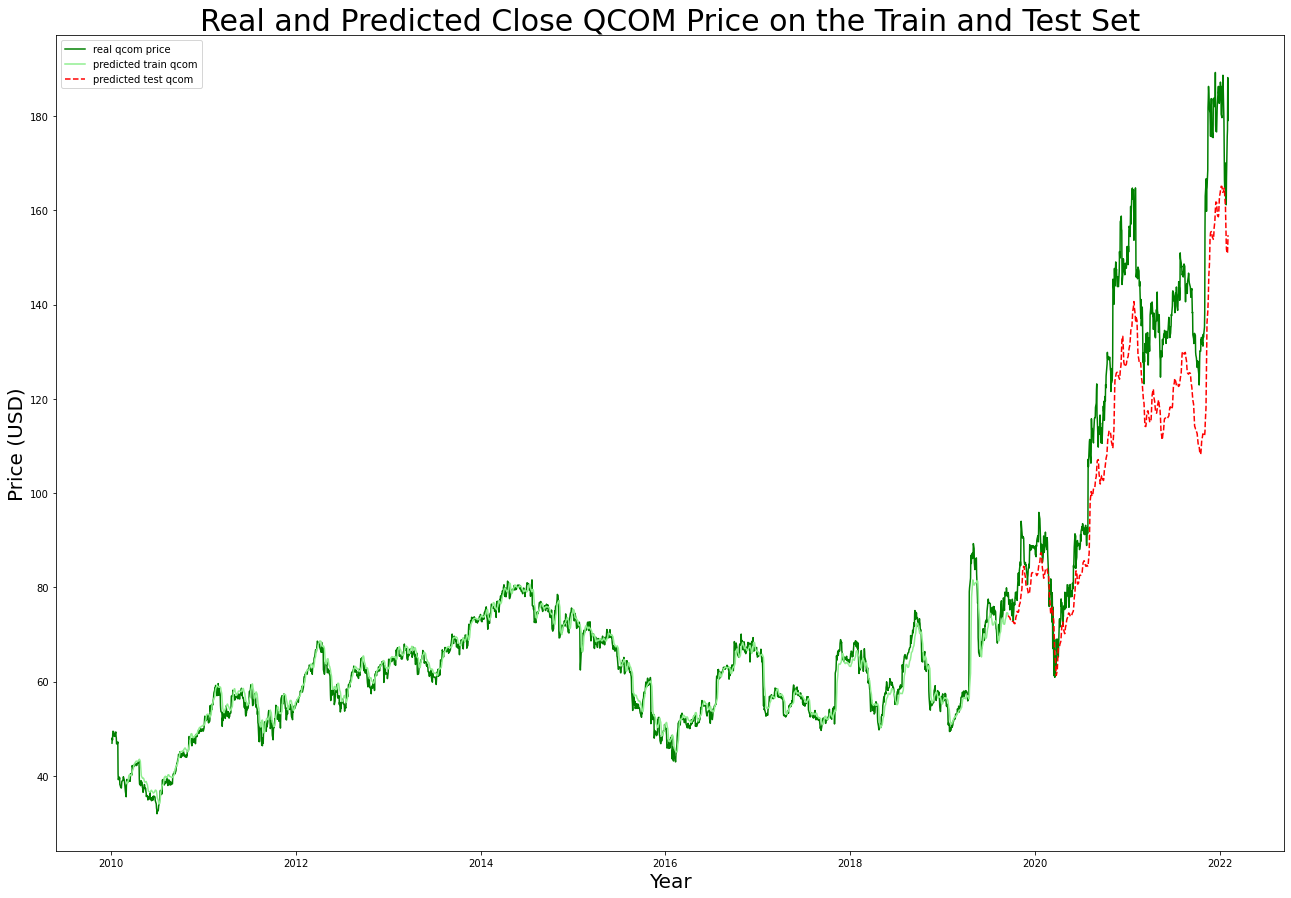

In [ ]:
# Prediction data of each company
y_train_amzn_pred, y_train_googl_pred, y_train_bll_pred, y_train_qcom_pred= model5.predict([X_train_amzn,X_train_googl,X_train_bll,X_train_qcom])
y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred= model5.predict([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom])
trainpreds_arr = np.hstack((y_train_amzn_pred, y_train_googl_pred, y_train_bll_pred, y_train_qcom_pred))
testpreds_arr = np.hstack((y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred))
y_train_pred = y_normaliser.inverse_transform(trainpreds_arr)
y_test_pred = y_normaliser.inverse_transform(testpreds_arr)

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_amzn'], label='real amzn price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,amzn], label='predicted train amzn', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,amzn], label='predicted test amzn', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close AMZN Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_googl'], label='real googl price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,googl], label='predicted train googl', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,googl], label='predicted test googl', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close GOOGL Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_bll'], label='real bll price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,bll], label='predicted train bll', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,bll], label='predicted test bll', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close BLL Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_qcom'], label='real qcom price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,qcom], label='predicted train qcom', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,qcom], label='predicted test qcom', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close QCOM Price on the Train and Test Set', fontsize=30)
plt.show()

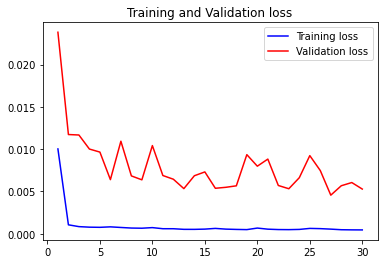

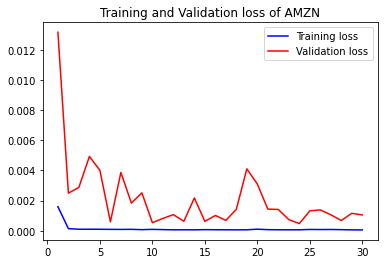

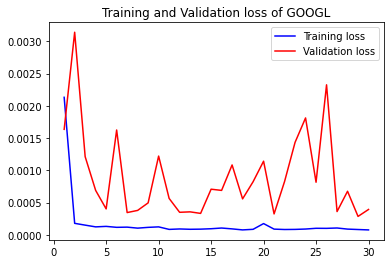

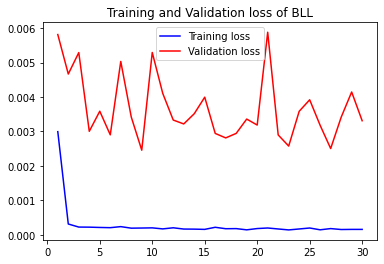

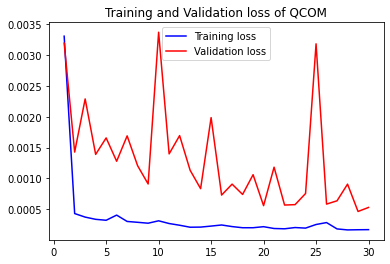

In [ ]:
# Visualization Loss
loss = history.history['loss']
val_loss = history.history['val_loss']
amzn_loss = history.history['amzn_final_loss']
val_amzn_loss = history.history['val_amzn_final_loss']
googl_loss = history.history['googl_final_loss']
val_googl_loss = history.history['val_googl_final_loss']
bll_loss = history.history['bll_final_loss']
val_bll_loss = history.history['val_bll_final_loss']
qcom_loss = history.history['qcom_final_loss']
val_qcom_loss = history.history['val_qcom_final_loss']
epochs = range(1, len(loss) + 1)
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

plt.plot(epochs, amzn_loss, 'b', label='Training loss')
plt.plot(epochs, val_amzn_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of AMZN')
plt.legend()
plt.show()

plt.plot(epochs, googl_loss, 'b', label='Training loss')
plt.plot(epochs, val_googl_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of GOOGL')
plt.legend()
plt.show()

plt.plot(epochs, bll_loss, 'b', label='Training loss')
plt.plot(epochs, val_bll_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of BLL')
plt.legend()
plt.show()

plt.plot(epochs, qcom_loss, 'b', label='Training loss')
plt.plot(epochs, val_qcom_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of QCOM')
plt.legend()
plt.show()

In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of AMZN Price 

# Calculating MAE performance metrics
mae_amzn_train = mean_absolute_error(unscaled_y_train_amzn, y_train_pred[:,amzn])

# Calculating Test Data MAE
mae_amzn_test = mean_absolute_error(unscaled_y_test_amzn, y_test_pred[:,amzn])

# Calculating MSE performance metrics
mse_amzn_train = mean_squared_error(unscaled_y_train_amzn, y_train_pred[:,amzn])

# Calculating Test Data MSE
mse_amzn_test = mean_squared_error(unscaled_y_test_amzn, y_test_pred[:,amzn])

# Calculating RMSE performance metrics
rmse_amzn_train = math.sqrt(mean_squared_error(unscaled_y_train_amzn, y_train_pred[:,amzn]))

# Calculating Test Data RMSE
rmse_amzn_test = math.sqrt(mean_squared_error(unscaled_y_test_amzn, y_test_pred[:,amzn]))

# Calculating MAPE performance metrics
mape_amzn_train = np.mean(np.abs((unscaled_y_train_amzn - y_train_pred[:,amzn])/unscaled_y_train_amzn))*100

# Calculating Test Data MAPE
mape_amzn_test = np.mean(np.abs((unscaled_y_test_amzn - y_test_pred[:,amzn])/unscaled_y_test_amzn))*100

print('Evaluation of AMZN price','\nMAE Train:', mae_amzn_train, '\nMAE Test:', mae_amzn_test,
      '\nMSE Train:', mse_amzn_train, '\nMSE Test:', mse_amzn_test,
      '\nRMSE Train1:', rmse_amzn_train, '\nRMSE Test1:', rmse_amzn_test,
      '\nMAPE Train:', mape_amzn_train, '\nMAPE Test:', mape_amzn_test)

Evaluation of AMZN price 
MAE Train: 34.094652859310386 
MAE Test: 180.40223731931155 
MSE Train: 3207.5285480771417 
MSE Test: 55657.33237590949 
RMSE Train1: 56.635046994569905 
RMSE Test1: 235.9180628436693 
MAPE Train: 4.640253939379861 
MAPE Test: 6.080520887800327


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of GOOGL Price 

# Calculating MAE performance metrics
mae_googl_train = mean_absolute_error(unscaled_y_train_googl, y_train_pred[:,googl])

# Calculating Test Data MAE
mae_googl_test = mean_absolute_error(unscaled_y_test_googl, y_test_pred[:,googl])

# Calculating MSE performance metrics
mse_googl_train = mean_squared_error(unscaled_y_train_googl, y_train_pred[:,googl])

# Calculating Test Data MSE
mse_googl_test = mean_squared_error(unscaled_y_test_googl, y_test_pred[:,googl])

# Calculating RMSE performance metrics
rmse_googl_train = math.sqrt(mean_squared_error(unscaled_y_train_googl, y_train_pred[:,googl]))

# Calculating Test Data RMSE
rmse_googl_test = math.sqrt(mean_squared_error(unscaled_y_test_googl, y_test_pred[:,googl]))

# Calculating MAPE performance metrics
mape_googl_train = np.mean(np.abs((unscaled_y_train_googl - y_train_pred[:,googl])/unscaled_y_train_googl))*100

# Calculating Test Data MAPE
mape_googl_test = np.mean(np.abs((unscaled_y_test_googl - y_test_pred[:,googl])/unscaled_y_test_googl))*100

print('Evaluation of GOOGL price','\nMAE Train:', mae_googl_train, '\nMAE Test:', mae_googl_test,
      '\nMSE Train:', mse_googl_train, '\nMSE Test:', mse_googl_test,
      '\nRMSE Train1:', rmse_googl_train, '\nRMSE Test1:', rmse_googl_test,
      '\nMAPE Train:', mape_googl_train, '\nMAPE Test:', mape_googl_test)

Evaluation of GOOGL price 
MAE Train: 19.42861009487449 
MAE Test: 220.26640271585117 
MSE Train: 869.1806006623973 
MSE Test: 95680.25366034928 
RMSE Train1: 29.481869015759454 
RMSE Test1: 309.32224889320406 
MAPE Train: 3.013844817018159 
MAPE Test: 9.4400299513896


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of BLL Price 

# Calculating MAE performance metrics
mae_bll_train = mean_absolute_error(unscaled_y_train_bll, y_train_pred[:,bll])

# Calculating Test Data MAE
mae_bll_test = mean_absolute_error(unscaled_y_test_bll, y_test_pred[:,bll])

# Calculating MSE performance metrics
mse_bll_train = mean_squared_error(unscaled_y_train_bll, y_train_pred[:,bll])

# Calculating Test Data MSE
mse_bll_test = mean_squared_error(unscaled_y_test_bll, y_test_pred[:,bll])

# Calculating RMSE performance metrics
rmse_bll_train = math.sqrt(mean_squared_error(unscaled_y_train_bll, y_train_pred[:,bll]))

# Calculating Test Data RMSE
rmse_bll_test = math.sqrt(mean_squared_error(unscaled_y_test_bll, y_test_pred[:,bll]))

# Calculating MAPE performance metrics
mape_bll_train = np.mean(np.abs((unscaled_y_train_bll - y_train_pred[:,bll])/unscaled_y_train_bll))*100

# Calculating Test Data MAPE
mape_bll_test = np.mean(np.abs((unscaled_y_test_bll - y_test_pred[:,bll])/unscaled_y_test_bll))*100

print('Evaluation of BLL price','\nMAE Train:', mae_bll_train, '\nMAE Test:', mae_bll_test,
      '\nMSE Train:', mse_bll_train, '\nMSE Test:', mse_bll_test,
      '\nRMSE Train1:', rmse_bll_train, '\nRMSE Test1:', rmse_bll_test,
      '\nMAPE Train:', mape_bll_train, '\nMAPE Test:', mape_bll_test)

Evaluation of BLL price 
MAE Train: 1.1997539482164323 
MAE Test: 9.95657475577813 
MSE Train: 5.352928669638357 
MSE Test: 115.3375487233474 
RMSE Train1: 2.3136397017769115 
RMSE Test1: 10.739532053276223 
MAPE Train: 3.1452809383655698 
MAPE Test: 11.882340789932533


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of QCOM Price 

# Calculating MAE performance metrics
mae_qcom_train = mean_absolute_error(unscaled_y_train_qcom, y_train_pred[:,qcom])

# Calculating Test Data MAE
mae_qcom_test = mean_absolute_error(unscaled_y_test_qcom, y_test_pred[:,qcom])

# Calculating MSE performance metrics
mse_qcom_train = mean_squared_error(unscaled_y_train_qcom, y_train_pred[:,qcom])

# Calculating Test Data MSE
mse_qcom_test = mean_squared_error(unscaled_y_test_qcom, y_test_pred[:,qcom])

# Calculating RMSE performance metrics
rmse_qcom_train = math.sqrt(mean_squared_error(unscaled_y_train_qcom, y_train_pred[:,qcom]))

# Calculating Test Data RMSE
rmse_qcom_test = math.sqrt(mean_squared_error(unscaled_y_test_qcom, y_test_pred[:,qcom]))

# Calculating MAPE performance metrics
mape_qcom_train = np.mean(np.abs((unscaled_y_train_qcom - y_train_pred[:,qcom])/unscaled_y_train_qcom))*100

# Calculating Test Data MAPE
mape_qcom_test = np.mean(np.abs((unscaled_y_test_qcom - y_test_pred[:,qcom])/unscaled_y_test_qcom))*100

print('Evaluation of QCOM price','\nMAE Train:', mae_qcom_train, '\nMAE Test:', mae_qcom_test,
      '\nMSE Train:', mse_qcom_train, '\nMSE Test:', mse_qcom_test,
      '\nRMSE Train1:', rmse_qcom_train, '\nRMSE Test1:', rmse_qcom_test,
      '\nMAPE Train:', mape_qcom_train, '\nMAPE Test:', mape_qcom_test)

Evaluation of QCOM price 
MAE Train: 1.4522053341145225 
MAE Test: 13.898809836033776 
MSE Train: 4.906460214550578 
MSE Test: 265.14764379351146 
RMSE Train1: 2.215053095198979 
RMSE Test1: 16.28335480770199 
MAPE Train: 2.4456397533309104 
MAPE Test: 10.625983209970158


In [ ]:
# Save data to excel
df_pred_test_norm = pd.DataFrame(data=testpreds_arr)
df_pred_train_norm = pd.DataFrame(data=trainpreds_arr)
df_pred_test = pd.DataFrame(data=y_test_pred)
df_pred_train = pd.DataFrame(data=y_train_pred)

file_name43 = 'TestPredNormDataLstm5.xlsx'
file_name44 = 'TrainPredNormDataLstm5.xlsx'
file_name45 = 'TestPredDataLstm5.xlsx'
file_name46 = 'TrainPredDataLstm5.xlsx'

df_pred_test_norm.to_excel(file_name43)
df_pred_train_norm.to_excel(file_name44)
df_pred_test.to_excel(file_name45)
df_pred_train.to_excel(file_name46)

# **Model4**

In [ ]:
input_amzn = Input(shape=(num_days_used, num_features_amzn), name = 'input_amzn')
input_googl = Input(shape=(num_days_used, num_features_googl), name = 'input_googl')
input_bll = Input(shape=(num_days_used, num_features_bll), name = 'input_bll')
input_qcom = Input(shape=(num_days_used, num_features_qcom), name = 'input_qcom')

x1 = LSTM(160, return_sequences=True, name='LSTM1_amzn')(input_amzn)
x1 = Dropout(0.5)(x1)
x1 = LSTM(160, return_sequences=True, name='LSTM2_amzn')(x1)
x1 = Dropout(0.5)(x1)

x2 = LSTM(160, return_sequences=True, name='LSTM1_googl')(input_googl)
x2 = Dropout(0.5)(x2)
x2 = LSTM(160, return_sequences=True, name='LSTM2_googl')(x2)
x2 = Dropout(0.5)(x2)

x3 = LSTM(160, return_sequences=True, name='LSTM1_bll')(input_bll)
x3 = Dropout(0.5)(x3)
x3 = LSTM(160, return_sequences=True, name='LSTM2_bll')(x3)
x3 = Dropout(0.5)(x3)

x4 = LSTM(160, return_sequences=True, name='LSTM1_qcom')(input_qcom)
x4 = Dropout(0.5)(x4)
x4 = LSTM(160, return_sequences=True, name='LSTM2_qcom')(x4)
x4 = Dropout(0.5)(x4)

conc = concatenate([x1,x2,x3,x4])
conc = LSTM(160, return_sequences=True, name='LSTM_conc1')(conc)
conc = LSTM(160, return_sequences=True, name='LSTM_conc2')(conc)

output1 = LSTM(160, name='amzn_0')(conc)
output1 = Dense(1, name='amzn_final')(output1)

output2 = LSTM(160, name='googl_0')(conc)
output2 = Dense(1, name='googl_final')(output2)

output3 = LSTM(160, name='bll_0')(conc)
output3 = Dense(1, name='bll_final')(output3)

output4 = LSTM(160, name='qcom_0')(conc)
output4 = Dense(1, name='qcom_final')(output4)

model6 = Model(inputs = [input_amzn, input_googl, input_bll, input_qcom], outputs = [output1, output2, output3, output4])

adam = Adam(learning_rate=0.001)

model6.compile(optimizer=adam, loss='mse')
model6.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_amzn (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                                  
 input_googl (InputLayer)       [(None, 40, 1)]      0           []                               
                                                                                                  
 input_bll (InputLayer)         [(None, 40, 1)]      0           []                               
                                                                                                  
 input_qcom (InputLayer)        [(None, 40, 1)]      0           []                               
                                                                                            

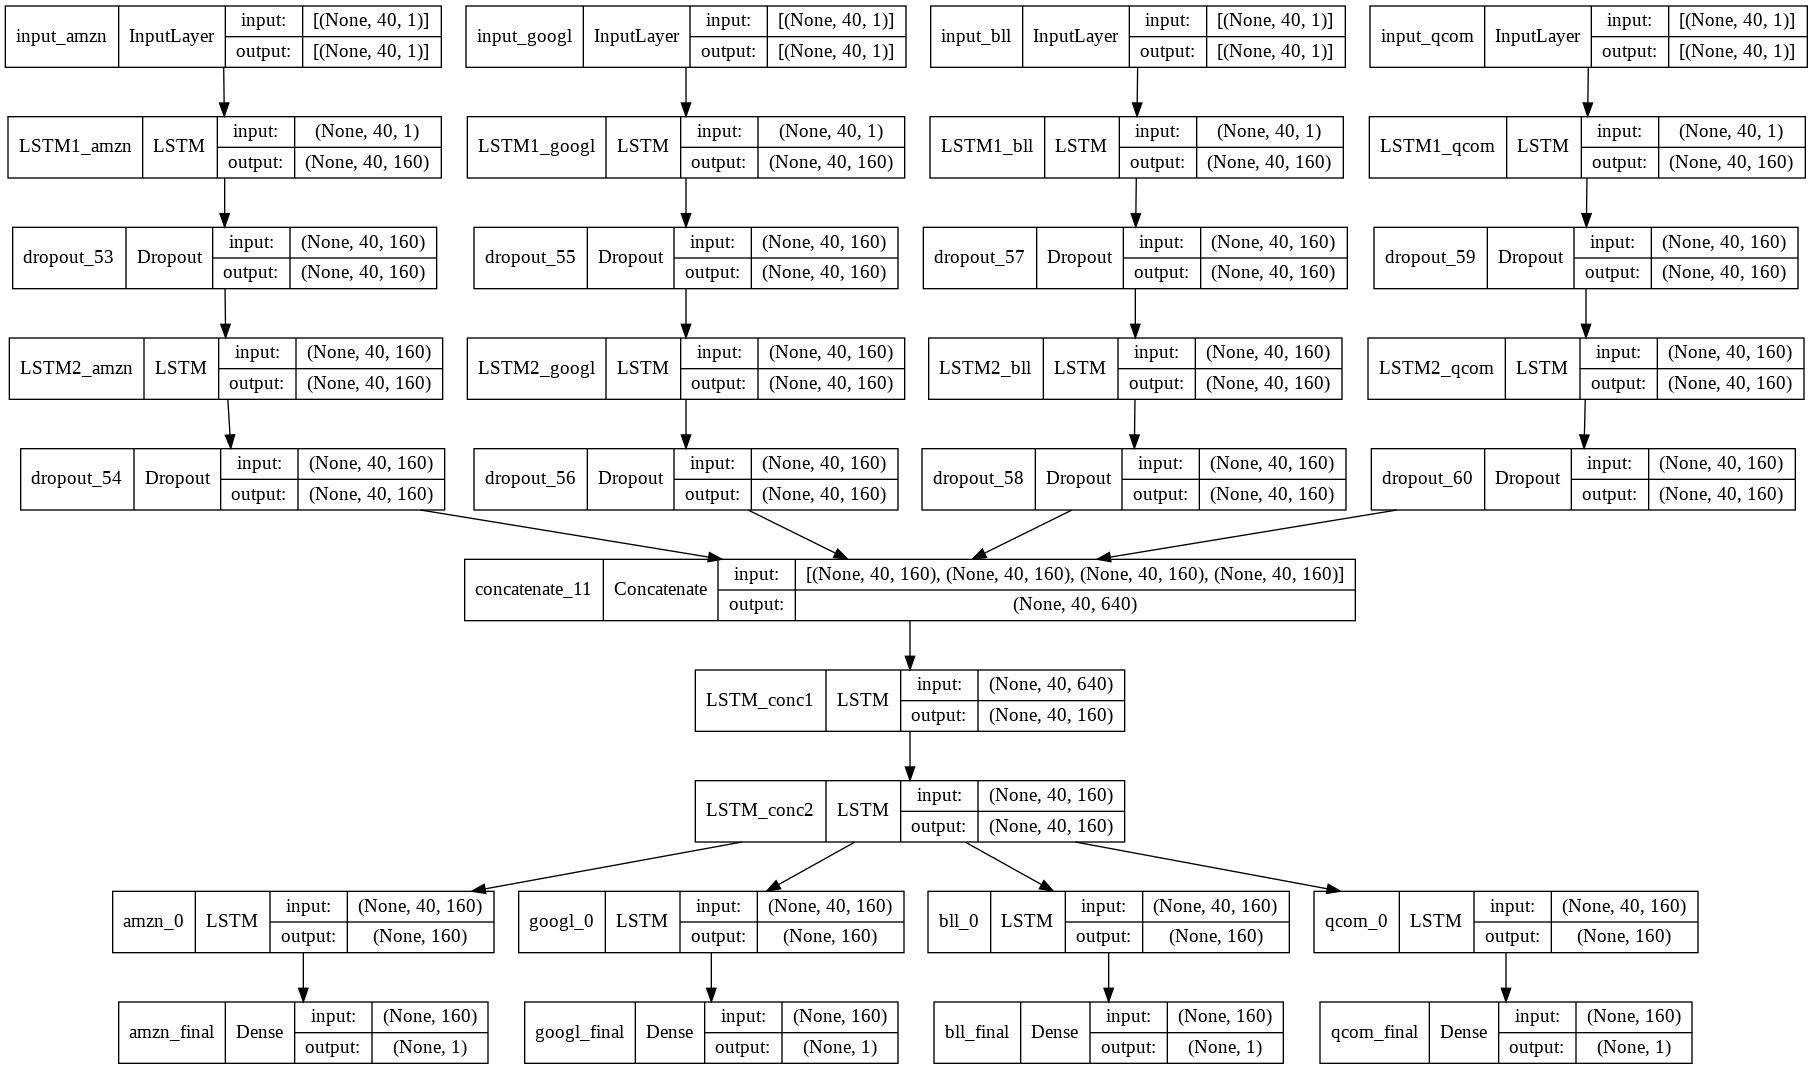

In [ ]:
# Displaying the structure of the final model
plot_model(model6, show_shapes=True)

In [ ]:
# Fitting Model
history = model6.fit(x=[X_train_amzn,X_train_googl,X_train_bll,X_train_qcom], y=[y_train_amzn,y_train_googl,y_train_bll,y_train_qcom], batch_size=32, epochs=30, validation_split=0.2)
evaluation = model6.evaluate([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom], [y_test_amzn,y_test_googl,y_test_bll,y_test_qcom])
print(evaluation)

Epoch 1/30
61/61 [==============================] - 110s 1s/step - loss: 0.0076 - amzn_final_loss: 0.0012 - googl_final_loss: 0.0017 - bll_final_loss: 0.0023 - qcom_final_loss: 0.0024 - val_loss: 0.0252 - val_amzn_final_loss: 0.0134 - val_googl_final_loss: 0.0017 - val_bll_final_loss: 0.0071 - val_qcom_final_loss: 0.0031
Epoch 2/30
61/61 [==============================] - 76s 1s/step - loss: 9.3646e-04 - amzn_final_loss: 1.1381e-04 - googl_final_loss: 1.6691e-04 - bll_final_loss: 2.5108e-04 - qcom_final_loss: 4.0466e-04 - val_loss: 0.0232 - val_amzn_final_loss: 0.0049 - val_googl_final_loss: 0.0025 - val_bll_final_loss: 0.0133 - val_qcom_final_loss: 0.0026
Epoch 3/30
61/61 [==============================] - 76s 1s/step - loss: 9.1575e-04 - amzn_final_loss: 1.0919e-04 - googl_final_loss: 1.5002e-04 - bll_final_loss: 2.3683e-04 - qcom_final_loss: 4.1971e-04 - val_loss: 0.0193 - val_amzn_final_loss: 0.0032 - val_googl_final_loss: 7.8237e-04 - val_bll_final_loss: 0.0135 - val_qcom_final_lo

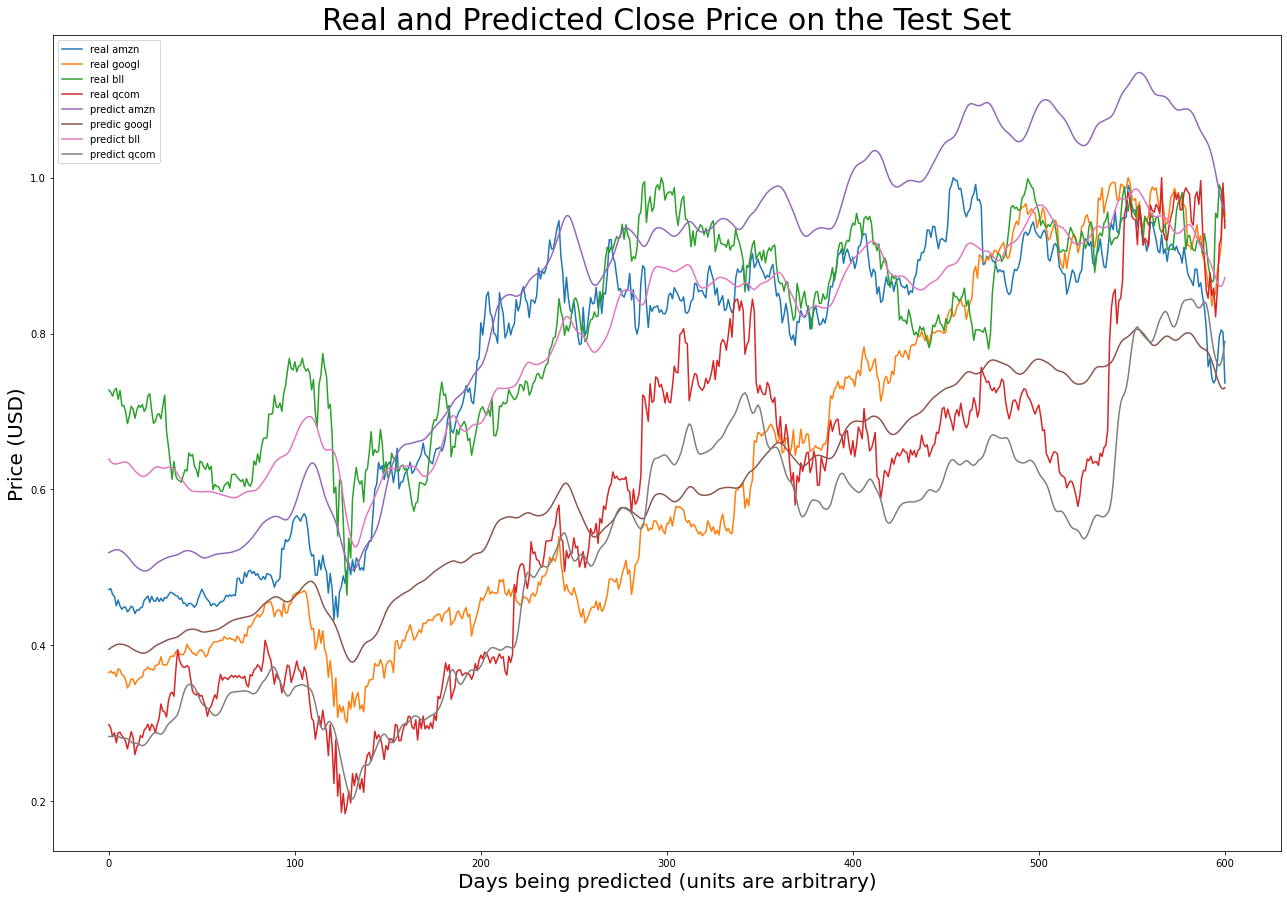

In [ ]:
# prediction data test
y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred= model6.predict([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom])
preds_arr = np.hstack((y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred))
y_test_pred = preds_arr

amzn=0
googl=1
bll=2
qcom=3

plt.gcf().set_size_inches(22, 15, forward=True)
currentFig.set_facecolor('white')

real = plt.plot(y_test[:,:], label='real')
pred = plt.plot(y_test_pred[:,:], label='predicted')

plt.legend(['real amzn','real googl','real bll','real qcom','predict amzn','predic googl','predict bll','predict qcom'])
plt.xlabel('Days being predicted (units are arbitrary)', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close Price on the Test Set', fontsize=30)

plt.show()

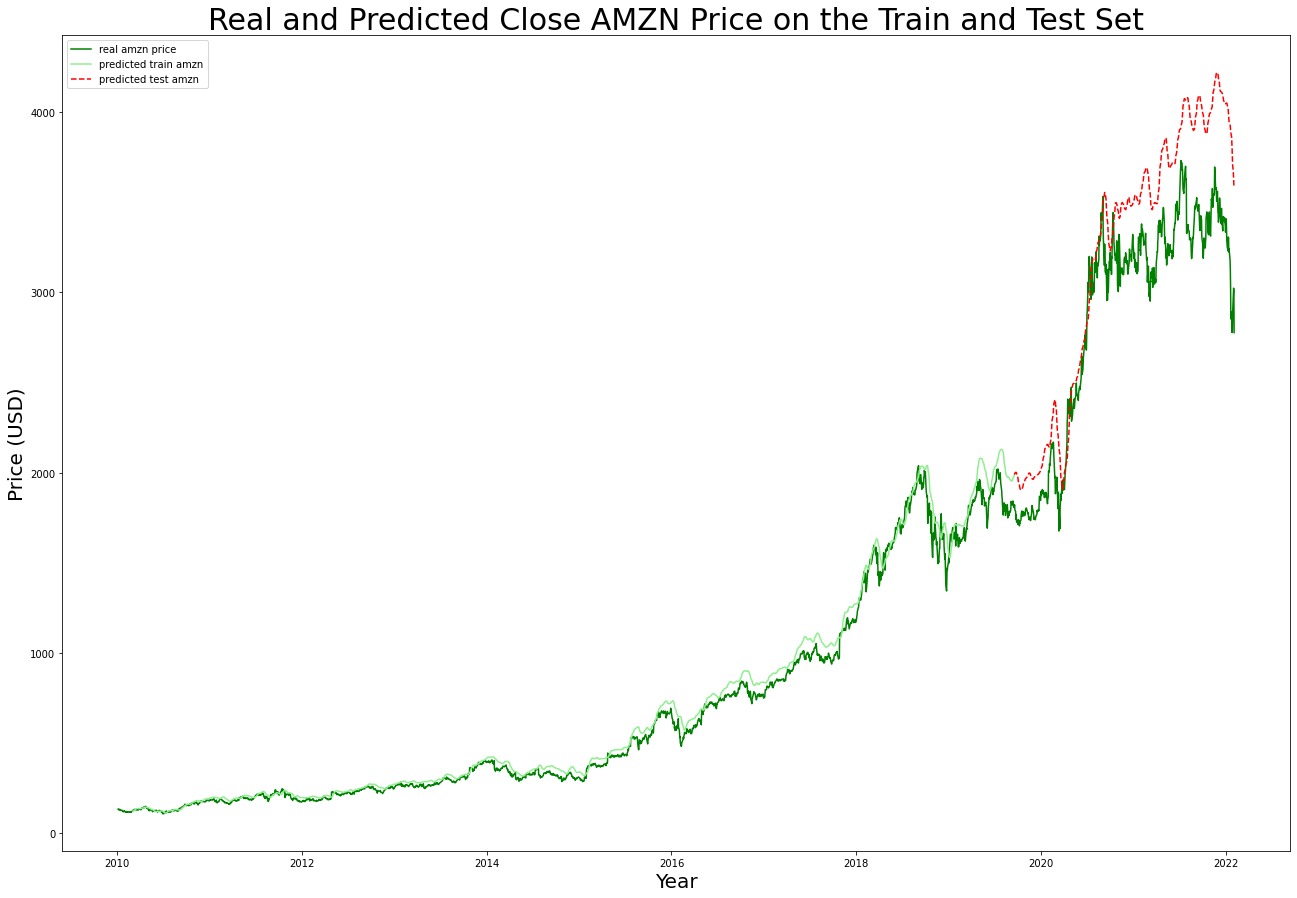

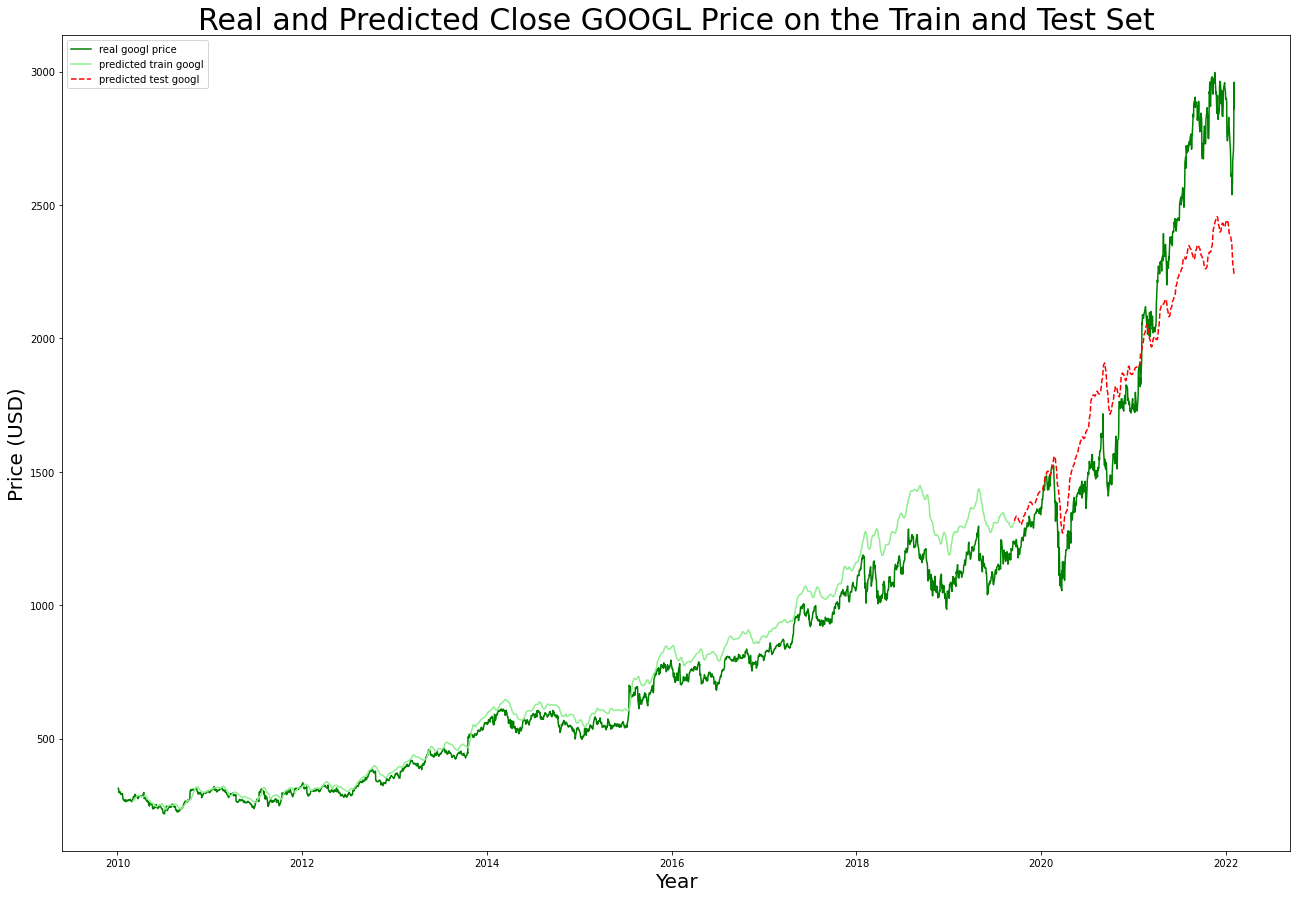

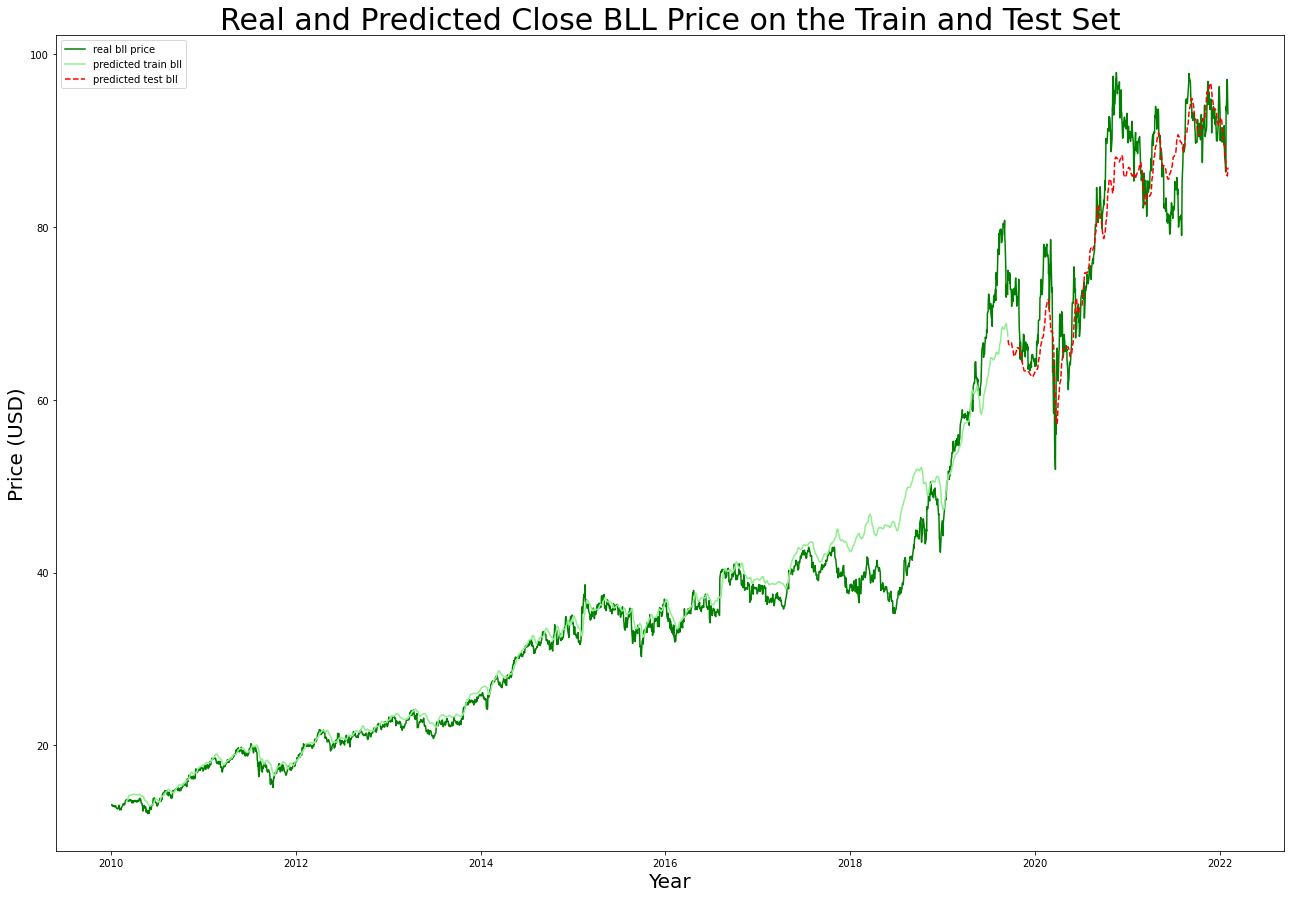

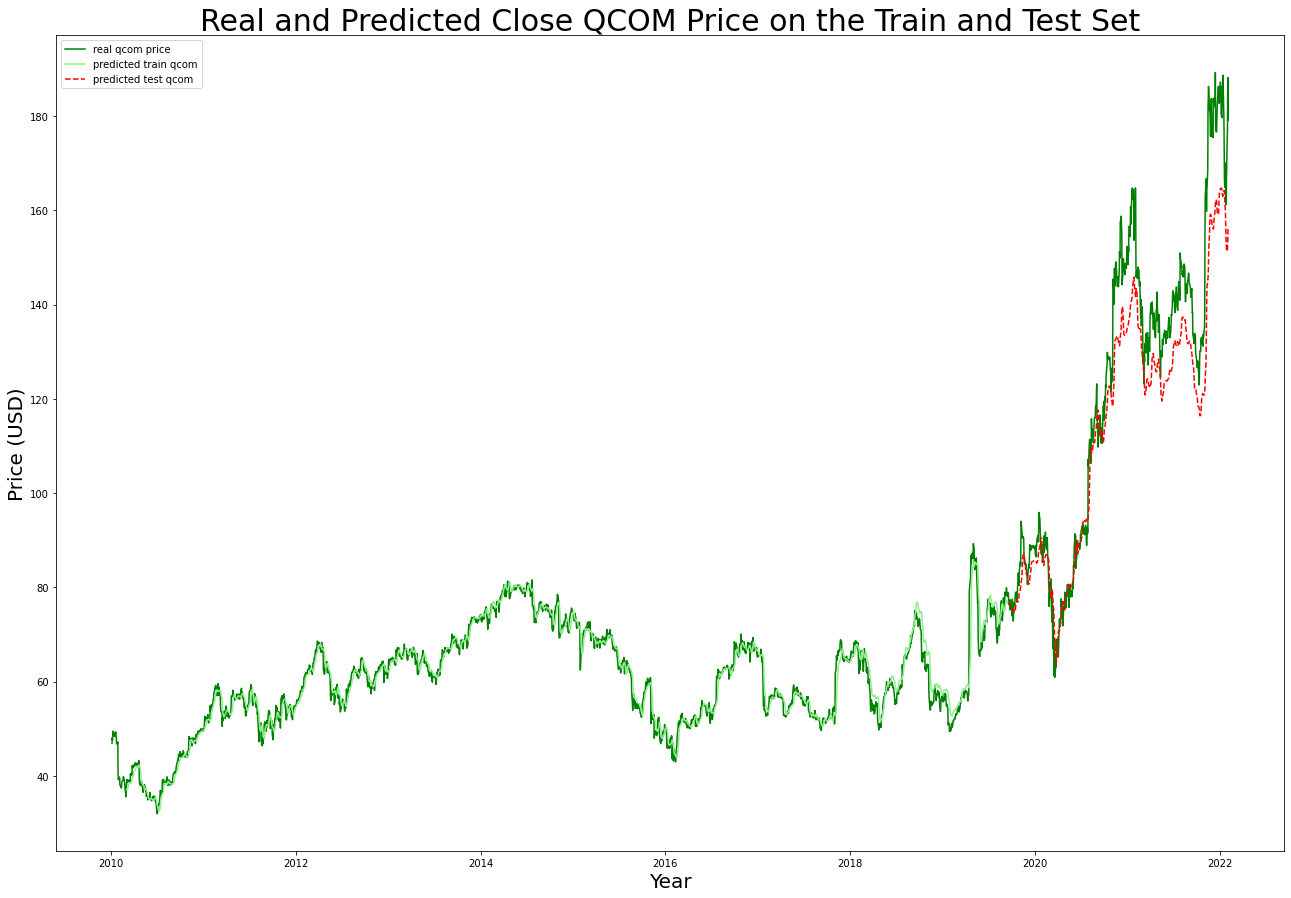

In [ ]:
# Prediction data of each company
y_train_amzn_pred, y_train_googl_pred, y_train_bll_pred, y_train_qcom_pred= model6.predict([X_train_amzn,X_train_googl,X_train_bll,X_train_qcom])
y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred= model6.predict([X_test_amzn,X_test_googl,X_test_bll,X_test_qcom])
trainpreds_arr = np.hstack((y_train_amzn_pred, y_train_googl_pred, y_train_bll_pred, y_train_qcom_pred))
testpreds_arr = np.hstack((y_test_amzn_pred, y_test_googl_pred, y_test_bll_pred, y_test_qcom_pred))
y_train_pred = y_normaliser.inverse_transform(trainpreds_arr)
y_test_pred = y_normaliser.inverse_transform(testpreds_arr)

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_amzn'], label='real amzn price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,amzn], label='predicted train amzn', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,amzn], label='predicted test amzn', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close AMZN Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_googl'], label='real googl price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,googl], label='predicted train googl', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,googl], label='predicted test googl', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close GOOGL Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_bll'], label='real bll price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,bll], label='predicted train bll', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,bll], label='predicted test bll', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close BLL Price on the Train and Test Set', fontsize=30)
plt.show()

plt.gcf().set_size_inches(22, 15, forward=True)
# real values plotted
plt.plot(stock_df['Close_qcom'], label='real qcom price', color='g')

# predicted values plotted
plt.plot(dates_train, y_train_pred[:,qcom], label='predicted train qcom', color='lightgreen')
plt.plot(dates_test, y_test_pred[:,qcom], label='predicted test qcom', color='r', linestyle='dashed')

currentFig.set_facecolor('white')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.title('Real and Predicted Close QCOM Price on the Train and Test Set', fontsize=30)
plt.show()

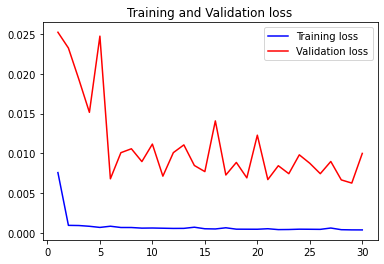

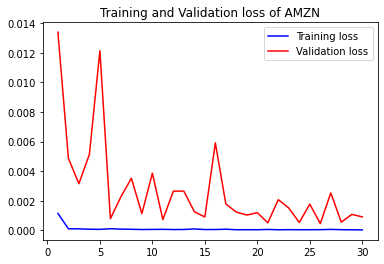

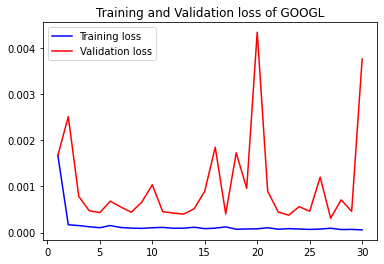

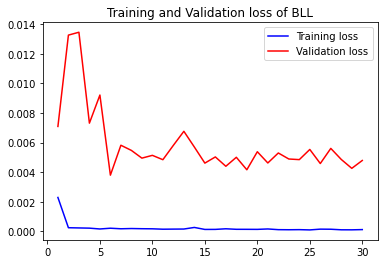

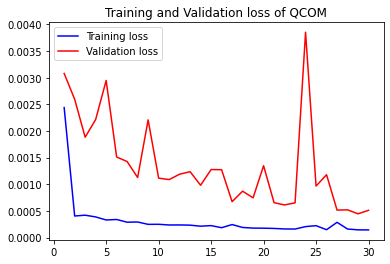

In [ ]:
# Visualization Loss
loss = history.history['loss']
val_loss = history.history['val_loss']
amzn_loss = history.history['amzn_final_loss']
val_amzn_loss = history.history['val_amzn_final_loss']
googl_loss = history.history['googl_final_loss']
val_googl_loss = history.history['val_googl_final_loss']
bll_loss = history.history['bll_final_loss']
val_bll_loss = history.history['val_bll_final_loss']
qcom_loss = history.history['qcom_final_loss']
val_qcom_loss = history.history['val_qcom_final_loss']
epochs = range(1, len(loss) + 1)
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

plt.plot(epochs, amzn_loss, 'b', label='Training loss')
plt.plot(epochs, val_amzn_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of AMZN')
plt.legend()
plt.show()

plt.plot(epochs, googl_loss, 'b', label='Training loss')
plt.plot(epochs, val_googl_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of GOOGL')
plt.legend()
plt.show()

plt.plot(epochs, bll_loss, 'b', label='Training loss')
plt.plot(epochs, val_bll_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of BLL')
plt.legend()
plt.show()

plt.plot(epochs, qcom_loss, 'b', label='Training loss')
plt.plot(epochs, val_qcom_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss of QCOM')
plt.legend()
plt.show()

In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of AMZN Price 

# Calculating MAE performance metrics
mae_amzn_train = mean_absolute_error(unscaled_y_train_amzn, y_train_pred[:,amzn])

# Calculating Test Data MAE
mae_amzn_test = mean_absolute_error(unscaled_y_test_amzn, y_test_pred[:,amzn])

# Calculating MSE performance metrics
mse_amzn_train = mean_squared_error(unscaled_y_train_amzn, y_train_pred[:,amzn])

# Calculating Test Data MSE
mse_amzn_test = mean_squared_error(unscaled_y_test_amzn, y_test_pred[:,amzn])

# Calculating RMSE performance metrics
rmse_amzn_train = math.sqrt(mean_squared_error(unscaled_y_train_amzn, y_train_pred[:,amzn]))

# Calculating Test Data RMSE
rmse_amzn_test = math.sqrt(mean_squared_error(unscaled_y_test_amzn, y_test_pred[:,amzn]))

# Calculating MAPE performance metrics
mape_amzn_train = np.mean(np.abs((unscaled_y_train_amzn - y_train_pred[:,amzn])/unscaled_y_train_amzn))*100

# Calculating Test Data MAPE
mape_amzn_test = np.mean(np.abs((unscaled_y_test_amzn - y_test_pred[:,amzn])/unscaled_y_test_amzn))*100

print('Evaluation of AMZN price','\nMAE Train:', mae_amzn_train, '\nMAE Test:', mae_amzn_test,
      '\nMSE Train:', mse_amzn_train, '\nMSE Test:', mse_amzn_test,
      '\nRMSE Train1:', rmse_amzn_train, '\nRMSE Test1:', rmse_amzn_test,
      '\nMAPE Train:', mape_amzn_train, '\nMAPE Test:', mape_amzn_test)

Evaluation of AMZN price 
MAE Train: 41.264496567147106 
MAE Test: 340.4666486032394 
MSE Train: 3714.0445216416333 
MSE Test: 165171.32517642115 
RMSE Train1: 60.94296121490679 
RMSE Test1: 406.4127522315474 
MAPE Train: 6.857476968287194 
MAPE Test: 11.662093482937221


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of GOOGL Price 

# Calculating MAE performance metrics
mae_googl_train = mean_absolute_error(unscaled_y_train_googl, y_train_pred[:,googl])

# Calculating Test Data MAE
mae_googl_test = mean_absolute_error(unscaled_y_test_googl, y_test_pred[:,googl])

# Calculating MSE performance metrics
mse_googl_train = mean_squared_error(unscaled_y_train_googl, y_train_pred[:,googl])

# Calculating Test Data MSE
mse_googl_test = mean_squared_error(unscaled_y_test_googl, y_test_pred[:,googl])

# Calculating RMSE performance metrics
rmse_googl_train = math.sqrt(mean_squared_error(unscaled_y_train_googl, y_train_pred[:,googl]))

# Calculating Test Data RMSE
rmse_googl_test = math.sqrt(mean_squared_error(unscaled_y_test_googl, y_test_pred[:,googl]))

# Calculating MAPE performance metrics
mape_googl_train = np.mean(np.abs((unscaled_y_train_googl - y_train_pred[:,googl])/unscaled_y_train_googl))*100

# Calculating Test Data MAPE
mape_googl_test = np.mean(np.abs((unscaled_y_test_googl - y_test_pred[:,googl])/unscaled_y_test_googl))*100

print('Evaluation of GOOGL price','\nMAE Train:', mae_googl_train, '\nMAE Test:', mae_googl_test,
      '\nMSE Train:', mse_googl_train, '\nMSE Test:', mse_googl_test,
      '\nRMSE Train1:', rmse_googl_train, '\nRMSE Test1:', rmse_googl_test,
      '\nMAPE Train:', mape_googl_train, '\nMAPE Test:', mape_googl_test)

Evaluation of GOOGL price 
MAE Train: 62.39129393566066 
MAE Test: 222.6200704717398 
MSE Train: 7643.823312116764 
MSE Test: 75421.14971752134 
RMSE Train1: 87.4289615180048 
RMSE Test1: 274.6291130188519 
MAPE Train: 8.156191362182996 
MAPE Test: 11.029977735387979


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of BLL Price 

# Calculating MAE performance metrics
mae_bll_train = mean_absolute_error(unscaled_y_train_bll, y_train_pred[:,bll])

# Calculating Test Data MAE
mae_bll_test = mean_absolute_error(unscaled_y_test_bll, y_test_pred[:,bll])

# Calculating MSE performance metrics
mse_bll_train = mean_squared_error(unscaled_y_train_bll, y_train_pred[:,bll])

# Calculating Test Data MSE
mse_bll_test = mean_squared_error(unscaled_y_test_bll, y_test_pred[:,bll])

# Calculating RMSE performance metrics
rmse_bll_train = math.sqrt(mean_squared_error(unscaled_y_train_bll, y_train_pred[:,bll]))

# Calculating Test Data RMSE
rmse_bll_test = math.sqrt(mean_squared_error(unscaled_y_test_bll, y_test_pred[:,bll]))

# Calculating MAPE performance metrics
mape_bll_train = np.mean(np.abs((unscaled_y_train_bll - y_train_pred[:,bll])/unscaled_y_train_bll))*100

# Calculating Test Data MAPE
mape_bll_test = np.mean(np.abs((unscaled_y_test_bll - y_test_pred[:,bll])/unscaled_y_test_bll))*100

print('Evaluation of BLL price','\nMAE Train:', mae_bll_train, '\nMAE Test:', mae_bll_test,
      '\nMSE Train:', mse_bll_train, '\nMSE Test:', mse_bll_test,
      '\nRMSE Train1:', rmse_bll_train, '\nRMSE Test1:', rmse_bll_test,
      '\nMAPE Train:', mape_bll_train, '\nMAPE Test:', mape_bll_test)

Evaluation of BLL price 
MAE Train: 1.6110163802560846 
MAE Test: 3.543870675186944 
MSE Train: 7.8458376217360986 
MSE Test: 19.90376808630616 
RMSE Train1: 2.801042238477688 
RMSE Test1: 4.461363926682754 
MAPE Train: 4.462269817217977 
MAPE Test: 4.395013912339453


In [ ]:
#Evaluation MAE, MSE, RMSE, MAPE of QCOM Price 

# Calculating MAE performance metrics
mae_qcom_train = mean_absolute_error(unscaled_y_train_qcom, y_train_pred[:,qcom])

# Calculating Test Data MAE
mae_qcom_test = mean_absolute_error(unscaled_y_test_qcom, y_test_pred[:,qcom])

# Calculating MSE performance metrics
mse_qcom_train = mean_squared_error(unscaled_y_train_qcom, y_train_pred[:,qcom])

# Calculating Test Data MSE
mse_qcom_test = mean_squared_error(unscaled_y_test_qcom, y_test_pred[:,qcom])

# Calculating RMSE performance metrics
rmse_qcom_train = math.sqrt(mean_squared_error(unscaled_y_train_qcom, y_train_pred[:,qcom]))

# Calculating Test Data RMSE
rmse_qcom_test = math.sqrt(mean_squared_error(unscaled_y_test_qcom, y_test_pred[:,qcom]))

# Calculating MAPE performance metrics
mape_qcom_train = np.mean(np.abs((unscaled_y_train_qcom - y_train_pred[:,qcom])/unscaled_y_train_qcom))*100

# Calculating Test Data MAPE
mape_qcom_test = np.mean(np.abs((unscaled_y_test_qcom - y_test_pred[:,qcom])/unscaled_y_test_qcom))*100

print('Evaluation of QCOM price','\nMAE Train:', mae_qcom_train, '\nMAE Test:', mae_qcom_test,
      '\nMSE Train:', mse_qcom_train, '\nMSE Test:', mse_qcom_test,
      '\nRMSE Train1:', rmse_qcom_train, '\nRMSE Test1:', rmse_qcom_test,
      '\nMAPE Train:', mape_qcom_train, '\nMAPE Test:', mape_qcom_test)

Evaluation of QCOM price 
MAE Train: 1.3973063287564331 
MAE Test: 8.573231505078207 
MSE Train: 4.489149642780398 
MSE Test: 127.92519914586404 
RMSE Train1: 2.118761346348474 
RMSE Test1: 11.310402253937038 
MAPE Train: 2.3607925237916 
MAPE Test: 6.279780826290628


In [ ]:
# Save data to excel
df_pred_test_norm = pd.DataFrame(data=testpreds_arr)
df_pred_train_norm = pd.DataFrame(data=trainpreds_arr)
df_pred_test = pd.DataFrame(data=y_test_pred)
df_pred_train = pd.DataFrame(data=y_train_pred)

file_name47 = 'TestPredNormDataLstm6.xlsx'
file_name48 = 'TrainPredNormDataLstm6.xlsx'
file_name49 = 'TestPredDataLstm6.xlsx'
file_name50 = 'TrainPredDataLstm6.xlsx'

df_pred_test_norm.to_excel(file_name47)
df_pred_train_norm.to_excel(file_name48)
df_pred_test.to_excel(file_name49)
df_pred_train.to_excel(file_name50)

# **Accuracy MAPE (Mean Absolute Percentage Error), RMSPE (Roor Mean Square Percentage Error) and RMDPE (Root Mean Dimention Percentage Error) LSTM**

In [ ]:
# access data excel from drive
path_lstm = '/content/LSTM.xlsx'
df_lstm = pd.ExcelFile(path_lstm)

In [ ]:
# Read data excel
df0_lstm = pd.read_excel(path_lstm, 'Data Asli')
df3_lstm = pd.read_excel(path_lstm, 'Model3')
df4_lstm = pd.read_excel(path_lstm, 'Model4')
df5_lstm = pd.read_excel(path_lstm, 'Model5')
df6_lstm = pd.read_excel(path_lstm, 'Model6')

In [ ]:
# Drop unused data column
df0_lstm.drop(['Date'],axis=1,inplace=True)
df3_lstm.drop(['Date','Unnamed: 5'],axis=1,inplace=True)
df4_lstm.drop(['Date','Unnamed: 5'],axis=1,inplace=True)
df5_lstm.drop(['Date','Unnamed: 5'],axis=1,inplace=True)
df6_lstm.drop(['Date','Unnamed: 5'],axis=1,inplace=True)

In [ ]:
df0_lstm

AMZN        GOOGL        BLL        QCOM
0      133.899994   313.688690  13.122500   46.939999
1      134.690002   312.307312  12.975000   48.070000
2      132.250000   304.434448  13.000000   47.599998
3      130.000000   297.347351  12.970000   48.980000
4      133.520004   301.311310  13.017500   49.470001
...           ...          ...        ...         ...
3039  2879.560059  2667.020020  93.500000  166.809998
3040  2991.469971  2706.070068  97.099998  175.759995
3041  3023.870117  2752.879883  96.570000  177.130005
3042  3012.250000  2960.000000  94.459999  188.199997
3043  2776.909912  2861.800049  93.120003  179.100006

[3044 rows x 4 columns]

In [ ]:
# Get data test
unscaled_data_lstm = df0_lstm.to_numpy()[2443:][0:len(df0_lstm)-2443, :]
unscaled_df3_lstm = df3_lstm.to_numpy()[2403:][0:len(df3_lstm)-2403, :]
unscaled_df4_lstm = df4_lstm.to_numpy()[2403:][0:len(df4_lstm)-2403, :]
unscaled_df5_lstm = df5_lstm.to_numpy()[2403:][0:len(df5_lstm)-2403, :]
unscaled_df6_lstm = df6_lstm.to_numpy()[2403:][0:len(df6_lstm)-2403, :]

In [ ]:
unscaled_data_lstm

array([[1817.45996094, 1232.65002441,   74.51000214,   78.90000153],
       [1821.5       , 1238.75      ,   74.27999878,   78.23000336],
       [1794.16003418, 1229.83996582,   73.83999634,   76.44000244],
       ...,
       [3023.87011719, 2752.87988281,   96.56999969,  177.13000488],
       [3012.25      , 2960.        ,   94.45999908,  188.19999695],
       [2776.90991211, 2861.80004883,   93.12000275,  179.1000061 ]])

In [ ]:
unscaled_data_lstm.shape

(601, 4)

In [ ]:
amzn = 0
googl = 1
bll = 2
qcom = 3

# Calculate MAPE (Mean Absolute Percentage Error), RMSPE (Roor Mean Square Percentage Error) and RMDPE (Root Mean Dimention Percentage Error) for each company

#AMZN
# MAPE
mape_amzn_model3_lstm = np.mean(np.abs((unscaled_data_lstm[:,amzn] - unscaled_df3_lstm[:,amzn])/unscaled_data_lstm[:,amzn]))*100
accuracy_mape_amzn_model3_lstm = 100-mape_amzn_model3_lstm
mape_amzn_model4_lstm = np.mean(np.abs((unscaled_data_lstm[:,amzn] - unscaled_df4_lstm[:,amzn])/unscaled_data_lstm[:,amzn]))*100
accuracy_mape_amzn_model4_lstm = 100-mape_amzn_model4_lstm
mape_amzn_model5_lstm = np.mean(np.abs((unscaled_data_lstm[:,amzn] - unscaled_df5_lstm[:,amzn])/unscaled_data_lstm[:,amzn]))*100
accuracy_mape_amzn_model5_lstm = 100-mape_amzn_model5_lstm
mape_amzn_model6_lstm = np.mean(np.abs((unscaled_data_lstm[:,amzn] - unscaled_df6_lstm[:,amzn])/unscaled_data_lstm[:,amzn]))*100
accuracy_mape_amzn_model6_lstm = 100-mape_amzn_model6_lstm

amzn_model3_lstm = ((unscaled_df3_lstm[:,amzn] - unscaled_data_lstm[:,amzn])/unscaled_data_lstm[:,amzn])
amzn_model4_lstm = ((unscaled_df4_lstm[:,amzn] - unscaled_data_lstm[:,amzn])/unscaled_data_lstm[:,amzn])
amzn_model5_lstm = ((unscaled_df5_lstm[:,amzn] - unscaled_data_lstm[:,amzn])/unscaled_data_lstm[:,amzn])
amzn_model6_lstm = ((unscaled_df6_lstm[:,amzn] - unscaled_data_lstm[:,amzn])/unscaled_data_lstm[:,amzn])

# RMSPE
rmspe_amzn_model3_lstm = np.array([None]*601)
for i in range(601):
  rmspe_amzn_model3_lstm[i] = math.pow(amzn_model3_lstm[i],2)
rmspe_amzn_model3_lstm = math.sqrt(np.mean(rmspe_amzn_model3_lstm))*100
accuracy_rmspe_amzn_model3_lstm = 100-rmspe_amzn_model3_lstm
rmspe_amzn_model4_lstm = np.array([None]*601)
for i in range(601):
  rmspe_amzn_model4_lstm[i] = math.pow(amzn_model4_lstm[i],2)
rmspe_amzn_model4_lstm = math.sqrt(np.mean(rmspe_amzn_model4_lstm))*100
accuracy_rmspe_amzn_model4_lstm = 100-rmspe_amzn_model4_lstm
rmspe_amzn_model5_lstm = np.array([None]*601)
for i in range(601):
  rmspe_amzn_model5_lstm[i] = math.pow(amzn_model5_lstm[i],2)
rmspe_amzn_model5_lstm = math.sqrt(np.mean(rmspe_amzn_model5_lstm))*100
accuracy_rmspe_amzn_model5_lstm = 100-rmspe_amzn_model5_lstm
rmspe_amzn_model6_lstm = np.array([None]*601)
for i in range(601):
  rmspe_amzn_model6_lstm[i] = math.pow(amzn_model6_lstm[i],2)
rmspe_amzn_model6_lstm = math.sqrt(np.mean(rmspe_amzn_model6_lstm))*100
accuracy_rmspe_amzn_model6_lstm = 100-rmspe_amzn_model6_lstm

# RMDPE
rmdpe_amzn_model3_lstm = np.array([None]*601)
for i in range(601):
  rmdpe_amzn_model3_lstm[i] = math.pow(amzn_model3_lstm[i],40)
rmdpe_amzn_model3_lstm = math.pow(np.mean(rmdpe_amzn_model3_lstm),1/40)*100
accuracy_rmdpe_amzn_model3_lstm = 100-rmdpe_amzn_model3_lstm
rmdpe_amzn_model4_lstm = np.array([None]*601)
for i in range(601):
  rmdpe_amzn_model4_lstm[i] = math.pow(amzn_model4_lstm[i],40)
rmdpe_amzn_model4_lstm = math.pow(np.mean(rmdpe_amzn_model4_lstm),1/40)*100
accuracy_rmdpe_amzn_model4_lstm = 100-rmdpe_amzn_model4_lstm
rmdpe_amzn_model5_lstm = np.array([None]*601)
for i in range(601):
  rmdpe_amzn_model5_lstm[i] = math.pow(amzn_model5_lstm[i],40)
rmdpe_amzn_model5_lstm = math.pow(np.mean(rmdpe_amzn_model5_lstm),1/40)*100
accuracy_rmdpe_amzn_model5_lstm = 100-rmdpe_amzn_model5_lstm
rmdpe_amzn_model6_lstm = np.array([None]*601)
for i in range(601):
  rmdpe_amzn_model6_lstm[i] = math.pow(amzn_model6_lstm[i],40)
rmdpe_amzn_model6_lstm = math.pow(np.mean(rmdpe_amzn_model6_lstm),1/40)*100
accuracy_rmdpe_amzn_model6_lstm = 100-rmdpe_amzn_model6_lstm

#GOOGL
# MAPE
mape_googl_model3_lstm = np.mean(np.abs((unscaled_data_lstm[:,googl] - unscaled_df3_lstm[:,googl])/unscaled_data_lstm[:,googl]))*100
accuracy_mape_googl_model3_lstm = 100-mape_googl_model3_lstm
mape_googl_model4_lstm = np.mean(np.abs((unscaled_data_lstm[:,googl] - unscaled_df4_lstm[:,googl])/unscaled_data_lstm[:,googl]))*100
accuracy_mape_googl_model4_lstm = 100-mape_googl_model4_lstm
mape_googl_model5_lstm = np.mean(np.abs((unscaled_data_lstm[:,googl] - unscaled_df5_lstm[:,googl])/unscaled_data_lstm[:,googl]))*100
accuracy_mape_googl_model5_lstm = 100-mape_googl_model5_lstm
mape_googl_model6_lstm = np.mean(np.abs((unscaled_data_lstm[:,googl] - unscaled_df6_lstm[:,googl])/unscaled_data_lstm[:,googl]))*100
accuracy_mape_googl_model6_lstm = 100-mape_googl_model6_lstm

googl_model3_lstm = ((unscaled_df3_lstm[:,googl] - unscaled_data_lstm[:,googl])/unscaled_data_lstm[:,googl])
googl_model4_lstm = ((unscaled_df4_lstm[:,googl] - unscaled_data_lstm[:,googl])/unscaled_data_lstm[:,googl])
googl_model5_lstm = ((unscaled_df5_lstm[:,googl] - unscaled_data_lstm[:,googl])/unscaled_data_lstm[:,googl])
googl_model6_lstm = ((unscaled_df6_lstm[:,googl] - unscaled_data_lstm[:,googl])/unscaled_data_lstm[:,googl])

# RMSPE
rmspe_googl_model3_lstm = np.array([None]*601)
for i in range(601):
  rmspe_googl_model3_lstm[i] = math.pow(googl_model3_lstm[i],2)
rmspe_googl_model3_lstm = math.sqrt(np.mean(rmspe_googl_model3_lstm))*100
accuracy_rmspe_googl_model3_lstm = 100-rmspe_googl_model3_lstm
rmspe_googl_model4_lstm = np.array([None]*601)
for i in range(601):
  rmspe_googl_model4_lstm[i] = math.pow(googl_model4_lstm[i],2)
rmspe_googl_model4_lstm = math.sqrt(np.mean(rmspe_googl_model4_lstm))*100
accuracy_rmspe_googl_model4_lstm = 100-rmspe_googl_model4_lstm
rmspe_googl_model5_lstm = np.array([None]*601)
for i in range(601):
  rmspe_googl_model5_lstm[i] = math.pow(googl_model5_lstm[i],2)
rmspe_googl_model5_lstm = math.sqrt(np.mean(rmspe_googl_model5_lstm))*100
accuracy_rmspe_googl_model5_lstm = 100-rmspe_googl_model5_lstm
rmspe_googl_model6_lstm = np.array([None]*601)
for i in range(601):
  rmspe_googl_model6_lstm[i] = math.pow(googl_model6_lstm[i],2)
rmspe_googl_model6_lstm = math.sqrt(np.mean(rmspe_googl_model6_lstm))*100
accuracy_rmspe_googl_model6_lstm = 100-rmspe_googl_model6_lstm

# RMDPE
rmdpe_googl_model3_lstm = np.array([None]*601)
for i in range(601):
  rmdpe_googl_model3_lstm[i] = math.pow(googl_model3_lstm[i],40)
rmdpe_googl_model3_lstm = math.pow(np.mean(rmdpe_googl_model3_lstm),1/40)*100
accuracy_rmdpe_googl_model3_lstm = 100-rmdpe_googl_model3_lstm
rmdpe_googl_model4_lstm = np.array([None]*601)
for i in range(601):
  rmdpe_googl_model4_lstm[i] = math.pow(googl_model4_lstm[i],40)
rmdpe_googl_model4_lstm = math.pow(np.mean(rmdpe_googl_model4_lstm),1/40)*100
accuracy_rmdpe_googl_model4_lstm = 100-rmdpe_googl_model4_lstm
rmdpe_googl_model5_lstm = np.array([None]*601)
for i in range(601):
  rmdpe_googl_model5_lstm[i] = math.pow(googl_model5_lstm[i],40)
rmdpe_googl_model5_lstm = math.pow(np.mean(rmdpe_googl_model5_lstm),1/40)*100
accuracy_rmdpe_googl_model5_lstm = 100-rmdpe_googl_model5_lstm
rmdpe_googl_model6_lstm = np.array([None]*601)
for i in range(601):
  rmdpe_googl_model6_lstm[i] = math.pow(googl_model6_lstm[i],40)
rmdpe_googl_model6_lstm = math.pow(np.mean(rmdpe_googl_model6_lstm),1/40)*100
accuracy_rmdpe_googl_model6_lstm = 100-rmdpe_googl_model6_lstm

#BLL
# MAPE
mape_bll_model3_lstm = np.mean(np.abs((unscaled_data_lstm[:,bll] - unscaled_df3_lstm[:,bll])/unscaled_data_lstm[:,bll]))*100
accuracy_mape_bll_model3_lstm = 100-mape_bll_model3_lstm
mape_bll_model4_lstm = np.mean(np.abs((unscaled_data_lstm[:,bll] - unscaled_df4_lstm[:,bll])/unscaled_data_lstm[:,bll]))*100
accuracy_mape_bll_model4_lstm = 100-mape_bll_model4_lstm
mape_bll_model5_lstm = np.mean(np.abs((unscaled_data_lstm[:,bll] - unscaled_df5_lstm[:,bll])/unscaled_data_lstm[:,bll]))*100
accuracy_mape_bll_model5_lstm = 100-mape_bll_model5_lstm
mape_bll_model6_lstm = np.mean(np.abs((unscaled_data_lstm[:,bll] - unscaled_df6_lstm[:,bll])/unscaled_data_lstm[:,bll]))*100
accuracy_mape_bll_model6_lstm = 100-mape_bll_model6_lstm

bll_model3_lstm = ((unscaled_df3_lstm[:,bll] - unscaled_data_lstm[:,bll])/unscaled_data_lstm[:,bll])
bll_model4_lstm = ((unscaled_df4_lstm[:,bll] - unscaled_data_lstm[:,bll])/unscaled_data_lstm[:,bll])
bll_model5_lstm = ((unscaled_df5_lstm[:,bll] - unscaled_data_lstm[:,bll])/unscaled_data_lstm[:,bll])
bll_model6_lstm = ((unscaled_df6_lstm[:,bll] - unscaled_data_lstm[:,bll])/unscaled_data_lstm[:,bll])

# RMSPE
rmspe_bll_model3_lstm = np.array([None]*601)
for i in range(601):
  rmspe_bll_model3_lstm[i] = math.pow(bll_model3_lstm[i],2)
rmspe_bll_model3_lstm = math.sqrt(np.mean(rmspe_bll_model3_lstm))*100
accuracy_rmspe_bll_model3_lstm = 100-rmspe_bll_model3_lstm
rmspe_bll_model4_lstm = np.array([None]*601)
for i in range(601):
  rmspe_bll_model4_lstm[i] = math.pow(bll_model4_lstm[i],2)
rmspe_bll_model4_lstm = math.sqrt(np.mean(rmspe_bll_model4_lstm))*100
accuracy_rmspe_bll_model4_lstm = 100-rmspe_bll_model4_lstm
rmspe_bll_model5_lstm = np.array([None]*601)
for i in range(601):
  rmspe_bll_model5_lstm[i] = math.pow(bll_model5_lstm[i],2)
rmspe_bll_model5_lstm = math.sqrt(np.mean(rmspe_bll_model5_lstm))*100
accuracy_rmspe_bll_model5_lstm = 100-rmspe_bll_model5_lstm
rmspe_bll_model6_lstm = np.array([None]*601)
for i in range(601):
  rmspe_bll_model6_lstm[i] = math.pow(bll_model6_lstm[i],2)
rmspe_bll_model6_lstm = math.sqrt(np.mean(rmspe_bll_model6_lstm))*100
accuracy_rmspe_bll_model6_lstm = 100-rmspe_bll_model6_lstm

# RMDPE
rmdpe_bll_model3_lstm = np.array([None]*601)
for i in range(601):
  rmdpe_bll_model3_lstm[i] = math.pow(bll_model3_lstm[i],40)
rmdpe_bll_model3_lstm = math.pow(np.mean(rmdpe_bll_model3_lstm),1/40)*100
accuracy_rmdpe_bll_model3_lstm = 100-rmdpe_bll_model3_lstm
rmdpe_bll_model4_lstm = np.array([None]*601)
for i in range(601):
  rmdpe_bll_model4_lstm[i] = math.pow(bll_model4_lstm[i],40)
rmdpe_bll_model4_lstm = math.pow(np.mean(rmdpe_bll_model4_lstm),1/40)*100
accuracy_rmdpe_bll_model4_lstm = 100-rmdpe_bll_model4_lstm
rmdpe_bll_model5_lstm = np.array([None]*601)
for i in range(601):
  rmdpe_bll_model5_lstm[i] = math.pow(bll_model5_lstm[i],40)
rmdpe_bll_model5_lstm = math.pow(np.mean(rmdpe_bll_model5_lstm),1/40)*100
accuracy_rmdpe_bll_model5_lstm = 100-rmdpe_bll_model5_lstm
rmdpe_bll_model6_lstm = np.array([None]*601)
for i in range(601):
  rmdpe_bll_model6_lstm[i] = math.pow(bll_model6_lstm[i],40)
rmdpe_bll_model6_lstm = math.pow(np.mean(rmdpe_bll_model6_lstm),1/40)*100
accuracy_rmdpe_bll_model6_lstm = 100-rmdpe_bll_model6_lstm

#QCOM
# MAPE
mape_qcom_model3_lstm = np.mean(np.abs((unscaled_data_lstm[:,qcom] - unscaled_df3_lstm[:,qcom])/unscaled_data_lstm[:,qcom]))*100
accuracy_mape_qcom_model3_lstm = 100-mape_qcom_model3_lstm
mape_qcom_model4_lstm = np.mean(np.abs((unscaled_data_lstm[:,qcom] - unscaled_df4_lstm[:,qcom])/unscaled_data_lstm[:,qcom]))*100
accuracy_mape_qcom_model4_lstm = 100-mape_qcom_model4_lstm
mape_qcom_model5_lstm = np.mean(np.abs((unscaled_data_lstm[:,qcom] - unscaled_df5_lstm[:,qcom])/unscaled_data_lstm[:,qcom]))*100
accuracy_mape_qcom_model5_lstm = 100-mape_qcom_model5_lstm
mape_qcom_model6_lstm = np.mean(np.abs((unscaled_data_lstm[:,qcom] - unscaled_df6_lstm[:,qcom])/unscaled_data_lstm[:,qcom]))*100
accuracy_mape_qcom_model6_lstm = 100-mape_qcom_model6_lstm

qcom_model3_lstm = ((unscaled_df3_lstm[:,qcom] - unscaled_data_lstm[:,qcom])/unscaled_data_lstm[:,qcom])
qcom_model4_lstm = ((unscaled_df4_lstm[:,qcom] - unscaled_data_lstm[:,qcom])/unscaled_data_lstm[:,qcom])
qcom_model5_lstm = ((unscaled_df5_lstm[:,qcom] - unscaled_data_lstm[:,qcom])/unscaled_data_lstm[:,qcom])
qcom_model6_lstm = ((unscaled_df6_lstm[:,qcom] - unscaled_data_lstm[:,qcom])/unscaled_data_lstm[:,qcom])

# RMSPE
rmspe_qcom_model3_lstm = np.array([None]*601)
for i in range(601):
  rmspe_qcom_model3_lstm[i] = math.pow(qcom_model3_lstm[i],2)
rmspe_qcom_model3_lstm = math.sqrt(np.mean(rmspe_qcom_model3_lstm))*100
accuracy_rmspe_qcom_model3_lstm = 100-rmspe_qcom_model3_lstm
rmspe_qcom_model4_lstm = np.array([None]*601)
for i in range(601):
  rmspe_qcom_model4_lstm[i] = math.pow(qcom_model4_lstm[i],2)
rmspe_qcom_model4_lstm = math.sqrt(np.mean(rmspe_qcom_model4_lstm))*100
accuracy_rmspe_qcom_model4_lstm = 100-rmspe_qcom_model4_lstm
rmspe_qcom_model5_lstm = np.array([None]*601)
for i in range(601):
  rmspe_qcom_model5_lstm[i] = math.pow(qcom_model5_lstm[i],2)
rmspe_qcom_model5_lstm = math.sqrt(np.mean(rmspe_qcom_model5_lstm))*100
accuracy_rmspe_qcom_model5_lstm = 100-rmspe_qcom_model5_lstm
rmspe_qcom_model6_lstm = np.array([None]*601)
for i in range(601):
  rmspe_qcom_model6_lstm[i] = math.pow(qcom_model6_lstm[i],2)
rmspe_qcom_model6_lstm = math.sqrt(np.mean(rmspe_qcom_model6_lstm))*100
accuracy_rmspe_qcom_model6_lstm = 100-rmspe_qcom_model6_lstm

# RMDPE
rmdpe_qcom_model3_lstm = np.array([None]*601)
for i in range(601):
  rmdpe_qcom_model3_lstm[i] = math.pow(qcom_model3_lstm[i],40)
rmdpe_qcom_model3_lstm = math.pow(np.mean(rmdpe_qcom_model3_lstm),1/40)*100
accuracy_rmdpe_qcom_model3_lstm = 100-rmdpe_qcom_model3_lstm
rmdpe_qcom_model4_lstm = np.array([None]*601)
for i in range(601):
  rmdpe_qcom_model4_lstm[i] = math.pow(qcom_model4_lstm[i],40)
rmdpe_qcom_model4_lstm = math.pow(np.mean(rmdpe_qcom_model4_lstm),1/40)*100
accuracy_rmdpe_qcom_model4_lstm = 100-rmdpe_qcom_model4_lstm
rmdpe_qcom_model5_lstm = np.array([None]*601)
for i in range(601):
  rmdpe_qcom_model5_lstm[i] = math.pow(qcom_model5_lstm[i],40)
rmdpe_qcom_model5_lstm = math.pow(np.mean(rmdpe_qcom_model5_lstm),1/40)*100
accuracy_rmdpe_qcom_model5_lstm = 100-rmdpe_qcom_model5_lstm
rmdpe_qcom_model6_lstm = np.array([None]*601)
for i in range(601):
  rmdpe_qcom_model6_lstm[i] = math.pow(qcom_model6_lstm[i],40)
rmdpe_qcom_model6_lstm = math.pow(np.mean(rmdpe_qcom_model6_lstm),1/40)*100
accuracy_rmdpe_qcom_model6_lstm = 100-rmdpe_qcom_model6_lstm

print('\n\nMODEL 1 LSTM', '\nMAPE_model3_AMZN:', mape_amzn_model3_lstm, '\nRMSPE_model3_AMZN:', rmspe_amzn_model3_lstm, '\nRMDPE_model3_AMZN:', rmdpe_amzn_model3_lstm, 
      '\nAkurasi_MAPE_model3_AMZN:', accuracy_mape_amzn_model3_lstm, '\nAkurasi_RMSPE_model3_AMZN:', accuracy_rmspe_amzn_model3_lstm, 
      '\nAkurasi_RMDPE_model3_AMZN:', accuracy_rmdpe_amzn_model3_lstm, 
      '\n\nMAPE_model3_GOOGL:', mape_googl_model3_lstm, '\nRMSPE_model3_GOOGL:', rmspe_googl_model3_lstm, '\nRMDPE_model3_GOOGL:', rmdpe_googl_model3_lstm, 
      '\nAkurasi_MAPE_model3_GOOGL:', accuracy_mape_googl_model3_lstm, '\nAkurasi_RMSPE_model3_GOOGL:', accuracy_rmspe_googl_model3_lstm, 
      '\nAkurasi_RMDPE_model3_GOOGL:', accuracy_rmdpe_googl_model3_lstm,
      '\n\nMAPE_model3_BLL:', mape_bll_model3_lstm, '\nRMSPE_model3_BLL:', rmspe_bll_model3_lstm, '\nRMDPE_model3_BLL:', rmdpe_bll_model3_lstm, 
      '\nAkurasi_MAPE_model3_BLL:', accuracy_mape_bll_model3_lstm, '\nAkurasi_RMSPE_model3_BLL:', accuracy_rmspe_bll_model3_lstm, 
      '\nAkurasi_RMDPE_model3_BLL:', accuracy_rmdpe_bll_model3_lstm,
      '\n\nMAPE_model3_QCOM:', mape_qcom_model3_lstm, '\nRMSPE_model3_QCOM:', rmspe_qcom_model3_lstm, '\nRMDPE_model3_QCOM:', rmdpe_qcom_model3_lstm, 
      '\nAkurasi_MAPE_model3_QCOM:', accuracy_mape_qcom_model3_lstm, '\nAkurasi_RMSPE_model3_QCOM:', accuracy_rmspe_qcom_model3_lstm, 
      '\nAkurasi_RMDPE_model3_QCOM:', accuracy_rmdpe_qcom_model3_lstm,
    '\n\nMODEL 2 LSTM', '\nMAPE_model4_AMZN:', mape_amzn_model4_lstm, '\nRMSPE_model4_AMZN:', rmspe_amzn_model4_lstm, '\nRMDPE_model4_AMZN:', rmdpe_amzn_model4_lstm, 
      '\nAkurasi_MAPE_model4_AMZN:', accuracy_mape_amzn_model4_lstm, '\nAkurasi_RMSPE_model4_AMZN:', accuracy_rmspe_amzn_model4_lstm, 
      '\nAkurasi_RMDPE_model4_AMZN:', accuracy_rmdpe_amzn_model4_lstm, 
      '\n\nMAPE_model4_GOOGL:', mape_googl_model4_lstm, '\nRMSPE_model4_GOOGL:', rmspe_googl_model4_lstm, '\nRMDPE_model4_GOOGL:', rmdpe_googl_model4_lstm, 
      '\nAkurasi_MAPE_model4_GOOGL:', accuracy_mape_googl_model4_lstm, '\nAkurasi_RMSPE_model4_GOOGL:', accuracy_rmspe_googl_model4_lstm, 
      '\nAkurasi_RMDPE_model4_GOOGL:', accuracy_rmdpe_googl_model4_lstm,
      '\n\nMAPE_model4_BLL:', mape_bll_model4_lstm, '\nRMSPE_model4_BLL:', rmspe_bll_model4_lstm, '\nRMDPE_model4_BLL:', rmdpe_bll_model4_lstm, 
      '\nAkurasi_MAPE_model4_BLL:', accuracy_mape_bll_model4_lstm, '\nAkurasi_RMSPE_model4_BLL:', accuracy_rmspe_bll_model4_lstm, 
      '\nAkurasi_RMDPE_model4_BLL:', accuracy_rmdpe_bll_model4_lstm,
      '\n\nMAPE_model4_QCOM:', mape_qcom_model4_lstm, '\nRMSPE_model4_QCOM:', rmspe_qcom_model4_lstm, '\nRMDPE_model4_QCOM:', rmdpe_qcom_model4_lstm, 
      '\nAkurasi_MAPE_model4_QCOM:', accuracy_mape_qcom_model4_lstm, '\nAkurasi_RMSPE_model4_QCOM:', accuracy_rmspe_qcom_model4_lstm, 
      '\nAkurasi_RMDPE_model4_QCOM:', accuracy_rmdpe_qcom_model4_lstm,
    '\n\nMODEL 3 LSTM', '\nMAPE_model5_AMZN:', mape_amzn_model5_lstm, '\nRMSPE_model5_AMZN:', rmspe_amzn_model5_lstm, '\nRMDPE_model5_AMZN:', rmdpe_amzn_model5_lstm, 
      '\nAkurasi_MAPE_model5_AMZN:', accuracy_mape_amzn_model5_lstm, '\nAkurasi_RMSPE_model5_AMZN:', accuracy_rmspe_amzn_model5_lstm, 
      '\nAkurasi_RMDPE_model5_AMZN:', accuracy_rmdpe_amzn_model5_lstm, 
      '\n\nMAPE_model5_GOOGL:', mape_googl_model5_lstm, '\nRMSPE_model5_GOOGL:', rmspe_googl_model5_lstm, '\nRMDPE_model5_GOOGL:', rmdpe_googl_model5_lstm, 
      '\nAkurasi_MAPE_model5_GOOGL:', accuracy_mape_googl_model5_lstm, '\nAkurasi_RMSPE_model5_GOOGL:', accuracy_rmspe_googl_model5_lstm, 
      '\nAkurasi_RMDPE_model5_GOOGL:', accuracy_rmdpe_googl_model5_lstm,
      '\n\nMAPE_model5_BLL:', mape_bll_model5_lstm, '\nRMSPE_model5_BLL:', rmspe_bll_model5_lstm, '\nRMDPE_model5_BLL:', rmdpe_bll_model5_lstm, 
      '\nAkurasi_MAPE_model5_BLL:', accuracy_mape_bll_model5_lstm, '\nAkurasi_RMSPE_model5_BLL:', accuracy_rmspe_bll_model5_lstm, 
      '\nAkurasi_RMDPE_model5_BLL:', accuracy_rmdpe_bll_model5_lstm,
      '\n\nMAPE_model5_QCOM:', mape_qcom_model5_lstm, '\nRMSPE_model5_QCOM:', rmspe_qcom_model5_lstm, '\nRMDPE_model5_QCOM:', rmdpe_qcom_model5_lstm, 
      '\nAkurasi_MAPE_model5_QCOM:', accuracy_mape_qcom_model5_lstm, '\nAkurasi_RMSPE_model5_QCOM:', accuracy_rmspe_qcom_model5_lstm, 
      '\nAkurasi_RMDPE_model5_QCOM:', accuracy_rmdpe_qcom_model5_lstm,
    '\n\nMODEL 4 LSTM', '\nMAPE_model6_AMZN:', mape_amzn_model6_lstm, '\nRMSPE_model6_AMZN:', rmspe_amzn_model6_lstm, '\nRMDPE_model6_AMZN:', rmdpe_amzn_model6_lstm, 
      '\nAkurasi_MAPE_model6_AMZN:', accuracy_mape_amzn_model6_lstm, '\nAkurasi_RMSPE_model6_AMZN:', accuracy_rmspe_amzn_model6_lstm, 
      '\nAkurasi_RMDPE_model6_AMZN:', accuracy_rmdpe_amzn_model6_lstm, 
      '\n\nMAPE_model6_GOOGL:', mape_googl_model6_lstm, '\nRMSPE_model6_GOOGL:', rmspe_googl_model6_lstm, '\nRMDPE_model6_GOOGL:', rmdpe_googl_model6_lstm, 
      '\nAkurasi_MAPE_model6_GOOGL:', accuracy_mape_googl_model6_lstm, '\nAkurasi_RMSPE_model6_GOOGL:', accuracy_rmspe_googl_model6_lstm, 
      '\nAkurasi_RMDPE_model6_GOOGL:', accuracy_rmdpe_googl_model6_lstm,
      '\n\nMAPE_model6_BLL:', mape_bll_model6_lstm, '\nRMSPE_model6_BLL:', rmspe_bll_model6_lstm, '\nRMDPE_model6_BLL:', rmdpe_bll_model6_lstm, 
      '\nAkurasi_MAPE_model6_BLL:', accuracy_mape_bll_model6_lstm, '\nAkurasi_RMSPE_model6_BLL:', accuracy_rmspe_bll_model6_lstm, 
      '\nAkurasi_RMDPE_model6_BLL:', accuracy_rmdpe_bll_model6_lstm,
      '\n\nMAPE_model6_QCOM:', mape_qcom_model6_lstm, '\nRMSPE_model6_QCOM:', rmspe_qcom_model6_lstm, '\nRMDPE_model6_QCOM:', rmdpe_qcom_model6_lstm, 
      '\nAkurasi_MAPE_model6_QCOM:', accuracy_mape_qcom_model6_lstm, '\nAkurasi_RMSPE_model6_QCOM:', accuracy_rmspe_qcom_model6_lstm, 
      '\nAkurasi_RMDPE_model6_QCOM:', accuracy_rmdpe_qcom_model6_lstm)



MODEL 1 LSTM 
MAPE_model3_AMZN: 3.9423337213235135 
RMSPE_model3_AMZN: 5.086787111280338 
RMDPE_model3_AMZN: 14.942448695036845 
Akurasi_MAPE_model3_AMZN: 96.05766627867649 
Akurasi_RMSPE_model3_AMZN: 94.91321288871966 
Akurasi_RMDPE_model3_AMZN: 85.05755130496316 

MAPE_model3_GOOGL: 10.881769843189392 
RMSPE_model3_GOOGL: 13.217834421083982 
RMDPE_model3_GOOGL: 24.9037273293606 
Akurasi_MAPE_model3_GOOGL: 89.11823015681061 
Akurasi_RMSPE_model3_GOOGL: 86.78216557891602 
Akurasi_RMDPE_model3_GOOGL: 75.0962726706394 

MAPE_model3_BLL: 6.744879743043292 
RMSPE_model3_BLL: 7.390239822439663 
RMDPE_model3_BLL: 13.517690836451616 
Akurasi_MAPE_model3_BLL: 93.2551202569567 
Akurasi_RMSPE_model3_BLL: 92.60976017756033 
Akurasi_RMDPE_model3_BLL: 86.48230916354838 

MAPE_model3_QCOM: 5.543568482969011 
RMSPE_model3_QCOM: 6.492308137246532 
RMDPE_model3_QCOM: 17.55179784556721 
Akurasi_MAPE_model3_QCOM: 94.45643151703099 
Akurasi_RMSPE_model3_QCOM: 93.50769186275346 
Akurasi_RMDPE_model3_QCOM

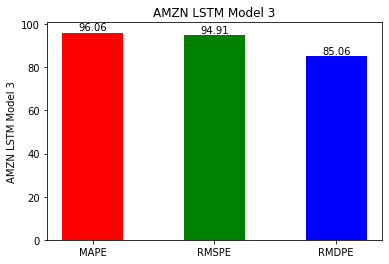

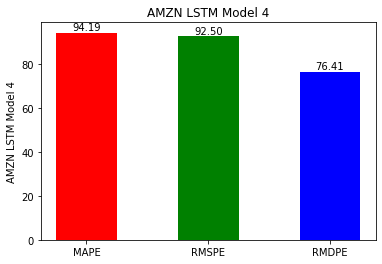

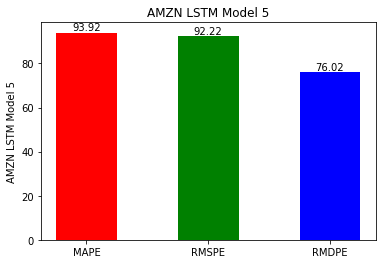

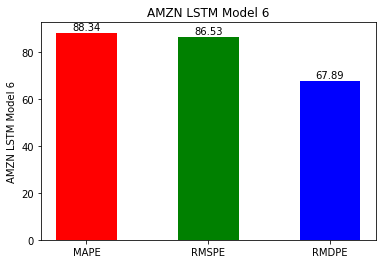

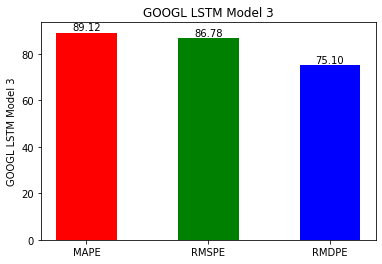

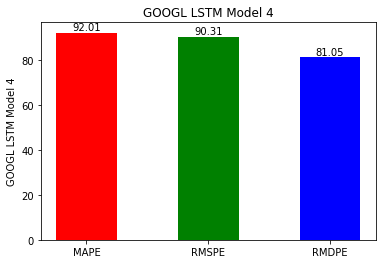

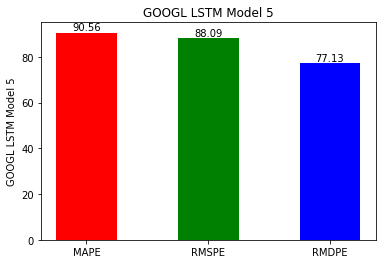

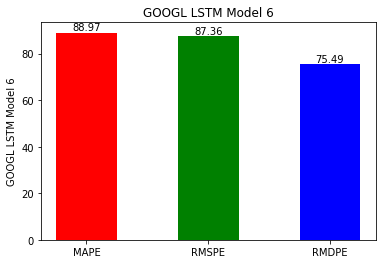

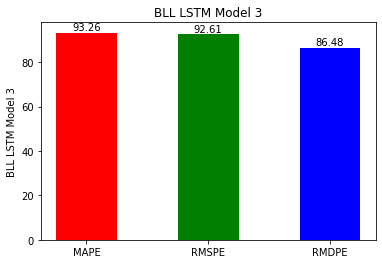

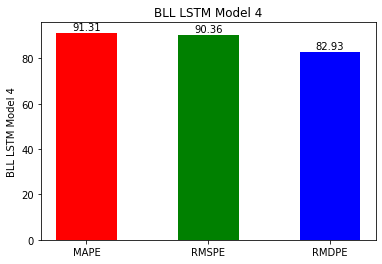

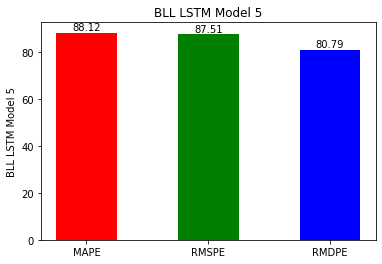

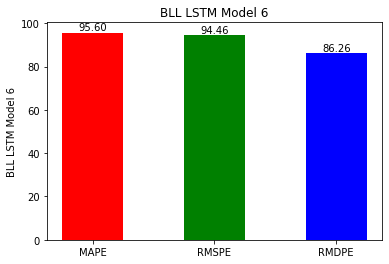

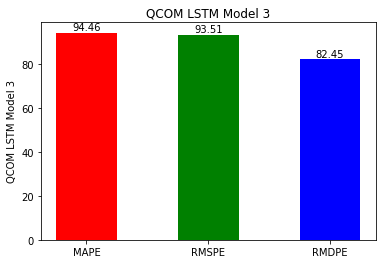

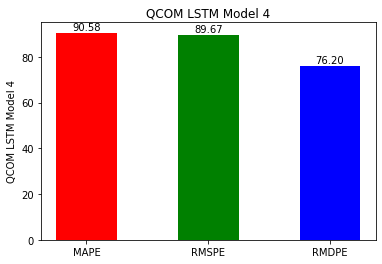

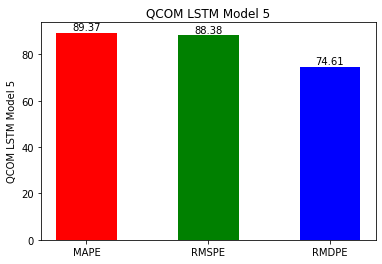

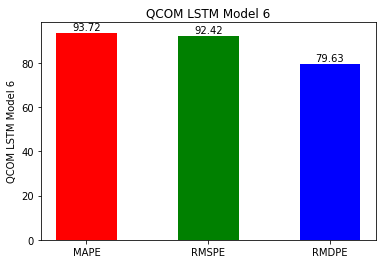

In [ ]:
# Visualization accuracy model

#AMZN
amzn_lstm_model3 = [accuracy_mape_amzn_model3_lstm,accuracy_rmspe_amzn_model3_lstm,accuracy_rmdpe_amzn_model3_lstm]
amzn_lstm_model4 = [accuracy_mape_amzn_model4_lstm,accuracy_rmspe_amzn_model4_lstm,accuracy_rmdpe_amzn_model4_lstm]
amzn_lstm_model5 = [accuracy_mape_amzn_model5_lstm,accuracy_rmspe_amzn_model5_lstm,accuracy_rmdpe_amzn_model5_lstm]
amzn_lstm_model6 = [accuracy_mape_amzn_model6_lstm,accuracy_rmspe_amzn_model6_lstm,accuracy_rmdpe_amzn_model6_lstm]

j = 1
colors = ['r','g','b']

plt.bar(['MAPE','RMSPE','RMDPE'], amzn_lstm_model3, width= 0.5, color=colors)
for i in range(len(amzn_lstm_model3)):
    plt.annotate('%.2f'%amzn_lstm_model3[i], (i, amzn_lstm_model3[i] + j),horizontalalignment='center')
plt.ylabel('AMZN LSTM Model 3')
plt.title('AMZN LSTM Model 3')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], amzn_lstm_model4, width= 0.5, color=colors)
for i in range(len(amzn_lstm_model4)):
    plt.annotate('%.2f'%amzn_lstm_model4[i], (i, amzn_lstm_model4[i] + j),horizontalalignment='center')
plt.ylabel('AMZN LSTM Model 4')
plt.title('AMZN LSTM Model 4')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], amzn_lstm_model5, width= 0.5, color=colors)
for i in range(len(amzn_lstm_model5)):
    plt.annotate('%.2f'%amzn_lstm_model5[i], (i, amzn_lstm_model5[i] + j),horizontalalignment='center')
plt.ylabel('AMZN LSTM Model 5')
plt.title('AMZN LSTM Model 5')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], amzn_lstm_model6, width= 0.5, color=colors)
for i in range(len(amzn_lstm_model6)):
    plt.annotate('%.2f'%amzn_lstm_model6[i], (i, amzn_lstm_model6[i] + j),horizontalalignment='center')
plt.ylabel('AMZN LSTM Model 6')
plt.title('AMZN LSTM Model 6')
plt.show()

#GOOGL
googl_lstm_model3 = [accuracy_mape_googl_model3_lstm,accuracy_rmspe_googl_model3_lstm,accuracy_rmdpe_googl_model3_lstm]
googl_lstm_model4 = [accuracy_mape_googl_model4_lstm,accuracy_rmspe_googl_model4_lstm,accuracy_rmdpe_googl_model4_lstm]
googl_lstm_model5 = [accuracy_mape_googl_model5_lstm,accuracy_rmspe_googl_model5_lstm,accuracy_rmdpe_googl_model5_lstm]
googl_lstm_model6 = [accuracy_mape_googl_model6_lstm,accuracy_rmspe_googl_model6_lstm,accuracy_rmdpe_googl_model6_lstm]

j = 1
plt.bar(['MAPE','RMSPE','RMDPE'], googl_lstm_model3, width= 0.5, color=colors)
for i in range(len(googl_lstm_model3)):
    plt.annotate('%.2f'%googl_lstm_model3[i], (i, googl_lstm_model3[i] + j),horizontalalignment='center')
plt.ylabel('GOOGL LSTM Model 3')
plt.title('GOOGL LSTM Model 3')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], googl_lstm_model4, width= 0.5, color=colors)
for i in range(len(googl_lstm_model4)):
    plt.annotate('%.2f'%googl_lstm_model4[i], (i, googl_lstm_model4[i] + j),horizontalalignment='center')
plt.ylabel('GOOGL LSTM Model 4')
plt.title('GOOGL LSTM Model 4')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], googl_lstm_model5, width= 0.5, color=colors)
for i in range(len(googl_lstm_model5)):
    plt.annotate('%.2f'%googl_lstm_model5[i], (i, googl_lstm_model5[i] + j),horizontalalignment='center')
plt.ylabel('GOOGL LSTM Model 5')
plt.title('GOOGL LSTM Model 5')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], googl_lstm_model6, width= 0.5, color=colors)
for i in range(len(googl_lstm_model6)):
    plt.annotate('%.2f'%googl_lstm_model6[i], (i, googl_lstm_model6[i] + j),horizontalalignment='center')
plt.ylabel('GOOGL LSTM Model 6')
plt.title('GOOGL LSTM Model 6')
plt.show()

#BLL
bll_lstm_model3 = [accuracy_mape_bll_model3_lstm,accuracy_rmspe_bll_model3_lstm,accuracy_rmdpe_bll_model3_lstm]
bll_lstm_model4 = [accuracy_mape_bll_model4_lstm,accuracy_rmspe_bll_model4_lstm,accuracy_rmdpe_bll_model4_lstm]
bll_lstm_model5 = [accuracy_mape_bll_model5_lstm,accuracy_rmspe_bll_model5_lstm,accuracy_rmdpe_bll_model5_lstm]
bll_lstm_model6 = [accuracy_mape_bll_model6_lstm,accuracy_rmspe_bll_model6_lstm,accuracy_rmdpe_bll_model6_lstm]

j = 1
plt.bar(['MAPE','RMSPE','RMDPE'], bll_lstm_model3, width= 0.5, color=colors)
for i in range(len(bll_lstm_model3)):
    plt.annotate('%.2f'%bll_lstm_model3[i], (i, bll_lstm_model3[i] + j),horizontalalignment='center')
plt.ylabel('BLL LSTM Model 3')
plt.title('BLL LSTM Model 3')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], bll_lstm_model4, width= 0.5, color=colors)
for i in range(len(bll_lstm_model4)):
    plt.annotate('%.2f'%bll_lstm_model4[i], (i, bll_lstm_model4[i] + j),horizontalalignment='center')
plt.ylabel('BLL LSTM Model 4')
plt.title('BLL LSTM Model 4')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], bll_lstm_model5, width= 0.5, color=colors)
for i in range(len(bll_lstm_model5)):
    plt.annotate('%.2f'%bll_lstm_model5[i], (i, bll_lstm_model5[i] + j),horizontalalignment='center')
plt.ylabel('BLL LSTM Model 5')
plt.title('BLL LSTM Model 5')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], bll_lstm_model6, width= 0.5, color=colors)
for i in range(len(bll_lstm_model6)):
    plt.annotate('%.2f'%bll_lstm_model6[i], (i, bll_lstm_model6[i] + j),horizontalalignment='center')
plt.ylabel('BLL LSTM Model 6')
plt.title('BLL LSTM Model 6')
plt.show()

#QCOM
qcom_lstm_model3 = [accuracy_mape_qcom_model3_lstm,accuracy_rmspe_qcom_model3_lstm,accuracy_rmdpe_qcom_model3_lstm]
qcom_lstm_model4 = [accuracy_mape_qcom_model4_lstm,accuracy_rmspe_qcom_model4_lstm,accuracy_rmdpe_qcom_model4_lstm]
qcom_lstm_model5 = [accuracy_mape_qcom_model5_lstm,accuracy_rmspe_qcom_model5_lstm,accuracy_rmdpe_qcom_model5_lstm]
qcom_lstm_model6 = [accuracy_mape_qcom_model6_lstm,accuracy_rmspe_qcom_model6_lstm,accuracy_rmdpe_qcom_model6_lstm]

j = 1
plt.bar(['MAPE','RMSPE','RMDPE'], qcom_lstm_model3, width= 0.5, color=colors)
for i in range(len(qcom_lstm_model3)):
    plt.annotate('%.2f'%qcom_lstm_model3[i], (i, qcom_lstm_model3[i] + j),horizontalalignment='center')
plt.ylabel('QCOM LSTM Model 3')
plt.title('QCOM LSTM Model 3')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], qcom_lstm_model4, width= 0.5, color=colors)
for i in range(len(qcom_lstm_model4)):
    plt.annotate('%.2f'%qcom_lstm_model4[i], (i, qcom_lstm_model4[i] + j),horizontalalignment='center')
plt.ylabel('QCOM LSTM Model 4')
plt.title('QCOM LSTM Model 4')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], qcom_lstm_model5, width= 0.5, color=colors)
for i in range(len(qcom_lstm_model5)):
    plt.annotate('%.2f'%qcom_lstm_model5[i], (i, qcom_lstm_model5[i] + j),horizontalalignment='center')
plt.ylabel('QCOM LSTM Model 5')
plt.title('QCOM LSTM Model 5')
plt.show()

plt.bar(['MAPE','RMSPE','RMDPE'], qcom_lstm_model6, width= 0.5, color=colors)
for i in range(len(qcom_lstm_model6)):
    plt.annotate('%.2f'%qcom_lstm_model6[i], (i, qcom_lstm_model6[i] + j),horizontalalignment='center')
plt.ylabel('QCOM LSTM Model 6')
plt.title('QCOM LSTM Model 6')
plt.show()